In [1]:
#импортируем необходимые библиотеки для обработки данных
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
#загружаем имеющиеся данные
excel_reader=pd.ExcelFile('/content/drive/MyDrive/data_glaucoma.xlsx')

В таблице с данными 4 листа. Выделим их для удобства работы в отдельные таблицы.

In [3]:
print(excel_reader.sheet_names)

['Здоровые', ' I стадия ПОУГ', ' II стадия ПОУГ', ' III стадия ПОУГ']


In [4]:
data_healthy=excel_reader.parse('Здоровые')

In [5]:
data_healthy.head(11)

Unnamed: 0  возраст  стадия  величина внутриглазного давления  \
0    уланкина       25       0                                10   
1   степанова       26       0                                12   
2     кудасов       32       0                                10   
3         NaN       32       0                                10   
4      гладих       68       0                                10   
5   мыздриков       59       0                                12   
6    Савинова       66       0                                15   
7         NaN       66       0                                12   
8     Мациева       68       0                                18   
9       Булат       51       0                                12   
10        NaN       51       0                                12   

    ВГД, корригированного на коэффициент ригидности  \
0                                                12   
1                                                15   
2                                                12   
3                                                12   
4                                                14   
5                                                14   
6                                                23   
7                                                16   
8                                                28   
9                                                19   
10                                               19   

    Коэфф ригидности склеральн капсулы глаза  Роговично-компенсированное ВГД  \
0                                     0.0162                             9.7   
1                                     0.0162                            18.5   
2                                     0.0162                            14.3   
3                                     0.0162                            17.6   
4                                     0.0138                            20.1   
5                                     0.0161                             8.5   
6                                     0.0076                             NaN   
7                                     0.0140                             NaN   
8                                     0.0052                            20.4   
9                                     0.0031                            17.8   
10                                    0.0009                            18.0   

    ВГД по Гольдману  Фактор резистентности роговицы    КГ  ...  gamma Ш  \
0                9.4                             9.3  11.3  ...     1.75   
1               19.9                            12.8  11.6  ...     1.85   
2               12.0                             8.3   9.2  ...      NaN   
3               13.9                             7.6   7.6  ...      NaN   
4               17.2                             8.8   7.9  ...     1.75   
5                8.1                             9.1  11.4  ...     1.85   
6                NaN                             NaN   NaN  ...     1.30   
7                NaN                             NaN   NaN  ...     1.70   
8               20.0                            11.3   9.9  ...     1.10   
9               16.5                            10.0   9.6  ...     0.60   
10              15.6                             8.9   8.6  ...     0.40   

     Efrid        SVL       DVL  РИ (рео.индекс) мОм  ПМН (макс.нап)  \
0   0.0162  56.300000  46.03000                49.65            0.27   
1   0.0162  50.960000  44.21000                  NaN             NaN   
2      NaN  53.580000  47.40000               102.33            0.13   
3      NaN  56.297266  45.46207                58.43            0.20   
4   0.0138  48.680000  45.88000                20.97            0.13   
5   0.0161  53.560000  48.42000                35.50            0.52   
6   0.0076  48.710000       NaN                49.88            0.29   
7   0.0140        NaN       NaN                53.23            0.32   
8  

In [6]:
data_1_stage=excel_reader.parse(' I стадия ПОУГ')

In [7]:
data_1_stage

Unnamed: 0  возраст  стадия  величина внутриглазного давления  \
0        горнева       84       1                                13   
1         фокина       64       1                                20   
2        петрова       56       1                                18   
3            NaN       56       1                                21   
4    ефременкова       65       1                                 7   
5            NaN       65       1                                13   
6    набатчикова       72       1                                11   
7        огулева       65       1                                 8   
8       калядова       73       1                                14   
9       казакова       66       1                                13   
10         Конев       61       1                                10   
11           NaN       61       1                                 9   
12       Яковлев       68       1                                18   
13        Качура       72       1                                12   
14  Соловьева С.       77       1                                15   

    ВГД, корригированного на коэффициент ригидности  \
0                                                27   
1                                                30   
2                                                21   
3                                                18   
4                                                 9   
5                                                24   
6                                                12   
7                                                19   
8                                                17   
9                                                17   
10                                               12   
11                                               10   
12                                               22   
13                                               20   
14                                               18   

    Коэфф ригидности склеральн капсулы глаза  Роговично-компенсированное ВГД  \
0                                     0.0007                            16.1   
1                                     0.0053                            20.0   
2                                     0.0148                            23.7   
3                                     0.0268                            26.8   
4                                     0.0167                            17.7   
5                                     0.0040                            21.5   
6                                     0.0032                            21.0   
7                                     0.0038                            12.2   
8                                     0.0167                            21.2   
9                                     0.0147                            12.4   
10                                    0.0157                            22.4   
11                                    0.0192                            15.2   
12                                    0.0142                             NaN   
13                                    0.0074                            16.7   
14                                    0.0150                            18.7   

    ВГД по Гольдману  Фактор резистентности роговицы    КГ  ...  gamma Ш  \
0               14.7                             9.5   9.6  ...     0.45   
1               20.0                            11.0  10.0  ...     0.55   
2               23.1                            11.7   9.3  ...     2.00   
3               25.6                            11.8   8.5  ...     2.10   
4               14.4                             8.0   8.0  ...     1.95   
5               17.8                             8.3   7.1  ...     1.00   
6               20.0                            11.7   9.3  ...      NaN   
7               13.5                            11.5  12.3  ...     0.95   
8               19.1   

In [8]:
data_2_stage=excel_reader.parse(' II стадия ПОУГ')

In [9]:
data_2_stage

Unnamed: 0  возраст  стадия  величина внутриглазного давления  \
0       горнева       84       2                                13   
1           NaN       64       2                                19   
2       близнюк       70       2                                11   
3           NaN       68       2                                11   
4        митина       80       2                                17   
5       якубова       71       2                                15   
6    емельянова       77       2                                16   
7       Мациева       68       2                                17   
8        Попова       80       2                                14   
9           NaN       72       2                                18   
10     Зайченко       76       2                                12   
11          NaN       77       2                                15   
12  Шапошникова       82       2                                13   
13          NaN       82       2                                12   
14     Вакалова       80       2                                14   

    ВГД, корригированного на коэффициент ригидности  \
0                                                17   
1                                                24   
2                                                11   
3                                                12   
4                                                21   
5                                                20   
6                                                17   
7                                                12   
8                                                14   
9                                                25   
10                                               17   
11                                               16   
12                                               12   
13                                               13   
14                                               12   

    Коэфф ригидности склеральн капсулы глаза  Роговично-компенсированное ВГД  \
0                                     0.0132                            16.2   
1                                     0.0127                            15.7   
2                                     0.0214                            19.8   
3                                     0.0190                            17.1   
4                                     0.0146                            23.5   
5                                     0.0133                            26.5   
6                                     0.0199                            20.2   
7                                     0.0325                            22.6   
8                                     0.0204                            24.3   
9                                     0.0092                            20.7   
10                                    0.0132                            15.4   
11                                    0.0196                            17.7   
12                                    0.0218                            19.7   
13                                    0.0193                            16.2   
14                                    0.0240                            19.0   

    ВГД по Гольдману  Фактор резистентности роговицы    КГ  ...  gamma Ш  \
0               14.1                             8.8   9.0  ...     1.65   
1               15.7                            10.0  10.0  ...     1.65   
2               18.0                             9.9   8.9  ...     2.40   
3               14.0                             8.1   8.2  ...     0.70   
4               21.0                             9.9   7.9  ...     1.75   
5               25.7                            12.1   8.8  ...     1.70   
6               18.0                             9.6   8.6  ...     2.00   
7               19.4                             9.0   7.4  ...     2.30   
8               19.9                  

In [10]:
data_3_stage=excel_reader.parse(' III стадия ПОУГ')

In [11]:
data_3_stage

Unnamed: 0  возраст  стадия  величина внутриглазного давления  \
0    клычникова       68       3                                13   
1      кадушкин       68       3                                15   
2       якубова       71       3                                22   
3       певзнер       74       3                                22   
4       Хохлова       64       3                                14   
5           NaN       64       3                                13   
6  Соловьева Е.       72       3                                16   
7      Зайченко       76       3                                17   
8      Вакалова       80       3                                16   
9      Колесова       67       3                                18   

   ВГД, корригированного на коэффициент ригидности  \
0                                                7   
1                                               11   
2                                               21   
3                                               23   
4                                               14   
5                                               10   
6                                               12   
7                                               16   
8                                               11   
9                                               17   

   Коэфф ригидности склеральн капсулы глаза  Роговично-компенсированное ВГД  \
0                                    0.0365                            24.9   
1                                    0.0306                            20.7   
2                                    0.0227                            26.0   
3                                    0.0205                            20.9   
4                                    0.0201                            19.3   
5                                    0.0315                            19.6   
6                                    0.0306                            20.0   
7                                    0.0246                            23.1   
8                                    0.0347                            21.0   
9                                    0.0227                            19.0   

   ВГД по Гольдману  Фактор резистентности роговицы   КГ  ...  gamma Ш  \
0              19.5                             7.3  5.3  ...     2.40   
1              16.5                             8.0  7.1  ...     3.55   
2              23.8                            10.6  7.7  ...     2.20   
3              18.9                             9.9  8.6  ...     1.95   
4              18.3                            10.5  9.6  ...      NaN   
5              18.6                            10.6  9.5  ...      NaN   
6              18.0                             8.7  7.6  ...      NaN   
7              17.1                             6.5  5.1  ...      NaN   
8              17.8                             8.7  7.6  ...      NaN   
9              20.5                             8.5  7.7  ...     2.20   

    Efrid    SVL    DVL  РИ (рео.индекс) мОм  ПМН (макс.нап)  ПМУ (мод.упр.)  \
0  0.0365  49.90  43.40                  NaN             NaN             NaN   
1  0.0306  49.31  39.83                15.10            0.04            0.08   
2  0.0227  45.52  43.11                25.43            0.27            0.26   
3  0.0205  42.12  26.86                15.48            0.11            0.13   
4     NaN    NaN    NaN                16.72            0.07            0.09   
5     NaN    NaN    NaN                38.82            0.08            0.09   
6     NaN    NaN    NaN                49.61            0.09            0.14   
7     NaN    NaN    NaN                57.32            0.75            0.66   
8     NaN  28.82  38.87                26.61            0.15            0.16   
9  0.0227  42.70  40.10                25.43            0.27            0.26   

   Z\nбаз.\n(отн.))  Z\nбаз.\n(мОм)  УОК\n(уд.объем)\nмкл  
0            

# Задача 0: Техническая предобработка данных


Добавим название первого столбца

In [12]:
data_healthy=data_healthy.rename(columns={'Unnamed: 0':'Фамилия'})
data_1_stage=data_1_stage.rename(columns={'Unnamed: 0':'Фамилия'})
data_2_stage=data_2_stage.rename(columns={'Unnamed: 0':'Фамилия'})
data_3_stage=data_3_stage.rename(columns={'Unnamed: 0':'Фамилия'})

Уберем перенос на новую строку в названиях столбцов

In [13]:
data_healthy=data_healthy.rename(columns={'Z\nбаз.\n(отн.))':'Z баз.(отн.))'})
data_1_stage=data_1_stage.rename(columns={'Z\nбаз.\n(отн.))':'Z баз.(отн.))'})
data_2_stage=data_2_stage.rename(columns={'Z\nбаз.\n(отн.))':'Z баз.(отн.))'})
data_3_stage=data_3_stage.rename(columns={'Z\nбаз.\n(отн.))':'Z баз.(отн.))'})

In [14]:
data_healthy=data_healthy.rename(columns={'Z\nбаз.\n(мОм)':'Z баз.(мОм)'})
data_1_stage=data_1_stage.rename(columns={'Z\nбаз.\n(мОм)':'Z баз.(мОм)'})
data_2_stage=data_2_stage.rename(columns={'Z\nбаз.\n(мОм)':'Z баз.(мОм)'})
data_3_stage=data_3_stage.rename(columns={'Z\nбаз.\n(мОм)':'Z баз.(мОм)'})

In [15]:
data_healthy=data_healthy.rename(columns={'УОК\n(уд.объем)\nмкл':'УОК (уд.объем) мкл'})
data_1_stage=data_1_stage.rename(columns={'УОК\n(уд.объем)\nмкл':'УОК (уд.объем) мкл'})
data_2_stage=data_2_stage.rename(columns={'УОК\n(уд.объем)\nмкл':'УОК (уд.объем) мкл'})
data_3_stage=data_3_stage.rename(columns={'УОК\n(уд.объем)\nмкл':'УОК (уд.объем) мкл'})

Заполним признак стадии в листе таблицы для 1й стадии

In [16]:
data_1_stage['стадия']=1

In [17]:
data_healthy

Фамилия  возраст  стадия  величина внутриглазного давления  \
0    уланкина       25       0                                10   
1   степанова       26       0                                12   
2     кудасов       32       0                                10   
3         NaN       32       0                                10   
4      гладих       68       0                                10   
5   мыздриков       59       0                                12   
6    Савинова       66       0                                15   
7         NaN       66       0                                12   
8     Мациева       68       0                                18   
9       Булат       51       0                                12   
10        NaN       51       0                                12   

    ВГД, корригированного на коэффициент ригидности  \
0                                                12   
1                                                15   
2                                                12   
3                                                12   
4                                                14   
5                                                14   
6                                                23   
7                                                16   
8                                                28   
9                                                19   
10                                               19   

    Коэфф ригидности склеральн капсулы глаза  Роговично-компенсированное ВГД  \
0                                     0.0162                             9.7   
1                                     0.0162                            18.5   
2                                     0.0162                            14.3   
3                                     0.0162                            17.6   
4                                     0.0138                            20.1   
5                                     0.0161                             8.5   
6                                     0.0076                             NaN   
7                                     0.0140                             NaN   
8                                     0.0052                            20.4   
9                                     0.0031                            17.8   
10                                    0.0009                            18.0   

    ВГД по Гольдману  Фактор резистентности роговицы    КГ  ...  gamma Ш  \
0                9.4                             9.3  11.3  ...     1.75   
1               19.9                            12.8  11.6  ...     1.85   
2               12.0                             8.3   9.2  ...      NaN   
3               13.9                             7.6   7.6  ...      NaN   
4               17.2                             8.8   7.9  ...     1.75   
5                8.1                             9.1  11.4  ...     1.85   
6                NaN                             NaN   NaN  ...     1.30   
7                NaN                             NaN   NaN  ...     1.70   
8               20.0                            11.3   9.9  ...     1.10   
9               16.5                            10.0   9.6  ...     0.60   
10              15.6                             8.9   8.6  ...     0.40   

     Efrid        SVL       DVL  РИ (рео.индекс) мОм  ПМН (макс.нап)  \
0   0.0162  56.300000  46.03000                49.65            0.27   
1   0.0162  50.960000  44.21000                  NaN             NaN   
2      NaN  53.580000  47.40000               102.33            0.13   
3      NaN  56.297266  45.46207                58.43            0.20   
4   0.0138  48.680000  45.88000                20.97            0.13   
5   0.0161  53.560000  48.42000                35.50            0.52   
6   0.0076  48.710000       NaN                49.88            0.29   
7   0.0140        NaN       NaN                53.23            0.32   
8   0.

# Задача 1. Работа с пропущенными значениями

1. Проанализировать данные.

  Пропущенные значения дополнить тем или иным способом.

  Проанализировать, меняется ли взаимосвязь дополненных показателей с другими показателями.



---

Рассмотрим описательную статистику с пропущенными значениями

In [18]:
describe_data_healthy=data_healthy.describe()
describe_data_healthy

возраст  стадия  величина внутриглазного давления  \
count  11.000000    11.0                         11.000000   
mean   49.454545     0.0                         12.090909   
std    17.574775     0.0                          2.467977   
min    25.000000     0.0                         10.000000   
25%    32.000000     0.0                         10.000000   
50%    51.000000     0.0                         12.000000   
75%    66.000000     0.0                         12.000000   
max    68.000000     0.0                         18.000000   

       ВГД, корригированного на коэффициент ригидности  \
count                                        11.000000   
mean                                         16.727273   
std                                           5.120369   
min                                          12.000000   
25%                                          13.000000   
50%                                          15.000000   
75%                                          19.000000   
max                                          28.000000   

       Коэфф ригидности склеральн капсулы глаза  \
count                                 11.000000   
mean                                   0.011409   
std                                    0.005990   
min                                    0.000900   
25%                                    0.006400   
50%                                    0.014000   
75%                                    0.016200   
max                                    0.016200   

       Роговично-компенсированное ВГД  ВГД по Гольдману  \
count                        9.000000          9.000000   
mean                        16.100000         14.733333   
std                          4.343961          4.257347   
min                          8.500000          8.100000   
25%                         14.300000         12.000000   
50%                         17.800000         15.600000   
75%                         18.500000         17.200000   
max                         20.400000         20.000000   

       Фактор резистентности роговицы         КГ         ЦТР  ...   gamma Ш  \
count                        9.000000   9.000000   11.000000  ...  9.000000   
mean                         9.566667   9.677778  542.181818  ...  1.366667   
std                          1.598437   1.508955   25.964661  ...  0.555653   
min                          7.600000   7.600000  507.000000  ...  0.400000   
25%                          8.800000   8.600000  526.000000  ...  1.100000   
50%                          9.100000   9.600000  537.000000  ...  1.700000   
75%                         10.000000  11.300000  552.000000  ...  1.750000   
max                         12.800000  11.600000  590.000000  ...  1.850000   

          Efrid        SVL        DVL  РИ (рео.индекс) мОм  ПМН (макс.нап)  \
count  9.000000   8.000000   7.000000             8.000000        8.000000   
mean   0.010344  52.425908  45.871724            69.186250        0.273750   
std    0.006151   3.019598   1.658312            51.755479        0.127048   
min    0.000900  48.680000  43.700000            20.970000        0.130000   
25%    0.005200  50.397500  44.836035            46.112500        0.182500   
50%    0.013800  52.440000  45.880000            51.555000        0.280000   
75%    0.016100  54.259317  46.715000            69.405000        0.322500   
max    0.016200  56.300000  48.420000           183.500000        0.520000   

       ПМУ (мод.упр.)  Z баз.(отн.))  Z баз.(мОм)  УОК (уд.объем) мкл  
count         8.00000       8.000000     8.000000            8.000000  
mean          0.27375     960.750000    38.430000            1.543769  
std           0.10796     152.166967     6.086679            0.898572  
min           0.14000     725.000000    29.000000            0.660193  
25%           0.19250     888.000000    35.520000            1.089085  
50%           0.27500     948.000000    37.920000            1.252867  
75%           0.

In [19]:
describe_data_1_stage=data_1_stage.describe()
describe_data_1_stage

возраст  стадия  величина внутриглазного давления  \
count  15.000000    15.0                         15.000000   
mean   67.000000     1.0                         13.466667   
std     7.615773     0.0                          4.273952   
min    56.000000     1.0                          7.000000   
25%    62.500000     1.0                         10.500000   
50%    65.000000     1.0                         13.000000   
75%    72.000000     1.0                         16.500000   
max    84.000000     1.0                         21.000000   

       ВГД, корригированного на коэффициент ригидности  \
count                                         15.00000   
mean                                          18.40000   
std                                            6.02139   
min                                            9.00000   
25%                                           14.50000   
50%                                           18.00000   
75%                                           21.50000   
max                                           30.00000   

       Коэфф ригидности склеральн капсулы глаза  \
count                                 15.000000   
mean                                   0.011880   
std                                    0.007368   
min                                    0.000700   
25%                                    0.004650   
50%                                    0.014700   
75%                                    0.016200   
max                                    0.026800   

       Роговично-компенсированное ВГД  ВГД по Гольдману  \
count                       14.000000         14.000000   
mean                        18.971429         17.692857   
std                          4.208860          3.995664   
min                         12.200000         12.300000   
25%                         16.250000         14.475000   
50%                         19.350000         17.150000   
75%                         21.425000         20.000000   
max                         26.800000         25.600000   

       Фактор резистентности роговицы         КГ         ЦТР  ...    gamma Ш  \
count                       14.000000  14.000000   11.000000  ...  13.000000   
mean                        10.214286   9.364286  550.818182  ...   1.515385   
std                          1.288325   1.304199   26.596309  ...   0.579650   
min                          8.000000   7.100000  503.000000  ...   0.450000   
25%                          9.350000   8.550000  540.000000  ...   1.000000   
50%                          9.950000   9.300000  562.000000  ...   1.800000   
75%                         11.450000   9.900000  567.500000  ...   1.950000   
max                         11.800000  12.300000  577.000000  ...   2.100000   

           Efrid        SVL        DVL  РИ (рео.индекс) мОм  ПМН (макс.нап)  \
count  13.000000  13.000000  12.000000            13.000000       13.000000   
mean    0.012308  50.219262  41.645661            53.100000        0.226923   
std     0.007486   3.515266   5.281210            17.796226        0.167152   
min     0.000700  43.230000  34.530000            19.610000        0.040000   
25%     0.005300  49.550000  35.842500            44.000000        0.110000   
50%     0.014700  50.500000  42.040000            58.890000        0.230000   
75%     0.016700  51.600000  46.380000            66.970000        0.270000   
max     0.026800  55.300000  48.600000            76.000000        0.620000   

       ПМУ (мод.упр.)  Z баз.(отн.))  Z баз.(мОм)  УОК (уд.объем) мкл  
count       13.000000      12.000000    12.000000           12.000000  
mean         0.256923     922.333333    36.893333            1.523104  
std          0.154185     211.789919     8.471597            1.005239  
min          0.070000     351.000000    14.040000            0.515073  
25%          0.150000     875.750000    35.030000            1.006425  
50%          0.260000     956.000000    38.240000            1.353717 

In [20]:
describe_data_2_stage=data_2_stage.describe()
describe_data_2_stage

возраст  стадия  величина внутриглазного давления  \
count  15.000000    15.0                         15.000000   
mean   75.400000     2.0                         14.466667   
std     6.150494     0.0                          2.531704   
min    64.000000     2.0                         11.000000   
25%    70.500000     2.0                         12.500000   
50%    77.000000     2.0                         14.000000   
75%    80.000000     2.0                         16.500000   
max    84.000000     2.0                         19.000000   

       ВГД, корригированного на коэффициент ригидности  \
count                                        15.000000   
mean                                         16.200000   
std                                           4.554433   
min                                          11.000000   
25%                                          12.000000   
50%                                          16.000000   
75%                                          18.500000   
max                                          25.000000   

       Коэфф ригидности склеральн капсулы глаза  \
count                                 15.000000   
mean                                   0.018273   
std                                    0.005800   
min                                    0.009200   
25%                                    0.013250   
50%                                    0.019300   
75%                                    0.020900   
max                                    0.032500   

       Роговично-компенсированное ВГД  ВГД по Гольдману  \
count                       15.000000         15.000000   
mean                        19.640000         17.620000   
std                          3.398487          3.298961   
min                         15.400000         13.000000   
25%                         16.650000         15.350000   
50%                         19.700000         18.000000   
75%                         21.650000         19.500000   
max                         26.500000         25.700000   

       Фактор резистентности роговицы         КГ         ЦТР  ...   gamma Ш  \
count                       15.000000  15.000000   15.000000  ...  9.000000   
mean                         9.553333   8.653333  540.666667  ...  1.733333   
std                          1.120502   1.037075   25.794979  ...  0.500000   
min                          8.100000   6.100000  499.000000  ...  0.700000   
25%                          8.600000   8.050000  527.500000  ...  1.650000   
50%                          9.700000   8.900000  535.000000  ...  1.700000   
75%                         10.100000   9.350000  553.000000  ...  2.000000   
max                         12.100000  10.000000  599.000000  ...  2.400000   

           Efrid        SVL       DVL  РИ (рео.индекс) мОм  ПМН (макс.нап)  \
count  10.000000   7.000000   6.00000            12.000000       12.000000   
mean    0.018910  45.355714  37.33000            42.420833        0.289167   
std     0.008434   7.337049   6.39819            20.105997        0.187445   
min     0.009200  30.140000  29.78000            11.360000        0.080000   
25%     0.013225  44.125000  33.10000            28.852500        0.150000   
50%     0.016800  47.360000  36.52000            38.285000        0.260000   
75%     0.020275  50.135000  40.57000            55.927500        0.367500   
max     0.034300  51.470000  47.28000            85.230000        0.710000   

       ПМУ (мод.упр.)  Z баз.(отн.))  Z баз.(мОм)  УОК (уд.объем) мкл  
count       12.000000      12.000000    12.000000           12.000000  
mean         0.332500     820.416667    32.816667            1.369332  
std          0.174987     186.396673     7.455867            1.100413  
min          0.090000     474.000000    18.960000            0.338501  
25%          0.237500     759.000000    30.360000            0.717943  
50%          0.275000     894.000000    35.760000            1.017857  
75%          0.4

In [21]:
describe_data_3_stage=data_3_stage.describe()
describe_data_3_stage

возраст  стадия  величина внутриглазного давления  \
count  10.000000    10.0                         10.000000   
mean   70.400000     3.0                         16.600000   
std     5.211099     0.0                          3.272783   
min    64.000000     3.0                         13.000000   
25%    67.250000     3.0                         14.250000   
50%    69.500000     3.0                         16.000000   
75%    73.500000     3.0                         17.750000   
max    80.000000     3.0                         22.000000   

       ВГД, корригированного на коэффициент ригидности  \
count                                        10.000000   
mean                                         14.200000   
std                                           5.050853   
min                                           7.000000   
25%                                          11.000000   
50%                                          13.000000   
75%                                          16.750000   
max                                          23.000000   

       Коэфф ригидности склеральн капсулы глаза  \
count                                 10.000000   
mean                                   0.027450   
std                                    0.006021   
min                                    0.020100   
25%                                    0.022700   
50%                                    0.027600   
75%                                    0.031275   
max                                    0.036500   

       Роговично-компенсированное ВГД  ВГД по Гольдману  \
count                       10.000000         10.000000   
mean                        21.450000         18.900000   
std                          2.416264          2.065591   
min                         19.000000         16.500000   
25%                         19.700000         17.850000   
50%                         20.800000         18.450000   
75%                         22.575000         19.350000   
max                         26.000000         23.800000   

       Фактор резистентности роговицы         КГ         ЦТР  ...   gamma Ш  \
count                       10.000000  10.000000    9.000000  ...  5.000000   
mean                         8.930000   7.580000  532.444444  ...  2.460000   
std                          1.441488   1.506136   21.697414  ...  0.629881   
min                          6.500000   5.100000  498.000000  ...  1.950000   
25%                          8.125000   7.225000  523.000000  ...  2.200000   
50%                          8.700000   7.650000  527.000000  ...  2.200000   
75%                         10.350000   8.375000  554.000000  ...  2.400000   
max                         10.600000   9.600000  560.000000  ...  3.550000   

          Efrid        SVL        DVL  РИ (рео.индекс) мОм  ПМН (макс.нап)  \
count  5.000000   6.000000   6.000000             9.000000        9.000000   
mean   0.026600  43.061667  38.695000            30.057778        0.203333   
std    0.006739   7.690130   6.082587            15.293616        0.221303   
min    0.020500  28.820000  26.860000            15.100000        0.040000   
25%    0.022700  42.265000  39.110000            16.720000        0.080000   
50%    0.022700  44.110000  39.965000            25.430000        0.110000   
75%    0.030600  48.362500  42.357500            38.820000        0.270000   
max    0.036500  49.900000  43.400000            57.320000        0.750000   

       ПМУ (мод.упр.)  Z баз.(отн.))  Z баз.(мОм)  УОК (уд.объем) мкл  
count        9.000000       9.000000     9.000000            9.000000  
mean         0.207778     765.666667    30.626667            1.046969  
std          0.182673     185.489892     7.419596            0.875615  
min          0.080000     410.000000    16.400000            0.375853  
25%          0.090000     811.000000    32.440000            0.429843  
50%          0.140000     822.000000    32.880000            0.715709  
75%          0.2

## ПРОАНАЛИЗИРОВАТЬ ПОЛУЧЕННЫЕ ОПИСАНИЯ

---



Можно построить графики со средним всех признаков

In [22]:
#график по возрасту


In [23]:
#объединим все таблицы
data_glaucoma=pd.concat([data_healthy, data_1_stage, data_2_stage, data_3_stage], axis=0)


In [24]:
data_glaucoma

Фамилия  возраст  стадия  величина внутриглазного давления  \
0       уланкина       25       0                                10   
1      степанова       26       0                                12   
2        кудасов       32       0                                10   
3            NaN       32       0                                10   
4         гладих       68       0                                10   
5      мыздриков       59       0                                12   
6       Савинова       66       0                                15   
7            NaN       66       0                                12   
8        Мациева       68       0                                18   
9          Булат       51       0                                12   
10           NaN       51       0                                12   
0        горнева       84       1                                13   
1         фокина       64       1                                20   
2        петрова       56       1                                18   
3            NaN       56       1                                21   
4    ефременкова       65       1                                 7   
5            NaN       65       1                                13   
6    набатчикова       72       1                                11   
7        огулева       65       1                                 8   
8       калядова       73       1                                14   
9       казакова       66       1                                13   
10         Конев       61       1                                10   
11           NaN       61       1                                 9   
12       Яковлев       68       1                                18   
13        Качура       72       1                                12   
14  Соловьева С.       77       1                                15   
0        горнева       84       2                                13   
1            NaN       64       2                                19   
2        близнюк       70       2                                11   
3            NaN       68       2                                11   
4         митина       80       2                                17   
5        якубова       71       2                                15   
6     емельянова       77       2                                16   
7        Мациева       68       2                                17   
8         Попова       80       2                                14   
9            NaN       72       2                                18   
10      Зайченко       76       2                                12   
11           NaN       77       2                                15   
12   Шапошникова       82       2                                13   
13           NaN       82       2                                12   
14      Вакалова       80       2                                14   
0     клычникова       68       3                                13   
1       кадушкин       68       3                                15   
2        якубова       71       3                                22   
3        певзнер       74       3                                22   
4        Хохлова       64       3                                14   
5            NaN       64       3                                13   
6   Соловьева Е.       72       3                                16   
7       Зайченко       76       3                                17   
8       Вакалова       80       3                                16   
9       Колесова       67       3                                18   

    ВГД, корригированного на коэффициент ригидности  \
0                                                12   
1                                                15   
2                                                12   
3                                                12   
4                                        

In [25]:
data_glaucoma.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 9
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Фамилия                                          39 non-null     object 
 1   возраст                                          51 non-null     int64  
 2   стадия                                           51 non-null     int64  
 3   величина внутриглазного давления                 51 non-null     int64  
 4   ВГД, корригированного на коэффициент ригидности  51 non-null     int64  
 5   Коэфф ригидности склеральн капсулы глаза         51 non-null     float64
 6   Роговично-компенсированное ВГД                   48 non-null     float64
 7   ВГД по Гольдману                                 48 non-null     float64
 8   Фактор резистентности роговицы                   48 non-null     float64
 9   КГ                                      

In [26]:
table_agg=data_glaucoma.drop(['Фамилия'], axis=1).groupby(['стадия']).agg('mean')

In [27]:
table_agg

возраст  величина внутриглазного давления  \
стадия                                                
0       49.454545                         12.090909   
1       67.000000                         13.466667   
2       75.400000                         14.466667   
3       70.400000                         16.600000   

        ВГД, корригированного на коэффициент ригидности  \
стадия                                                    
0                                             16.727273   
1                                             18.400000   
2                                             16.200000   
3                                             14.200000   

        Коэфф ригидности склеральн капсулы глаза  \
стадия                                             
0                                       0.011409   
1                                       0.011880   
2                                       0.018273   
3                                       0.027450   

        Роговично-компенсированное ВГД  ВГД по Гольдману  \
стадия                                                     
0                            16.100000         14.733333   
1                            18.971429         17.692857   
2                            19.640000         17.620000   
3                            21.450000         18.900000   

        Фактор резистентности роговицы        КГ         ЦТР          РП  ...  \
стадия                                                                    ...   
0                             9.566667  9.677778  542.181818  229.909091  ...   
1                            10.214286  9.364286  550.818182  205.454545  ...   
2                             9.553333  8.653333  540.666667  201.888889  ...   
3                             8.930000  7.580000  532.444444  176.714286  ...   

         gamma Ш     Efrid        SVL        DVL  РИ (рео.индекс) мОм  \
стадия                                                                  
0       1.366667  0.010344  52.425908  45.871724            69.186250   
1       1.515385  0.012308  50.219262  41.645661            53.100000   
2       1.733333  0.018910  45.355714  37.330000            42.420833   
3       2.460000  0.026600  43.061667  38.695000            30.057778   

        ПМН (макс.нап)  ПМУ (мод.упр.)  Z баз.(отн.))  Z баз.(мОм)  \
стадия                                                               
0             0.273750        0.273750     960.750000    38.430000   
1             0.226923        0.256923     922.333333    36.893333   
2             0.289167        0.332500     820.416667    32.816667   
3             0.203333        0.207778     765.666667    30.626667   

        УОК (уд.объем) мкл  
стадия                      
0                 1.543769  
1                 1.523104  
2                 1.369332  
3                 1.046969  

[4 rows x 21 columns]

<Axes: xlabel='стадия'>

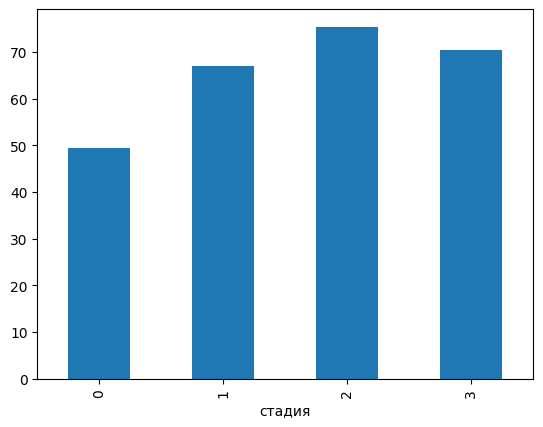

In [28]:
table_agg['возраст'].plot.bar()

<Axes: xlabel='стадия'>

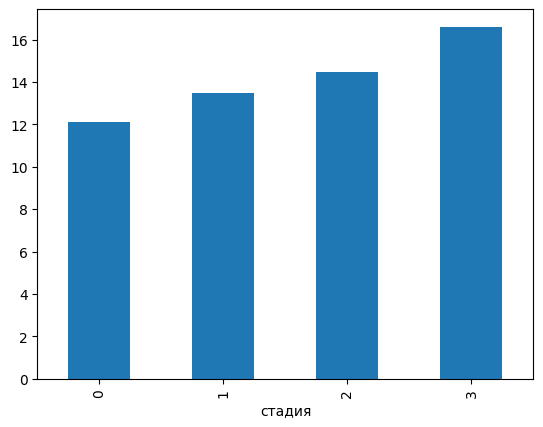

In [29]:
table_agg['величина внутриглазного давления'].plot.bar()

<Axes: xlabel='стадия'>

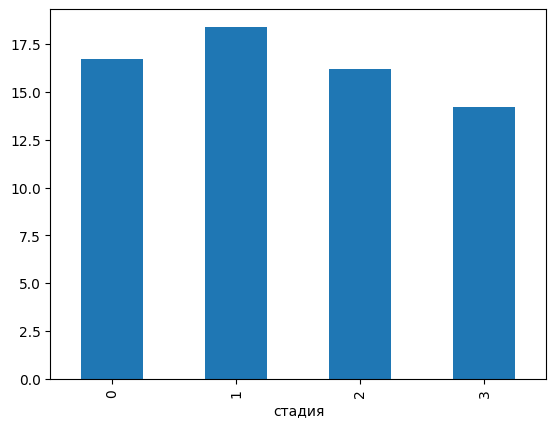

In [30]:
table_agg['ВГД, корригированного на коэффициент ригидности'].plot.bar()

<Axes: xlabel='стадия'>

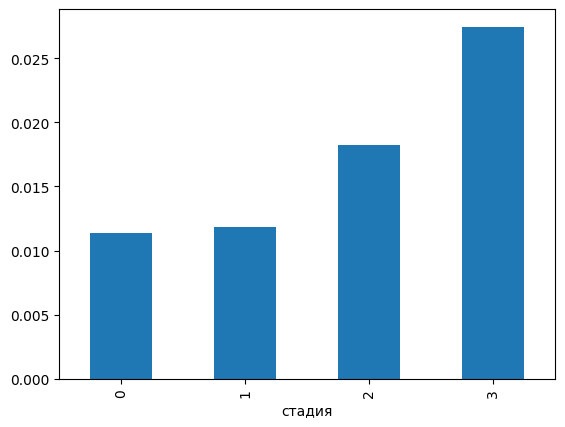

In [31]:
table_agg['Коэфф ригидности склеральн капсулы глаза'].plot.bar()

<Axes: xlabel='стадия'>

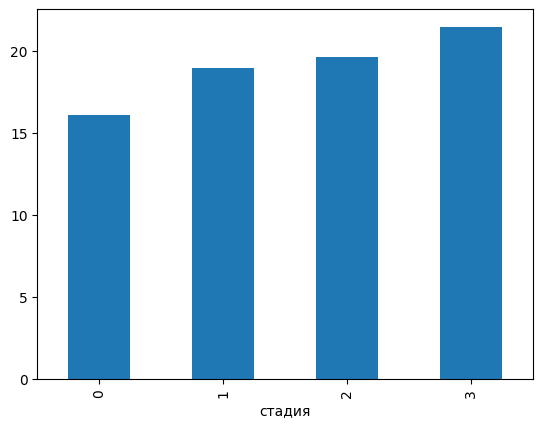

In [32]:
table_agg['Роговично-компенсированное ВГД'].plot.bar()

<Axes: xlabel='стадия'>

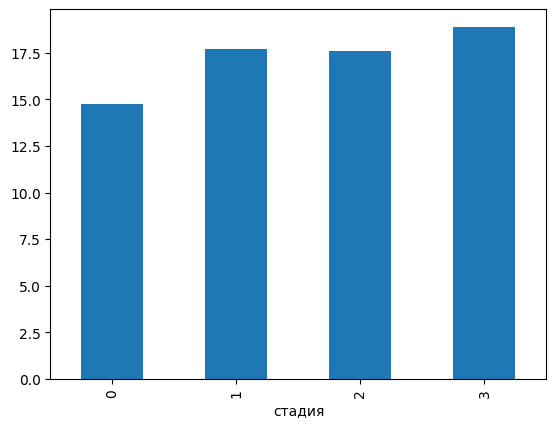

In [33]:
table_agg['ВГД по Гольдману'].plot.bar()

<Axes: xlabel='стадия'>

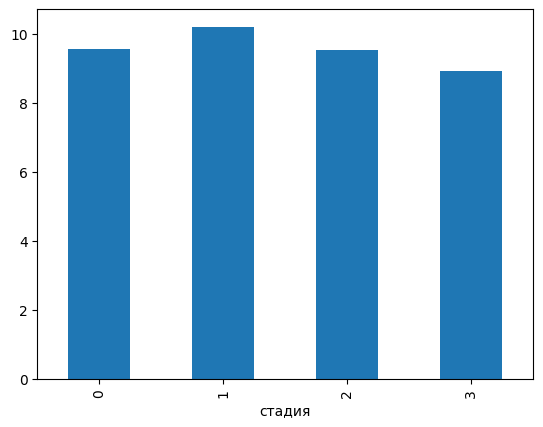

In [34]:
table_agg['Фактор резистентности роговицы'].plot.bar()

<Axes: xlabel='стадия'>

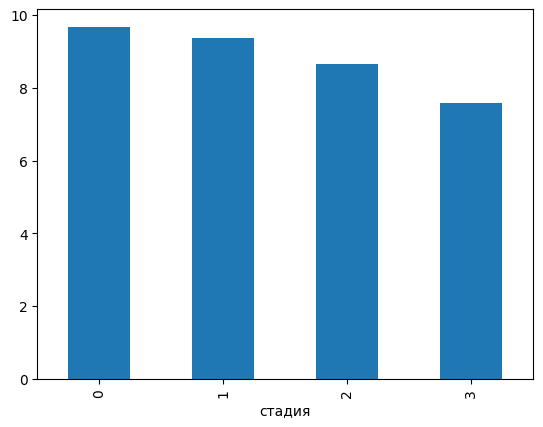

In [35]:
table_agg['КГ'].plot.bar()

<Axes: xlabel='стадия'>

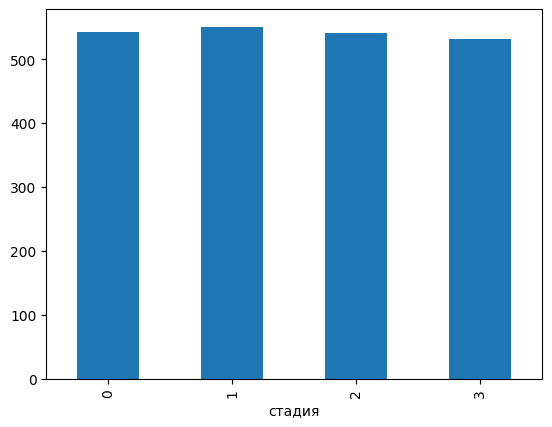

In [36]:
table_agg['ЦТР'].plot.bar()

<Axes: xlabel='стадия'>

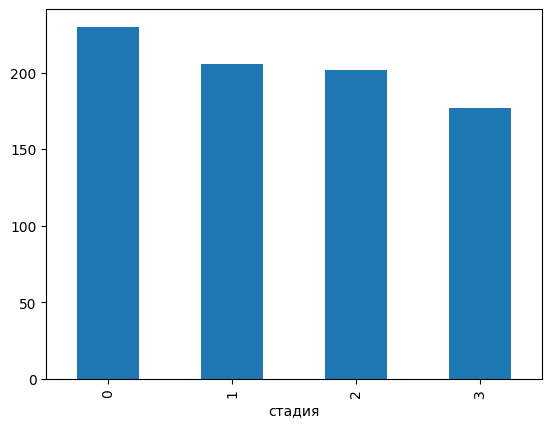

In [37]:
table_agg['РП'].plot.bar()

<Axes: xlabel='стадия'>

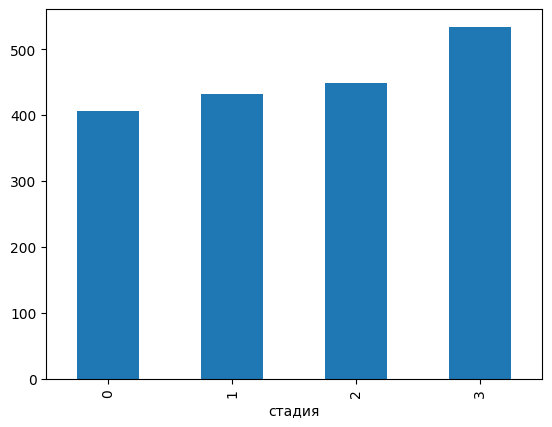

In [38]:
table_agg['ГлРП'].plot.bar()

<Axes: xlabel='стадия'>

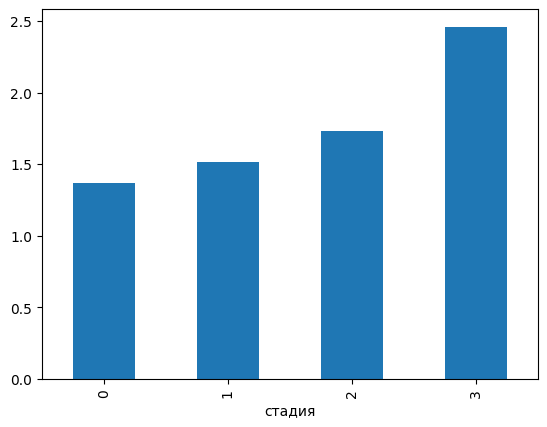

In [39]:
table_agg['gamma Ш'].plot.bar()

<Axes: xlabel='стадия'>

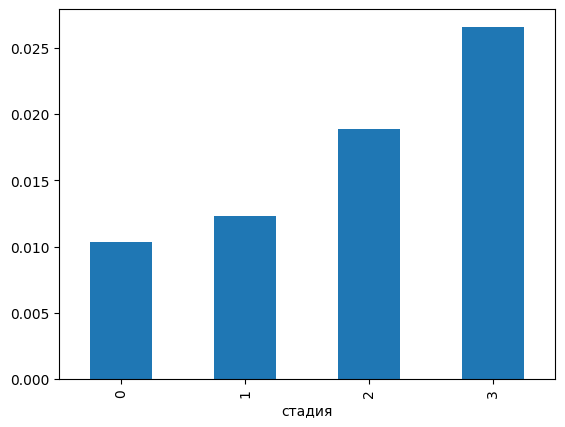

In [40]:
table_agg['Efrid'].plot.bar()

<Axes: xlabel='стадия'>

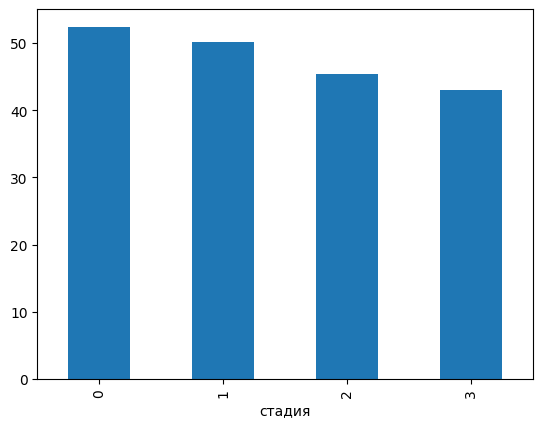

In [41]:
table_agg['SVL'].plot.bar()

<Axes: xlabel='стадия'>

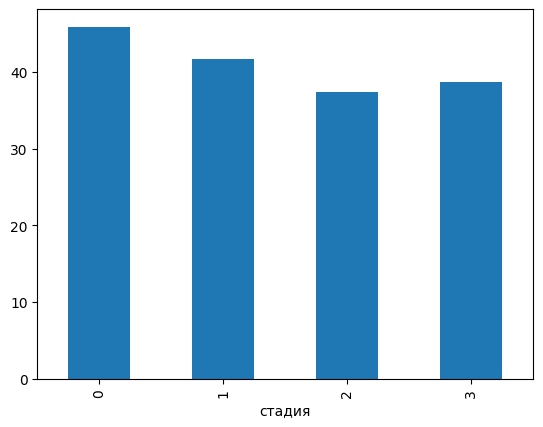

In [42]:
table_agg['DVL'].plot.bar()

<Axes: xlabel='стадия'>

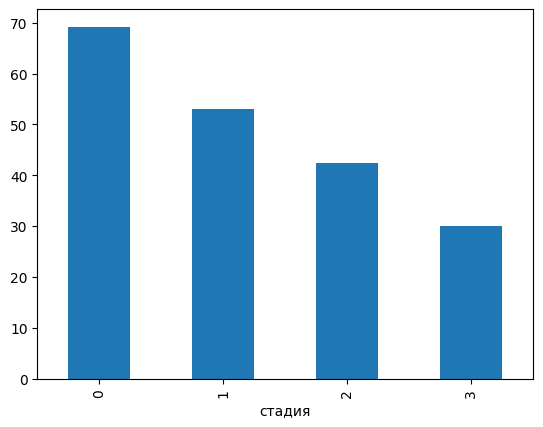

In [43]:
table_agg['РИ (рео.индекс) мОм'].plot.bar()

<Axes: xlabel='стадия'>

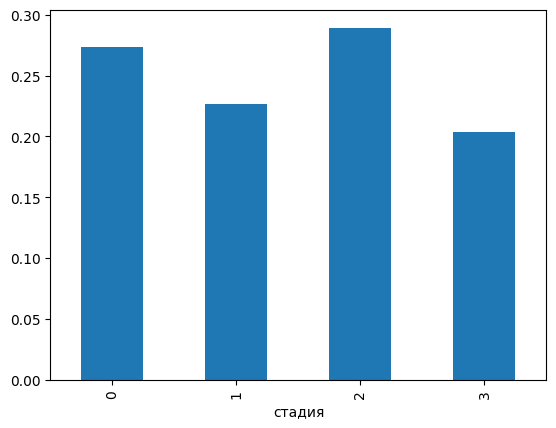

In [44]:
table_agg['ПМН (макс.нап)'].plot.bar()

<Axes: xlabel='стадия'>

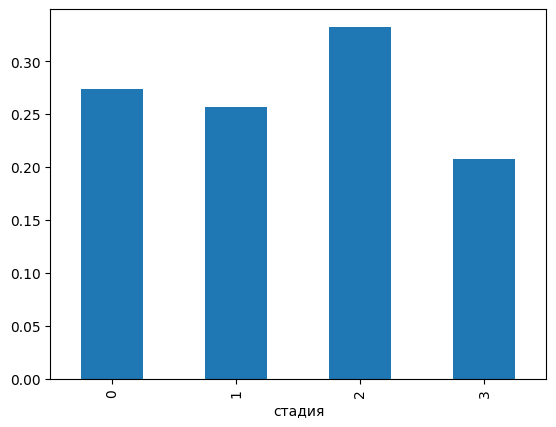

In [45]:
table_agg['ПМУ (мод.упр.)'].plot.bar()

<Axes: xlabel='стадия'>

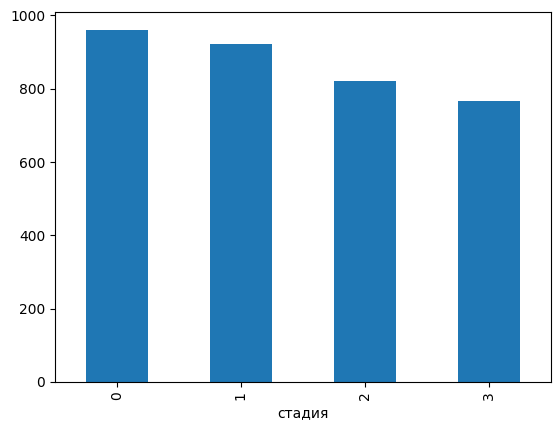

In [46]:
table_agg['Z баз.(отн.))'].plot.bar()

<Axes: xlabel='стадия'>

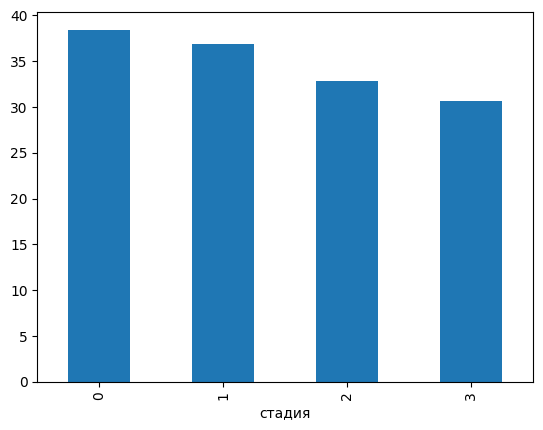

In [47]:
table_agg['Z баз.(мОм)'].plot.bar()

<Axes: xlabel='стадия'>

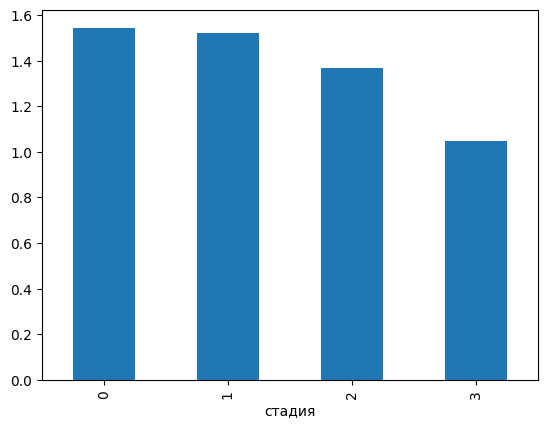

In [48]:
table_agg['УОК (уд.объем) мкл'].plot.bar()

анализ

## Работа с пропущенными значениями в таблице со **здоровыми** пациентами

In [49]:
#посмотрим сколько пропущенных значений в данных
data_healthy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Фамилия                                          8 non-null      object 
 1   возраст                                          11 non-null     int64  
 2   стадия                                           11 non-null     int64  
 3   величина внутриглазного давления                 11 non-null     int64  
 4   ВГД, корригированного на коэффициент ригидности  11 non-null     int64  
 5   Коэфф ригидности склеральн капсулы глаза         11 non-null     float64
 6   Роговично-компенсированное ВГД                   9 non-null      float64
 7   ВГД по Гольдману                                 9 non-null      float64
 8   Фактор резистентности роговицы                   9 non-null      float64
 9   КГ                                

Всего в исходных данных 11 строк.
Посмотрим сколько пропущенных значений в каждой колонке

In [50]:
data_healthy.isnull().sum()

Фамилия                                            3
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     2
ВГД по Гольдману                                   2
Фактор резистентности роговицы                     2
КГ                                                 2
ЦТР                                                0
РП                                                 0
ГлРП                                               0
gamma Ш                                            2
Efrid                                              2
SVL                                                3
DVL                                                4
РИ (рео.индекс) мОм                                3
ПМН (макс.нап)                                

Можем также оценить процент пропущенных значений

In [51]:
(data_healthy.isna().sum() / len(data_healthy)).round(4) * 100

Фамилия                                            27.27
возраст                                             0.00
стадия                                              0.00
величина внутриглазного давления                    0.00
ВГД, корригированного на коэффициент ригидности     0.00
Коэфф ригидности склеральн капсулы глаза            0.00
Роговично-компенсированное ВГД                     18.18
ВГД по Гольдману                                   18.18
Фактор резистентности роговицы                     18.18
КГ                                                 18.18
ЦТР                                                 0.00
РП                                                  0.00
ГлРП                                                0.00
gamma Ш                                            18.18
Efrid                                              18.18
SVL                                                27.27
DVL                                                36.36
РИ (рео.индекс) мОм            

**Вывод**: пропуски есть по 15 признакам из 23, что составляет более половины, процент пропущенных данных в основном не превышает 30%, кроме признака DVL(36.36%). На основе этого становится понятно, что удалять данные с пропущенными значениями - неподходящий способ в данной ситуации.

---



### Рассмотрим характер пропусков в данных

In [52]:
# импортируем библиотеку missingno с псевдонимом msno для визуализации пропусков данных
import missingno as msno

In [53]:
#настраиваем стиль графиков
sns.set()

<Axes: >

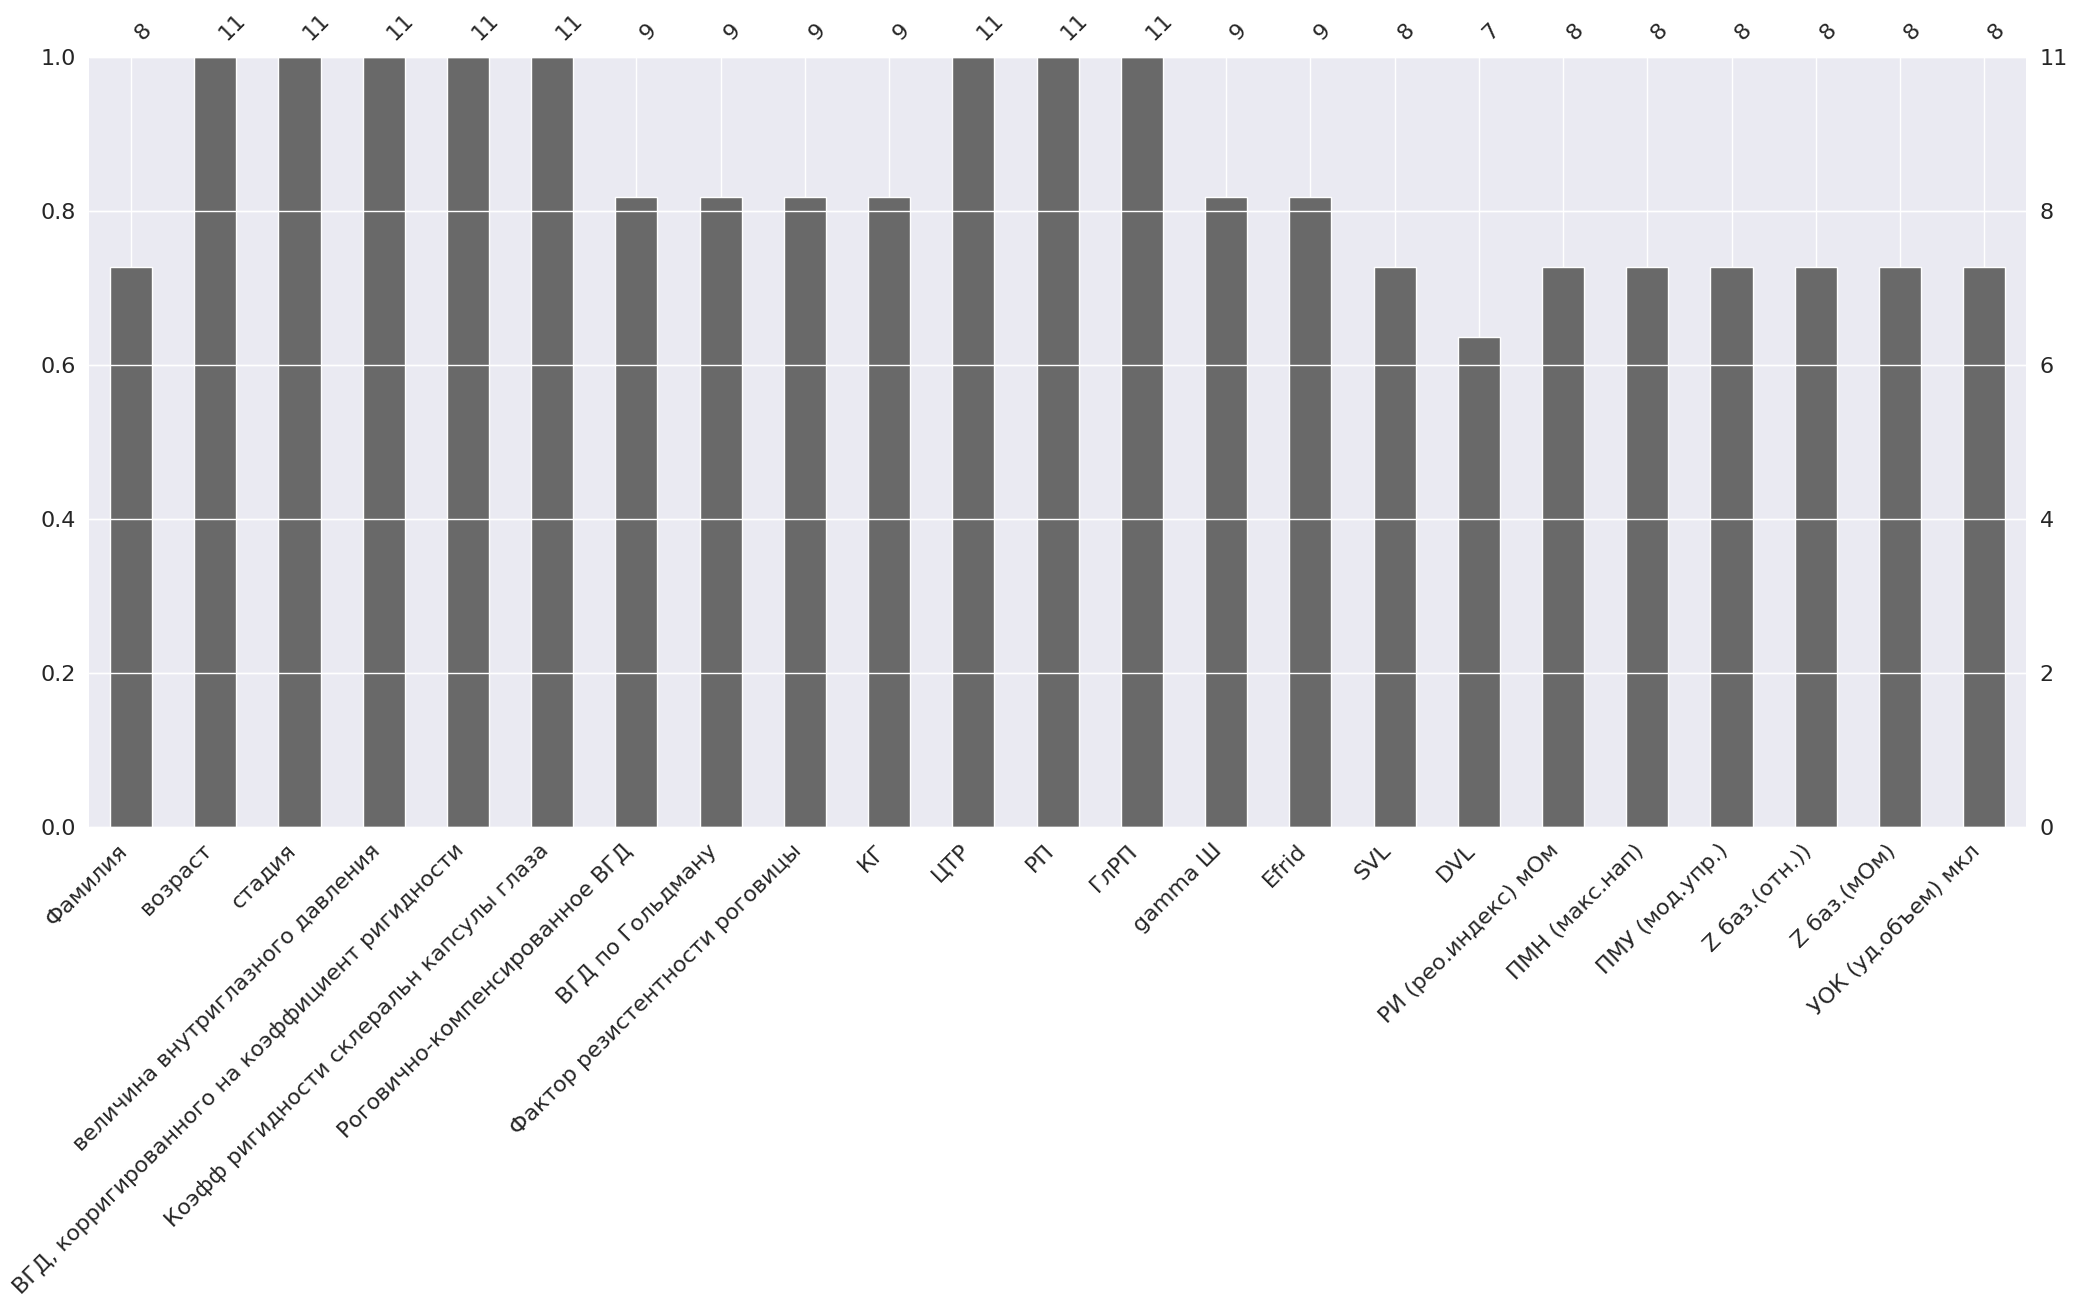

In [54]:
msno.bar(data_healthy)

На этом графике мы видим процент (слева) и абсолютное количество (справа и сверху) заполненных значений.

При этом столбчатая диаграмма не дает информации о том, где именно больше всего пропущенных значений(есть ли в пропусках какая-то закономерность или нет).

Для наглядности расположения пропусков построим **матрицу пропущенных значений.**

<Axes: >

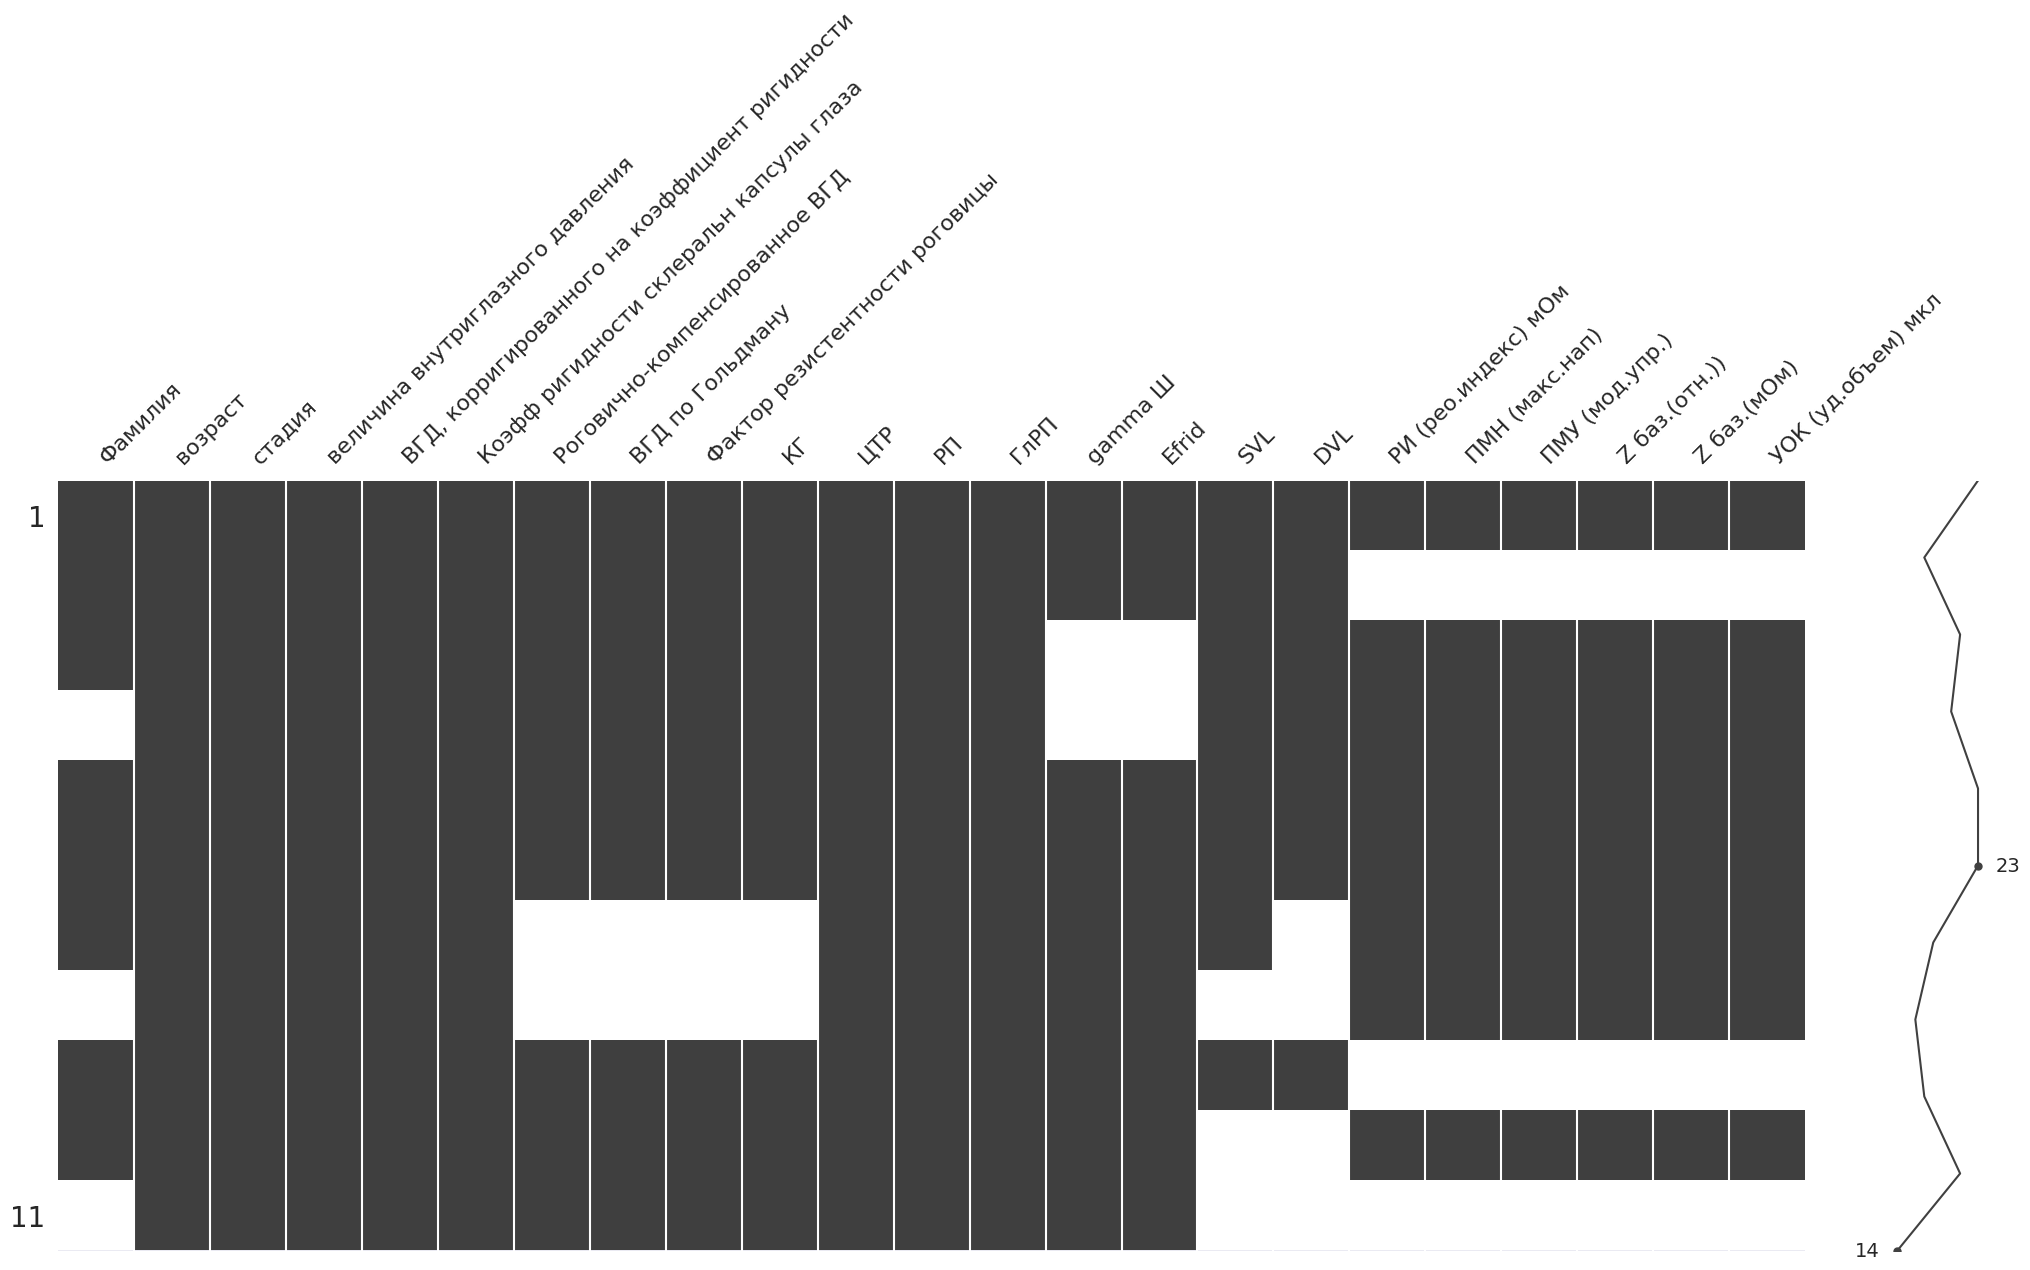

In [55]:
#матрица пропущенных значений
msno.matrix(data_healthy)

Распределение пропущенных значений выглядит случайным внутри столбцов (закономерностью были бы пропуски, например, только в первой половине наблюдений).

Для того чтобы узнать насколько сильно присутствие или отсутствие значений одного признака влияет на присутствие значений другого, построим **матрицу корреляции пропущенных значений (nullity correlation matrix).**

In [56]:
tmp_df = data_healthy.iloc[:, [i for i, n in enumerate(np.var(data_healthy.isnull(), axis = 'rows')) if n > 0]]
tmp_df.isnull().corr()

Фамилия  Роговично-компенсированное ВГД  \
Фамилия                         1.000000                        0.240563   
Роговично-компенсированное ВГД  0.240563                        1.000000   
ВГД по Гольдману                0.240563                        1.000000   
Фактор резистентности роговицы  0.240563                        1.000000   
КГ                              0.240563                        1.000000   
gamma Ш                         0.240563                       -0.222222   
Efrid                           0.240563                       -0.222222   
SVL                             0.541667                        0.240563   
DVL                             0.385758                        0.623610   
РИ (рео.индекс) мОм             0.083333                       -0.288675   
ПМН (макс.нап)                  0.083333                       -0.288675   
ПМУ (мод.упр.)                  0.083333                       -0.288675   
Z баз.(отн.))                   0.083333                       -0.288675   
Z баз.(мОм)                     0.083333                       -0.288675   
УОК (уд.объем) мкл              0.083333                       -0.288675   

                                ВГД по Гольдману  \
Фамилия                                 0.240563   
Роговично-компенсированное ВГД          1.000000   
ВГД по Гольдману                        1.000000   
Фактор резистентности роговицы          1.000000   
КГ                                      1.000000   
gamma Ш                                -0.222222   
Efrid                                  -0.222222   
SVL                                     0.240563   
DVL                                     0.623610   
РИ (рео.индекс) мОм                    -0.288675   
ПМН (макс.нап)                         -0.288675   
ПМУ (мод.упр.)                         -0.288675   
Z баз.(отн.))                          -0.288675   
Z баз.(мОм)                            -0.288675   
УОК (уд.объем) мкл                     -0.288675   

                                Фактор резистентности роговицы        КГ  \
Фамилия                                               0.240563  0.240563   
Роговично-компенсированное ВГД                        1.000000  1.000000   
ВГД по Гольдману                                      1.000000  1.000000   
Фактор резистентности роговицы                        1.000000  1.000000   
КГ                                                    1.000000  1.000000   
gamma Ш                                              -0.222222 -0.222222   
Efrid                                                -0.222222 -0.222222   
SVL                                                   0.240563  0.240563   
DVL                                                   0.623610  0.623610   
РИ (рео.индекс) мОм                                  -0.288675 -0.288675   
ПМН (макс.нап)                                       -0.288675 -0.288675   
ПМУ (мод.упр.)                                       -0.288675 -0.288675   
Z баз.(отн.))                                        -0.288675 -0.288675   
Z баз.(мОм)                                          -0.288675 -0.288675   
УОК (уд.объем) мкл                                   -0.288675 -0.288675   

                                 gamma Ш     Efrid       SVL       DVL  \
Фамилия                         0.240563  0.240563  0.541667  0.385758   
Роговично-компенсированное ВГД -0.222222 -0.222222  0.240563  0.623610   
ВГД по Гольдману               -0.222222 -0.222222  0.240563  0.623610   
Фактор резистентности роговицы -0.222222 -0.222222  0.240563  0.623610   
КГ                             -0.222222 -0.222222  0.240563  0.623610   
gamma Ш                         1.000000  1.000000 -0.288675 -0.356348   
Efrid                           1.000000  1.000000 -0.288675 -0.356348   
SVL                            -0.288675 -0.288675  1.000000  0.810093   
DVL                            -0.356348 -0.356348  0.810093  1.000000   
РИ (рео.индекс) мОм       

Значения корреляции могут быть от −1 (если значения одного признака присутствуют, значения другого — отсутствуют) до 1 (если присутствуют значения одного признака, то присутствуют значения и другого).

Визуально, корреляцию пропущенных значений можно представить с помощью тепловой карты (heatmap). Для этого есть функция msno.heatmap().

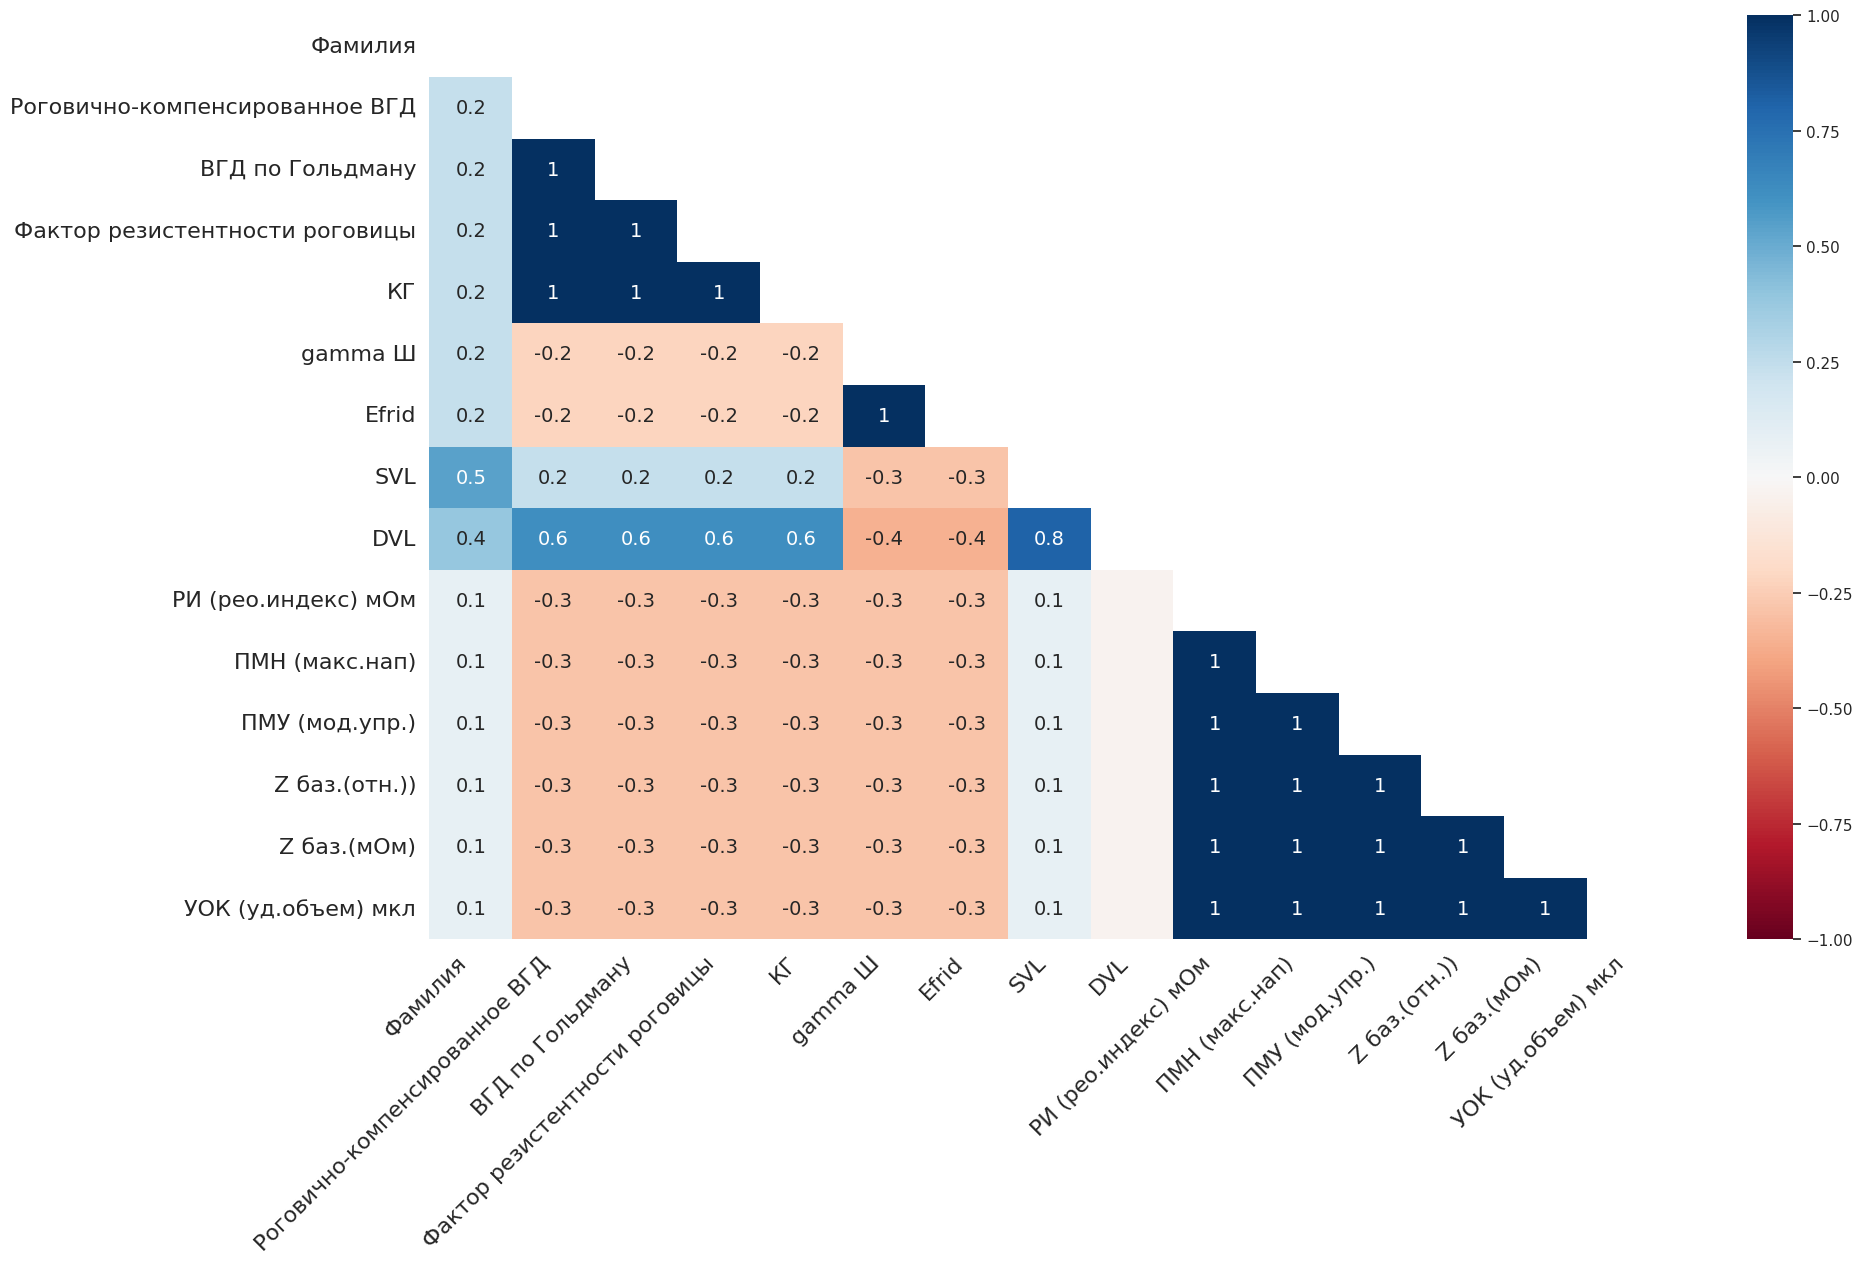

In [57]:
msno.heatmap(data_healthy);

Заметим, что несколько пропущенных признаков имеют **коэффициент корреляции 1.** Получается, что пропуски одного признака влияют на пропуски другого.

Между собой связаны пропуски по следующим признакам:


*   ВГД по Гольдману и Роговично-компенсированное ВГД
*   Фактор резистентности роговицы и Роговично-компенсированное ВГД
*   Фактор резистентности роговицы и ВГД по Гольдману
*   КГ и Роговично-компенсированное ВГД
*   КГ и ВГД по Гольдману
*   КГ и Фактор резистентности роговицы
*   Efrid и gamma Ш
*   ПМН (макс.нап) и РИ (рео.индекс) мОм
*   ПМУ (мод.упр.) и РИ (рео.индекс) мОм
*   ПМУ (мод.упр.) и ПМН (макс.нап)
*   Z баз.(отн.) и РИ (рео.индекс) мОм  
*   Z баз.(отн.) и ПМН (макс.нап)
*   Z баз.(отн.) и ПМУ (мод.упр.)
*   Z баз.(мОм) и РИ (рео.индекс) мОм
*   Z баз.(мОм) и ПМН (макс.нап)
*   Z баз.(мОм) и ПМУ (мод.упр.)
*   Z баз.(мОм) и Z баз.(отн.)
*   УОК (уд.объем) мкл и РИ (рео.индекс) мОм
*   УОК (уд.объем) мкл и ПМН (макс.нап)
*   УОК (уд.объем) мкл и ПМУ (мод.упр.)
*   УОК (уд.объем) мкл и Z баз.(отн.)
*   УОК (уд.объем) мкл и Z баз.(мОм)

### Заполняем пропуски в категориальных признаках



---
Фамилия - категориальный признак. Заполним значением по умолчанию, например,
"Иванов"

In [58]:
data_healthy['Фамилия']=data_healthy['Фамилия'].fillna('Иванов')
data_healthy.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     2
ВГД по Гольдману                                   2
Фактор резистентности роговицы                     2
КГ                                                 2
ЦТР                                                0
РП                                                 0
ГлРП                                               0
gamma Ш                                            2
Efrid                                              2
SVL                                                3
DVL                                                4
РИ (рео.индекс) мОм                                3
ПМН (макс.нап)                                

### Заполняем пропуски в количественных признаках

---

Остальные пропущенные значения принадлежат количественным признакам.

Можно заменить средним значением, модой или медианой.

У такого подхода есть ряд недостатков.

Во-первых, когда в данных появляется большое количество одинаковых близких к среднему значений, мы снижаем ценную вариативность в данных.

Во-вторых, такое заполнение пропусков может быть некорректно.


### Роговично-компенсированное ВГД

In [59]:
# сделаем копию данных
fillna_median = data_healthy.copy()

# заполним пропуски в столбце 'Роговично-компенсированное ВГД' медианным значением признака,
# можно заполнить и средним арифметическим через метод .mean()
fillna_median['Роговично-компенсированное ВГД'].fillna(fillna_median['Роговично-компенсированное ВГД'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['Роговично-компенсированное ВГД'].isna().sum()

0

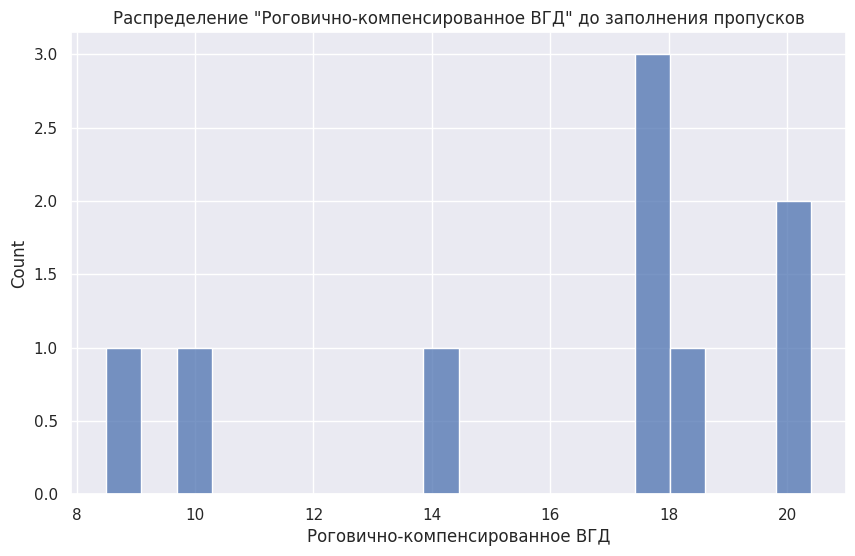

In [60]:
# изменим размер последующих графиков
sns.set(rc = {'figure.figsize' : (10, 6)})

# скопируем датафрейм
median_imputer = data_healthy.copy()

# посмотрим на распределение 'Роговично-компенсированное ВГД' до заполнения пропусков
sns.histplot(median_imputer['Роговично-компенсированное ВГД'], bins = 20)
plt.title('Распределение "Роговично-компенсированное ВГД" до заполнения пропусков');

In [61]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['Роговично-компенсированное ВГД'].mean().round(1), median_imputer['Роговично-компенсированное ВГД'].median()


(16.1, 17.8)

In [62]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Роговично-компенсированное ВГД'] = imp_median.fit_transform(median_imputer[['Роговично-компенсированное ВГД']])

# убедимся, что пропущенных значений не осталось
median_imputer['Роговично-компенсированное ВГД'].isna().sum()

0

Посмотрим на распределение признака и его медианное значение после заполнения пропусков.

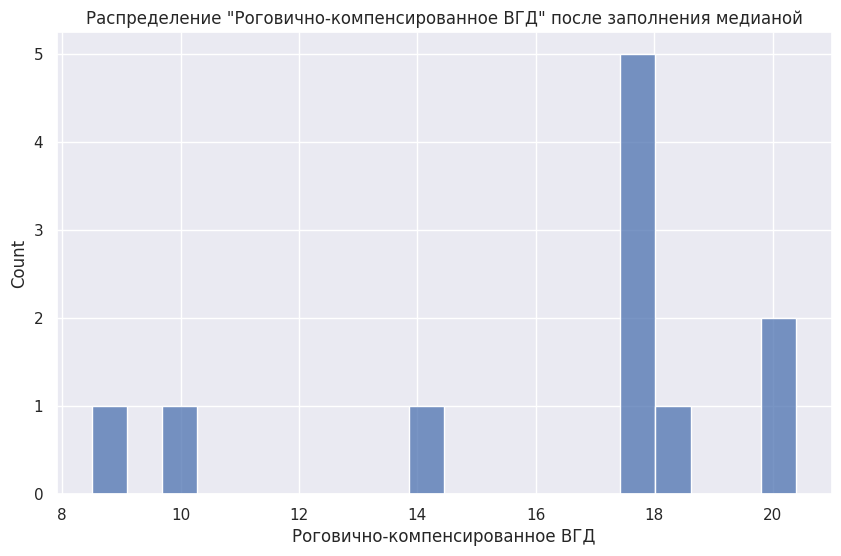

In [63]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['Роговично-компенсированное ВГД'], bins = 20)
plt.title('Распределение "Роговично-компенсированное ВГД" после заполнения медианой');

In [64]:
# посмотрим на метрики после заполнения медианой
median_imputer['Роговично-компенсированное ВГД'].mean().round(1), median_imputer['Роговично-компенсированное ВГД'].median()


(16.4, 17.8)

Среднее значение изменилось(увеличилось на 0.3), медиана осталось прежней.

По графикам заметим, что распределение не претерпело существенных изменений. Значит можем заполнить пропуски по этой стратегии.

---



Аналогично попробуем заполнить и другие пропуски медианным значением.

### ВГД по Гольдману

In [65]:
# заполним пропуски в столбце 'ВГД по Гольдману' медианным значением признака
fillna_median['ВГД по Гольдману'].fillna(fillna_median['ВГД по Гольдману'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['ВГД по Гольдману'].isna().sum()

0

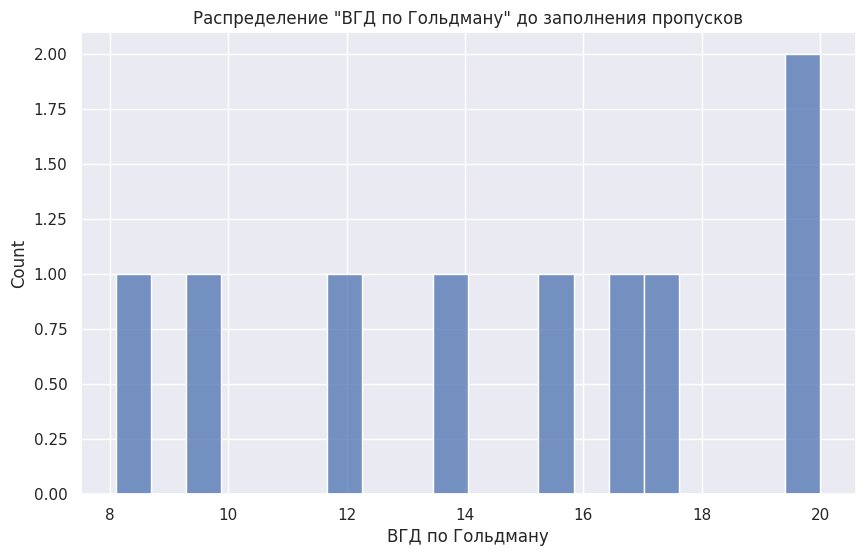

In [66]:
# посмотрим на распределение 'ВГД по Гольдману' до заполнения пропусков
sns.histplot(data_healthy['ВГД по Гольдману'], bins = 20)
plt.title('Распределение "ВГД по Гольдману" до заполнения пропусков');

In [67]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['ВГД по Гольдману'].mean().round(1), median_imputer['ВГД по Гольдману'].median()


(14.7, 15.6)

In [68]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['ВГД по Гольдману'] = imp_median.fit_transform(median_imputer[['ВГД по Гольдману']])

# убедимся, что пропущенных значений не осталось
median_imputer['ВГД по Гольдману'].isna().sum()

0

Посмотрим на распределение возраста и его медианное значение после заполнения пропусков.

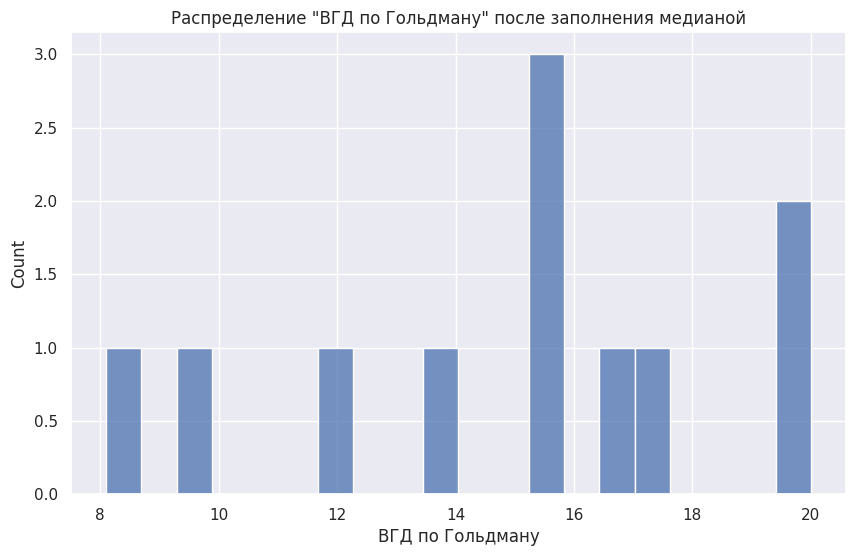

In [69]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['ВГД по Гольдману'], bins = 20)
plt.title('Распределение "ВГД по Гольдману" после заполнения медианой');

In [70]:
# посмотрим на метрики после заполнения медианой
median_imputer['ВГД по Гольдману'].mean().round(1), median_imputer['ВГД по Гольдману'].median()


(14.9, 15.6)

Среднее значение изменилось(увеличилось на 0.2), медиана осталось прежней.

График распределения визуально **изменился**.

### Фактор резистентности роговицы

In [71]:
# заполним пропуски в столбце 'Фактор резистентности роговицы' медианным значением признака
fillna_median['Фактор резистентности роговицы'].fillna(fillna_median['Фактор резистентности роговицы'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['Фактор резистентности роговицы'].isna().sum()

0

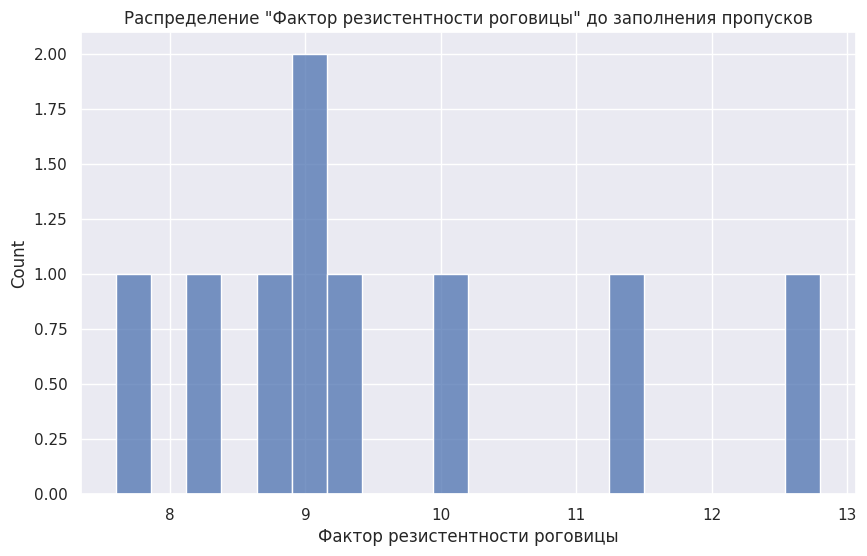

In [72]:
# посмотрим на распределение 'Фактор резистентности роговицы' до заполнения пропусков
sns.histplot(data_healthy['Фактор резистентности роговицы'], bins = 20)
plt.title('Распределение "Фактор резистентности роговицы" до заполнения пропусков');

In [73]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['Фактор резистентности роговицы'].mean().round(1), median_imputer['Фактор резистентности роговицы'].median()


(9.6, 9.1)

In [74]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Фактор резистентности роговицы'] = imp_median.fit_transform(median_imputer[['Фактор резистентности роговицы']])

# убедимся, что пропущенных значений не осталось
median_imputer['Фактор резистентности роговицы'].isna().sum()

0

Посмотрим на распределение возраста и его медианное значение после заполнения пропусков.

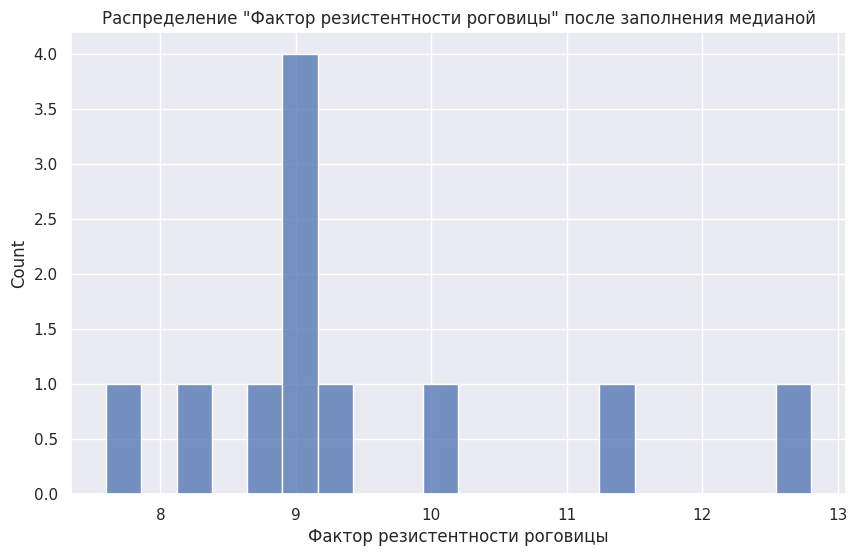

In [75]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['Фактор резистентности роговицы'], bins = 20)
plt.title('Распределение "Фактор резистентности роговицы" после заполнения медианой');

In [76]:
# посмотрим на метрики после заполнения медианой
median_imputer['Фактор резистентности роговицы'].mean().round(1), median_imputer['Фактор резистентности роговицы'].median()


(9.5, 9.1)

Среднее значение изменилось(увеличилось на 0.1), медиана осталось прежней.

График распределения визуально **незначительно изменился**, форма осталась прежней.



### КГ

In [77]:
# заполним пропуски в столбце 'КГ' медианным значением признака
fillna_median['КГ'].fillna(fillna_median['КГ'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['КГ'].isna().sum()

0

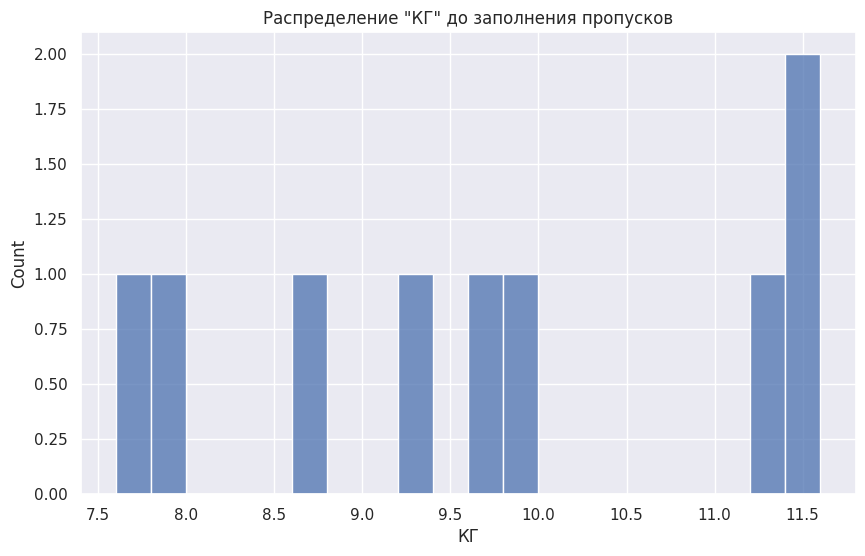

In [78]:
# посмотрим на распределение 'КГ' до заполнения пропусков
sns.histplot(data_healthy['КГ'], bins = 20)
plt.title('Распределение "КГ" до заполнения пропусков');

In [79]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['КГ'].mean().round(1), median_imputer['КГ'].median()


(9.7, 9.6)

In [80]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['КГ'] = imp_median.fit_transform(median_imputer[['КГ']])

# убедимся, что пропущенных значений не осталось
median_imputer['КГ'].isna().sum()

0

Посмотрим на распределение возраста и его медианное значение после заполнения пропусков.

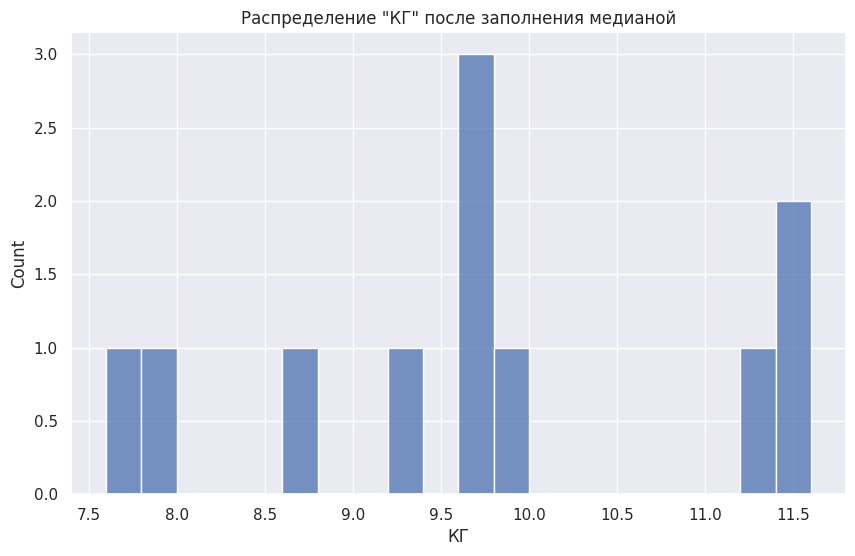

In [81]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['КГ'], bins = 20)
plt.title('Распределение "КГ" после заполнения медианой');

In [82]:
# посмотрим на метрики после заполнения медианой
median_imputer['КГ'].mean().round(1), median_imputer['КГ'].median()


(9.7, 9.6)

Среднее значение и медиана не изменились.

График распределения визуально **изменился**.

### gamma Ш

In [83]:
# заполним пропуски в столбце 'gamma Ш' медианным значением признака
fillna_median['gamma Ш'].fillna(fillna_median['gamma Ш'].median(), inplace = True)

# убедимся, что пропусков не осталось
fillna_median['gamma Ш'].isna().sum()

0

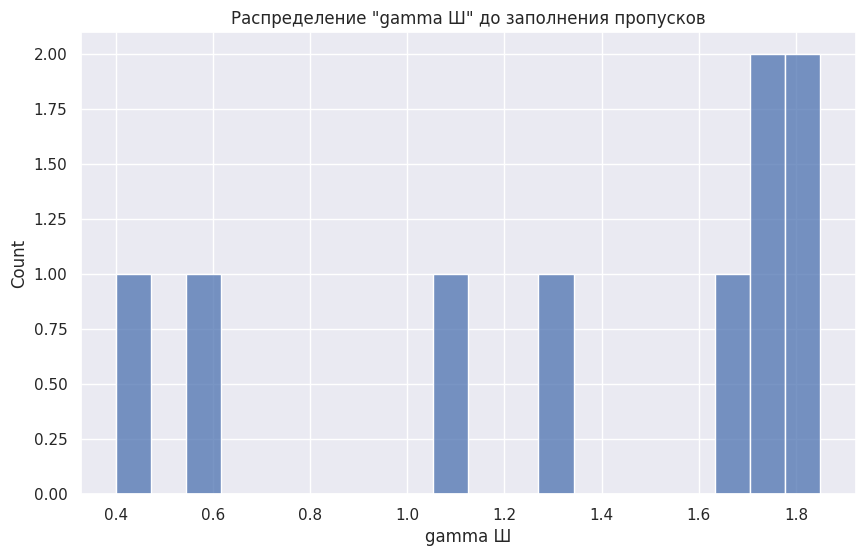

In [84]:
# посмотрим на распределение 'gamma Ш' до заполнения пропусков
sns.histplot(data_healthy['gamma Ш'], bins = 20)
plt.title('Распределение "gamma Ш" до заполнения пропусков');

In [85]:
#Посмотрим на среднее арифметическое и медиану.
median_imputer['gamma Ш'].mean().round(1), median_imputer['gamma Ш'].median()


(1.4, 1.7)

In [86]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
# (для заполнения средним арифметическим используйте strategy = 'mean')
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['gamma Ш'] = imp_median.fit_transform(median_imputer[['gamma Ш']])

# убедимся, что пропущенных значений не осталось
median_imputer['gamma Ш'].isna().sum()

0

Посмотрим на распределение возраста и его медианное значение после заполнения пропусков.

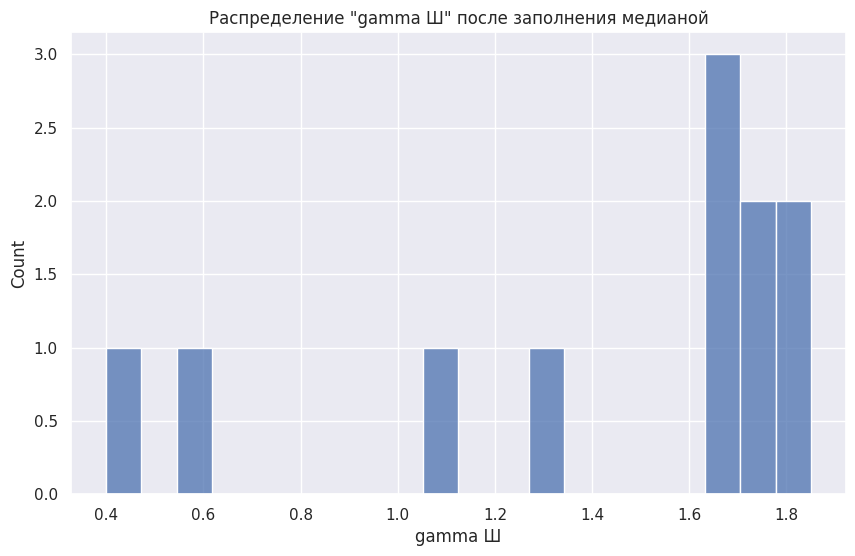

In [87]:
# посмотрим на распределение после заполнения пропусков
sns.histplot(median_imputer['gamma Ш'], bins = 20)
plt.title('Распределение "gamma Ш" после заполнения медианой');

In [88]:
# посмотрим на метрики после заполнения медианой
median_imputer['gamma Ш'].mean().round(1), median_imputer['gamma Ш'].median()


(1.4, 1.7)

Среднее значение и медиана не изменились.

График распределения визуально **изменился**.

Остальные пропуски также заполним медианным значением

### Остальные пропуски

In [89]:
#Посмотрим на среднее арифметическое и медиану.
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())


Efrid -  0.0    0.0138
SVL -  52.4    52.44
DVL -  45.9    45.88
РИ (рео.индекс) мОм -  69.2    51.555
ПМН (макс.нап) -  0.3    0.28
ПМУ (мод.упр.) -  0.3    0.275
Z баз.(отн.)) -  960.8    948.0
Z баз.(мОм) -  38.4    37.92
УОК (уд.объем) мкл -  1.5    1.25286723


In [90]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Efrid'] = imp_median.fit_transform(median_imputer[['Efrid']])
median_imputer['SVL'] = imp_median.fit_transform(median_imputer[['SVL']])
median_imputer['DVL'] = imp_median.fit_transform(median_imputer[['DVL']])
median_imputer['РИ (рео.индекс) мОм'] = imp_median.fit_transform(median_imputer[['РИ (рео.индекс) мОм']])
median_imputer['ПМН (макс.нап)'] = imp_median.fit_transform(median_imputer[['ПМН (макс.нап)']])
median_imputer['ПМУ (мод.упр.)'] = imp_median.fit_transform(median_imputer[['ПМУ (мод.упр.)']])
median_imputer['Z баз.(отн.))'] = imp_median.fit_transform(median_imputer[['Z баз.(отн.))']])
median_imputer['Z баз.(мОм)'] = imp_median.fit_transform(median_imputer[['Z баз.(мОм)']])
median_imputer['УОК (уд.объем) мкл'] = imp_median.fit_transform(median_imputer[['УОК (уд.объем) мкл']])

# убедимся, что пропущенных значений не осталось
median_imputer['УОК (уд.объем) мкл'].isna().sum()

0

In [91]:
# посмотрим на метрики после заполнения медианой
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())


Efrid -  0.0    0.0138
SVL -  52.4    52.44
DVL -  45.9    45.88
РИ (рео.индекс) мОм -  64.4    51.555
ПМН (макс.нап) -  0.3    0.28
ПМУ (мод.упр.) -  0.3    0.275
Z баз.(отн.)) -  957.3    948.0
Z баз.(мОм) -  38.3    37.92
УОК (уд.объем) мкл -  1.5    1.25286723


Среднее значение и медиана не изменились для признаков Efrid, SVL, DVL, ПМН(макс.нап), ПМН(мод.упр.), УОК (уд.объем) мкл.

Заметно изменение среднего значения РИ (рео.индекс) мОм, Z баз.(отн.) и Z баз.(мОм).

Проверяем, что заполнили все пропуски.

In [92]:
median_imputer.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     0
ВГД по Гольдману                                   0
Фактор резистентности роговицы                     0
КГ                                                 0
ЦТР                                                0
РП                                                 0
ГлРП                                               0
gamma Ш                                            0
Efrid                                              0
SVL                                                0
DVL                                                0
РИ (рео.индекс) мОм                                0
ПМН (макс.нап)                                

## Сравниваем взаимосвязь признаков до и после заполнения пропусков

In [93]:
corr_matrix_before=data_healthy.iloc [:, 1:11].corr().round(3)

<Axes: >

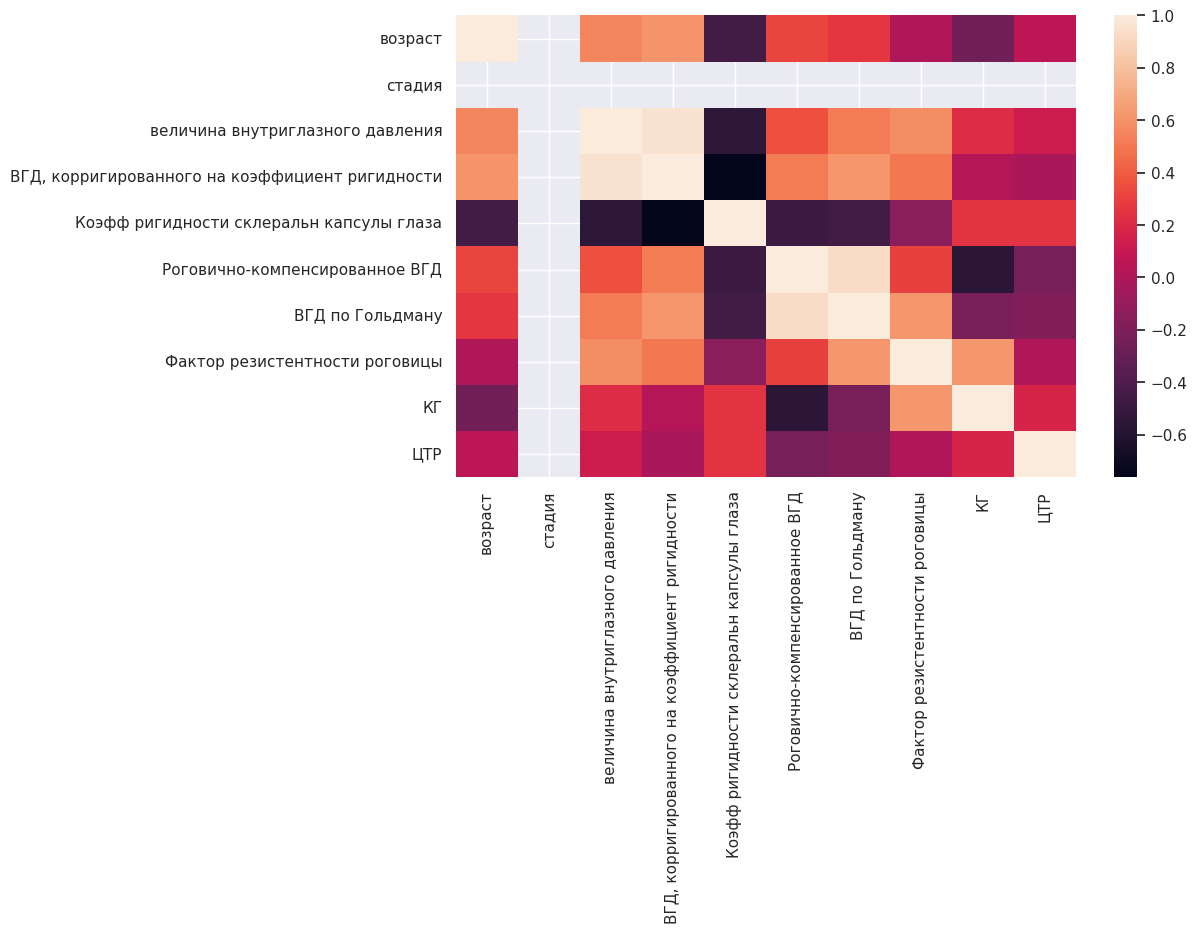

In [94]:
sns.heatmap(corr_matrix_before)

In [95]:
corr_matrix_after=median_imputer.iloc [:, 1:11].corr().round(3)

<Axes: >

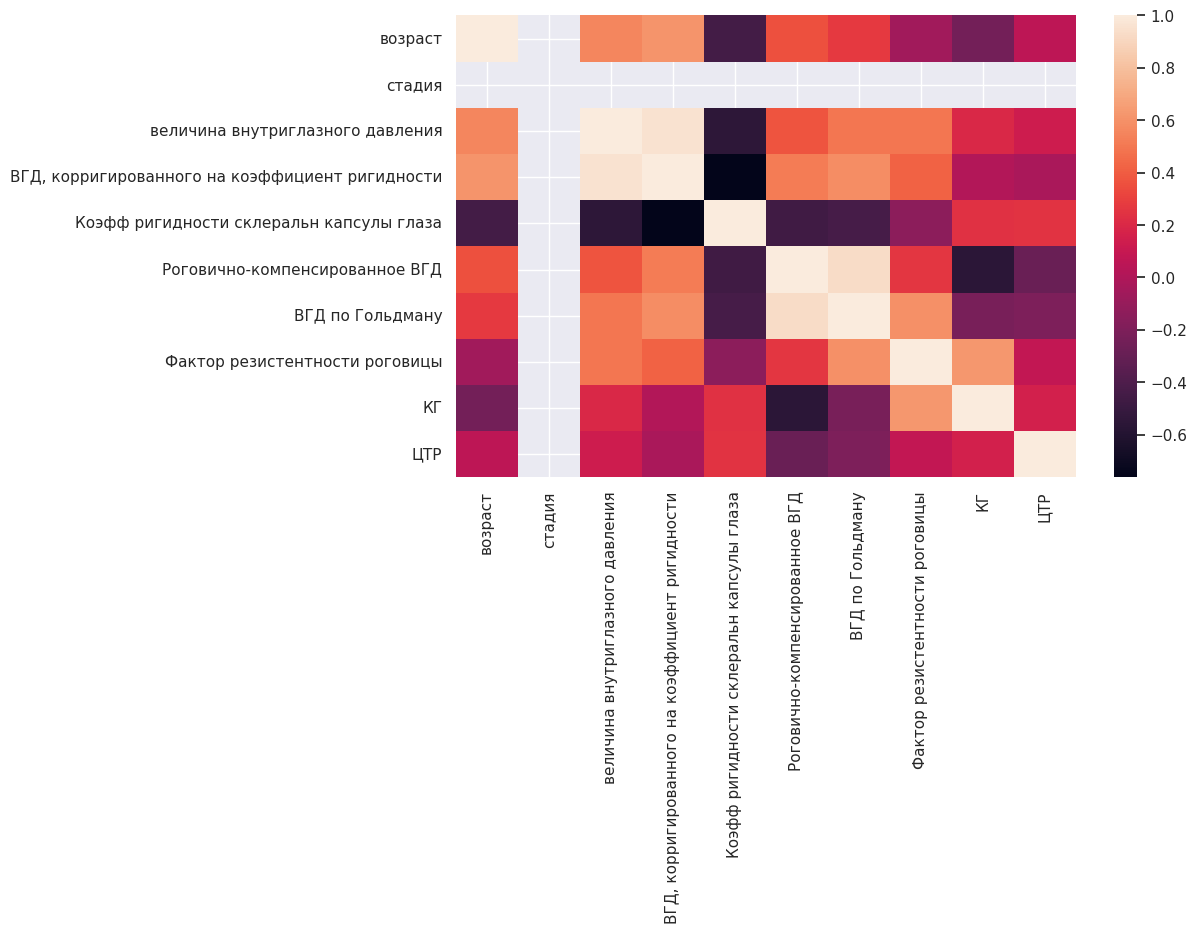

In [96]:
sns.heatmap(corr_matrix_after)

Визуально взаимосвязь дополненных показателей с другими не изменилась.

In [97]:
changes_in_corr=corr_matrix_before-corr_matrix_after

In [98]:
changes_in_corr

возраст  стадия  \
возраст                                            0.000     NaN   
стадия                                               NaN     NaN   
величина внутриглазного давления                   0.000     NaN   
ВГД, корригированного на коэффициент ригидности    0.000     NaN   
Коэфф ригидности склеральн капсулы глаза           0.000     NaN   
Роговично-компенсированное ВГД                    -0.041     NaN   
ВГД по Гольдману                                  -0.011     NaN   
Фактор резистентности роговицы                     0.061     NaN   
КГ                                                -0.019     NaN   
ЦТР                                                0.000     NaN   

                                                 величина внутриглазного давления  \
возраст                                                                     0.000   
стадия                                                                        NaN   
величина внутриглазного давления                                            0.000   
ВГД, корригированного на коэффициент ригидности                             0.000   
Коэфф ригидности склеральн капсулы глаза                                    0.000   
Роговично-компенсированное ВГД                                             -0.016   
ВГД по Гольдману                                                            0.017   
Фактор резистентности роговицы                                              0.088   
КГ                                                                          0.024   
ЦТР                                                                         0.000   

                                                 ВГД, корригированного на коэффициент ригидности  \
возраст                                                                                    0.000   
стадия                                                                                       NaN   
величина внутриглазного давления                                                           0.000   
ВГД, корригированного на коэффициент ригидности                                            0.000   
Коэфф ригидности склеральн капсулы глаза                                                   0.000   
Роговично-компенсированное ВГД                                                             0.005   
ВГД по Гольдману                                                                           0.031   
Фактор резистентности роговицы                                                             0.082   
КГ                                                                                         0.008   
ЦТР                                                                                        0.000   

                                                 Коэфф ригидности склеральн капсулы глаза  \
возраст                                                                             0.000   
стадия                                                                                NaN   
величина внутриглазного давления                                                    0.000   
ВГД, корригированного на коэффициент ригидности                                     0.000   
Коэфф ригидности склеральн капсулы глаза                                            0.000   
Роговично-компенсированное ВГД                                                     -0.012   
ВГД по Гольдману                                                                   -0.011   
Фактор резистентности роговицы                                                     -0.012   
КГ                                                                                  0.006   
ЦТР                                                                                 0.000   

                                                 Роговично-компенсированное ВГД  \
возраст                                                                  -0.041   
стадия                                                                   

Изменения произошли, но они достаточно малы.

<Axes: >

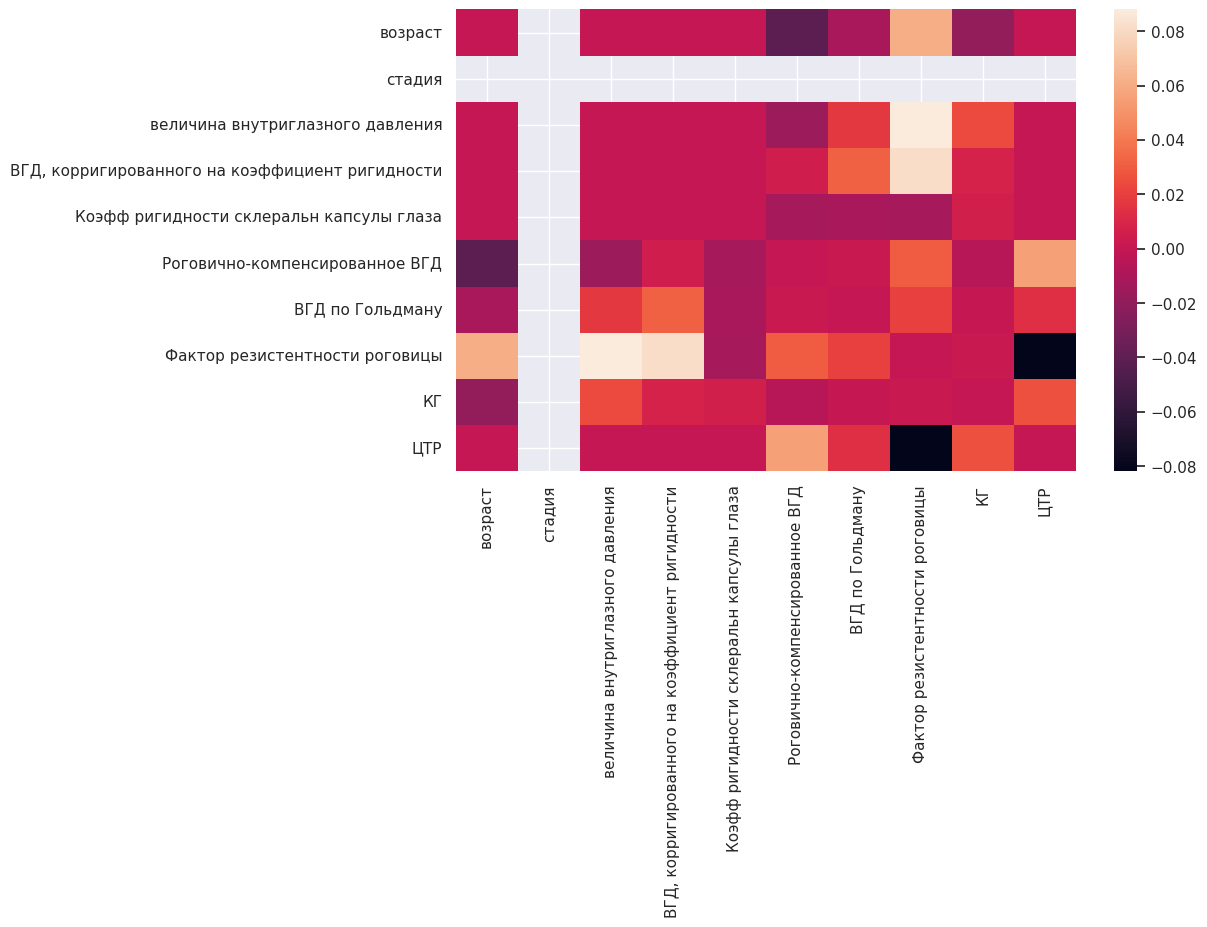

In [99]:
sns.heatmap(changes_in_corr)

In [100]:
data_healthy=median_imputer

Аналогично будут обработаны таблицы для 1й, 2й и 3й стадий

## Работа с пропущенными значениями в таблице с пациентами **1 стадии заболевания**

In [101]:
data_1_stage

Фамилия  возраст  стадия  величина внутриглазного давления  \
0        горнева       84       1                                13   
1         фокина       64       1                                20   
2        петрова       56       1                                18   
3            NaN       56       1                                21   
4    ефременкова       65       1                                 7   
5            NaN       65       1                                13   
6    набатчикова       72       1                                11   
7        огулева       65       1                                 8   
8       калядова       73       1                                14   
9       казакова       66       1                                13   
10         Конев       61       1                                10   
11           NaN       61       1                                 9   
12       Яковлев       68       1                                18   
13        Качура       72       1                                12   
14  Соловьева С.       77       1                                15   

    ВГД, корригированного на коэффициент ригидности  \
0                                                27   
1                                                30   
2                                                21   
3                                                18   
4                                                 9   
5                                                24   
6                                                12   
7                                                19   
8                                                17   
9                                                17   
10                                               12   
11                                               10   
12                                               22   
13                                               20   
14                                               18   

    Коэфф ригидности склеральн капсулы глаза  Роговично-компенсированное ВГД  \
0                                     0.0007                            16.1   
1                                     0.0053                            20.0   
2                                     0.0148                            23.7   
3                                     0.0268                            26.8   
4                                     0.0167                            17.7   
5                                     0.0040                            21.5   
6                                     0.0032                            21.0   
7                                     0.0038                            12.2   
8                                     0.0167                            21.2   
9                                     0.0147                            12.4   
10                                    0.0157                            22.4   
11                                    0.0192                            15.2   
12                                    0.0142                             NaN   
13                                    0.0074                            16.7   
14                                    0.0150                            18.7   

    ВГД по Гольдману  Фактор резистентности роговицы    КГ  ...  gamma Ш  \
0               14.7                             9.5   9.6  ...     0.45   
1               20.0                            11.0  10.0  ...     0.55   
2               23.1                            11.7   9.3  ...     2.00   
3               25.6                            11.8   8.5  ...     2.10   
4               14.4                             8.0   8.0  ...     1.95   
5               17.8                             8.3   7.1  ...     1.00   
6               20.0                            11.7   9.3  ...      NaN   
7               13.5                            11.5  12.3  ...     0.95   
8               19.1      

In [102]:
#посмотрим сколько пропущенных значений в данных
data_1_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Фамилия                                          12 non-null     object 
 1   возраст                                          15 non-null     int64  
 2   стадия                                           15 non-null     int64  
 3   величина внутриглазного давления                 15 non-null     int64  
 4   ВГД, корригированного на коэффициент ригидности  15 non-null     int64  
 5   Коэфф ригидности склеральн капсулы глаза         15 non-null     float64
 6   Роговично-компенсированное ВГД                   14 non-null     float64
 7   ВГД по Гольдману                                 14 non-null     float64
 8   Фактор резистентности роговицы                   14 non-null     float64
 9   КГ                                

In [103]:
data_1_stage.isnull().sum()

Фамилия                                            3
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     1
ВГД по Гольдману                                   1
Фактор резистентности роговицы                     1
КГ                                                 1
ЦТР                                                4
РП                                                 4
ГлРП                                               1
gamma Ш                                            2
Efrid                                              2
SVL                                                2
DVL                                                3
РИ (рео.индекс) мОм                                2
ПМН (макс.нап)                                

Рассчитаем процент пропусков

In [104]:
(data_1_stage.isna().sum() / len(data_1_stage)).round(4) * 100

Фамилия                                            20.00
возраст                                             0.00
стадия                                              0.00
величина внутриглазного давления                    0.00
ВГД, корригированного на коэффициент ригидности     0.00
Коэфф ригидности склеральн капсулы глаза            0.00
Роговично-компенсированное ВГД                      6.67
ВГД по Гольдману                                    6.67
Фактор резистентности роговицы                      6.67
КГ                                                  6.67
ЦТР                                                26.67
РП                                                 26.67
ГлРП                                                6.67
gamma Ш                                            13.33
Efrid                                              13.33
SVL                                                13.33
DVL                                                20.00
РИ (рео.индекс) мОм            

Вывод: пропуски есть по 18 признакам из 23, процент пропущенных данных в основном около 13-20%. На основе этого становится понятно, что удалять данные с пропущенными значениями - неподходящий способ в данной ситуации.

<Axes: >

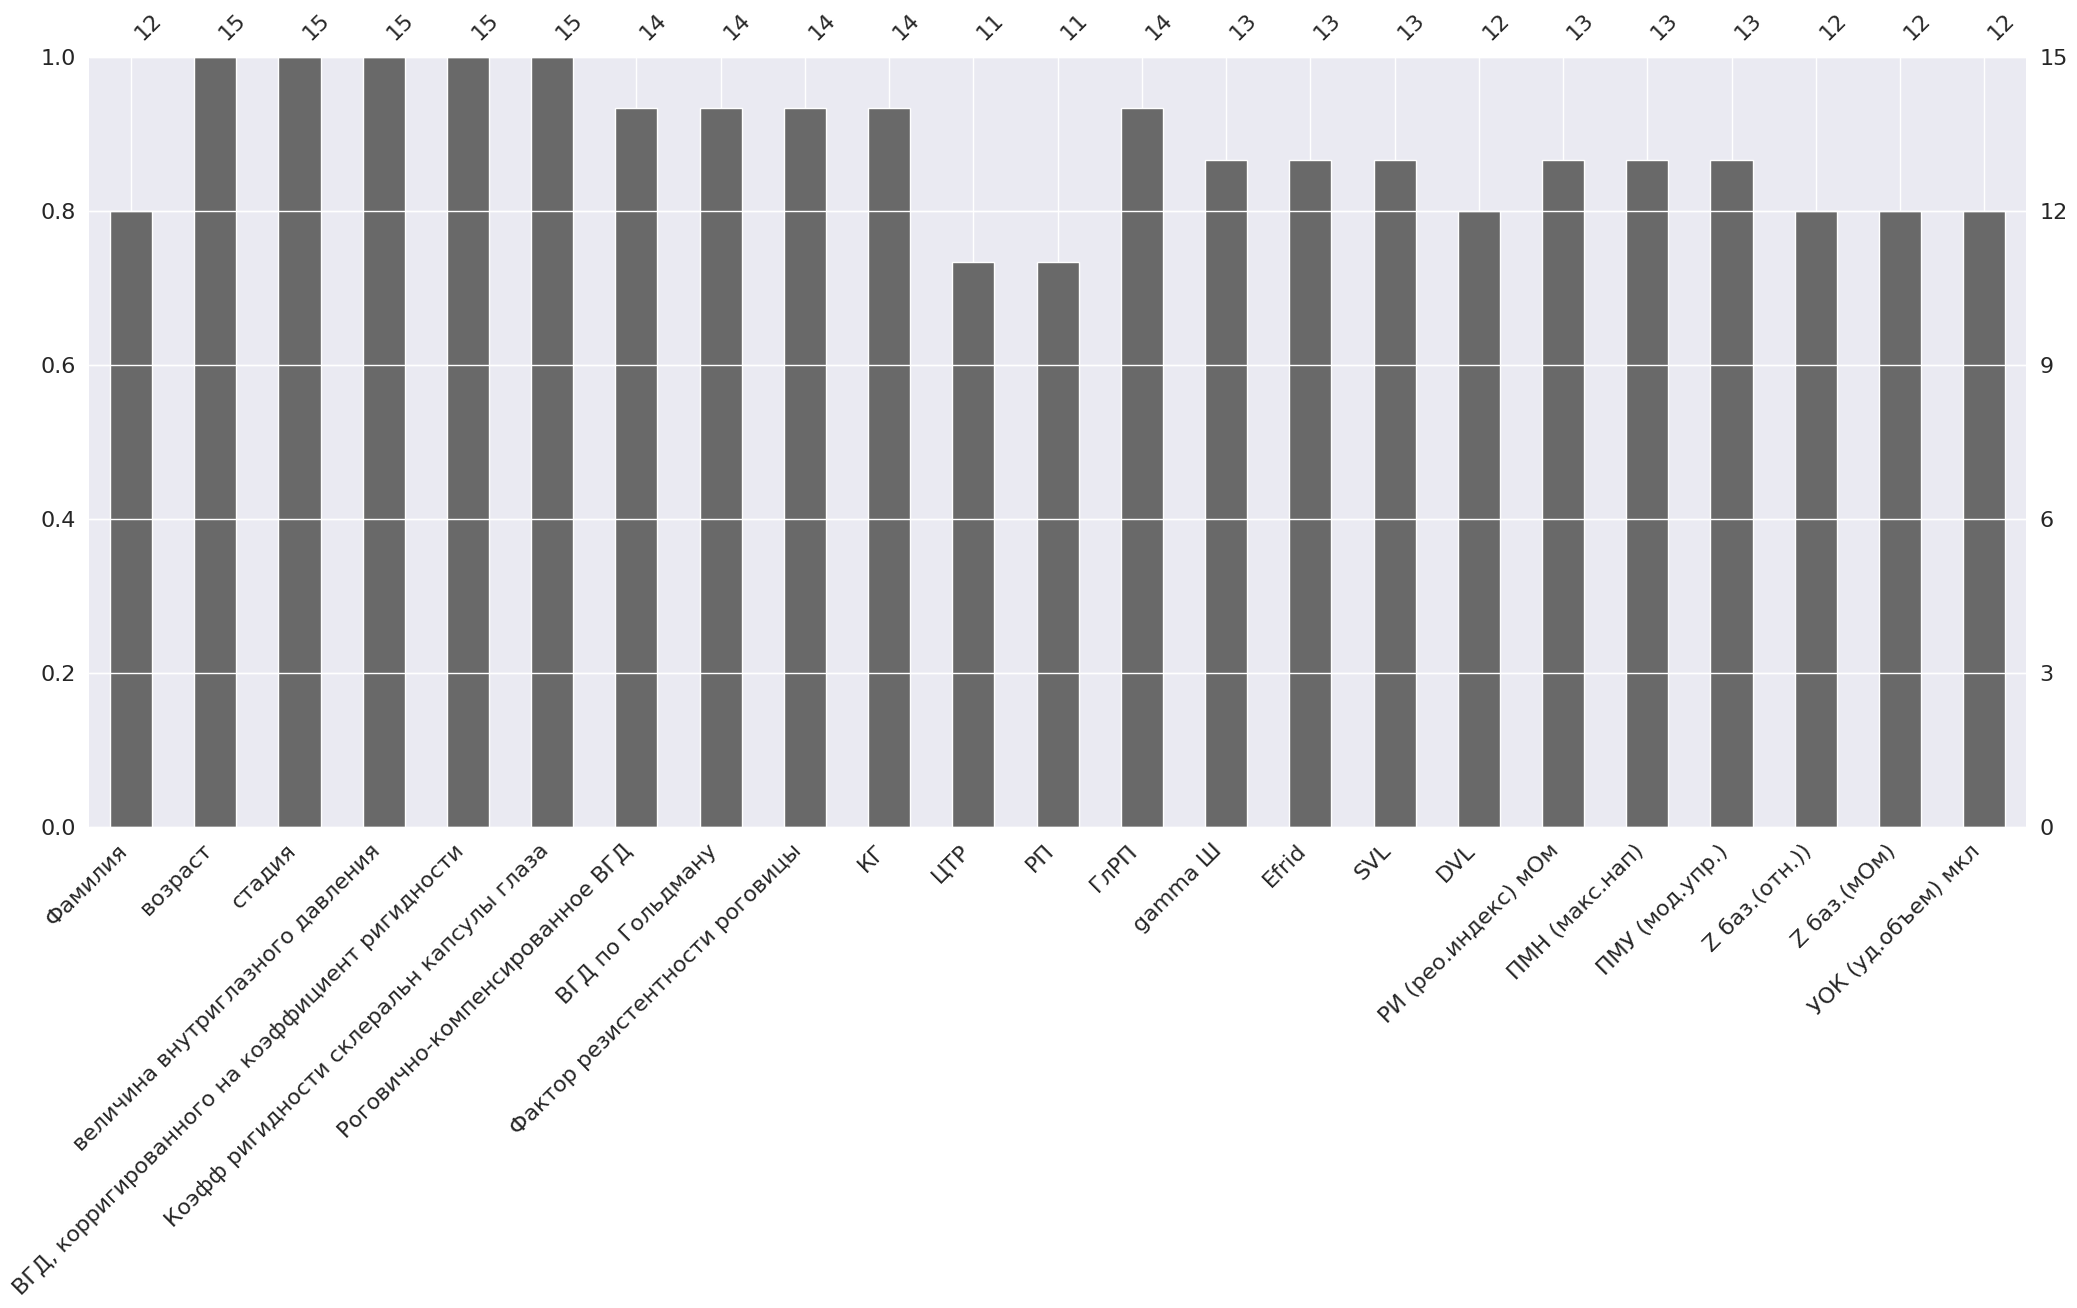

In [105]:
msno.bar(data_1_stage)

<Axes: >

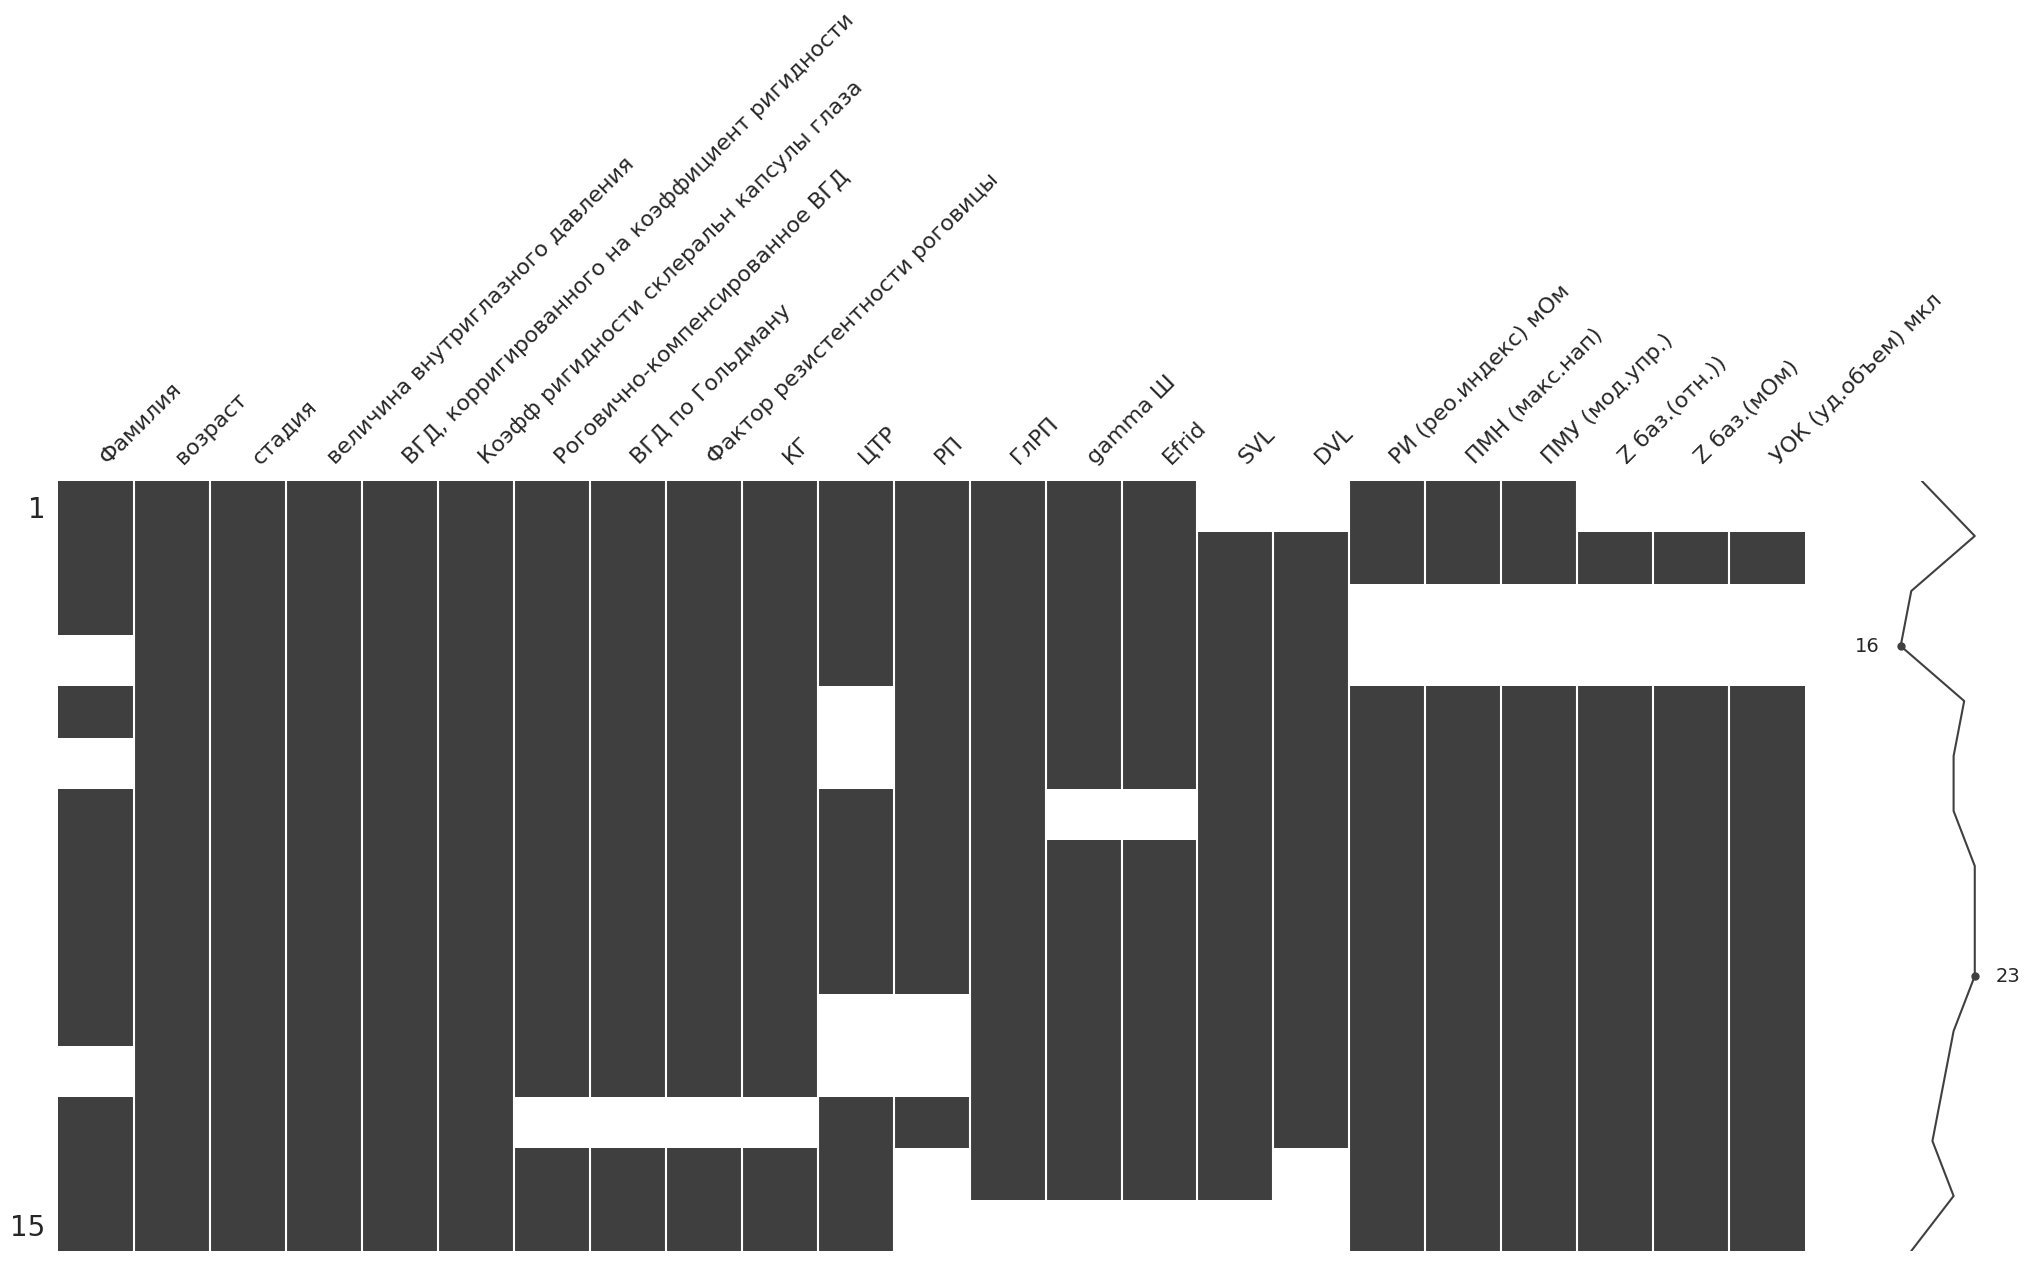

In [106]:
#матрица пропущенных значений
msno.matrix(data_1_stage)

Выяснили, что пропуски носят случайный характер. Приступаем к их заполнению.

Построим **матрицу корреляции пропущенных значений** (nullity correlation matrix).

In [107]:
tmp_df = data_1_stage.iloc[:, [i for i, n in enumerate(np.var(data_1_stage.isnull(), axis = 'rows')) if n > 0]]
tmp_df.isnull().corr()

Фамилия  Роговично-компенсированное ВГД  \
Фамилия                         1.000000                       -0.133631   
Роговично-компенсированное ВГД -0.133631                        1.000000   
ВГД по Гольдману               -0.133631                        1.000000   
Фактор резистентности роговицы -0.133631                        1.000000   
КГ                             -0.133631                        1.000000   
ЦТР                             0.452267                       -0.161165   
РП                              0.075378                       -0.161165   
ГлРП                           -0.133631                       -0.071429   
gamma Ш                        -0.196116                       -0.104828   
Efrid                          -0.196116                       -0.104828   
SVL                            -0.196116                       -0.104828   
DVL                            -0.250000                       -0.133631   
РИ (рео.индекс) мОм             0.294174                       -0.104828   
ПМН (макс.нап)                  0.294174                       -0.104828   
ПМУ (мод.упр.)                  0.294174                       -0.104828   
Z баз.(отн.))                   0.166667                       -0.133631   
Z баз.(мОм)                     0.166667                       -0.133631   
УОК (уд.объем) мкл              0.166667                       -0.133631   

                                ВГД по Гольдману  \
Фамилия                                -0.133631   
Роговично-компенсированное ВГД          1.000000   
ВГД по Гольдману                        1.000000   
Фактор резистентности роговицы          1.000000   
КГ                                      1.000000   
ЦТР                                    -0.161165   
РП                                     -0.161165   
ГлРП                                   -0.071429   
gamma Ш                                -0.104828   
Efrid                                  -0.104828   
SVL                                    -0.104828   
DVL                                    -0.133631   
РИ (рео.индекс) мОм                    -0.104828   
ПМН (макс.нап)                         -0.104828   
ПМУ (мод.упр.)                         -0.104828   
Z баз.(отн.))                          -0.133631   
Z баз.(мОм)                            -0.133631   
УОК (уд.объем) мкл                     -0.133631   

                                Фактор резистентности роговицы        КГ  \
Фамилия                                              -0.133631 -0.133631   
Роговично-компенсированное ВГД                        1.000000  1.000000   
ВГД по Гольдману                                      1.000000  1.000000   
Фактор резистентности роговицы                        1.000000  1.000000   
КГ                                                    1.000000  1.000000   
ЦТР                                                  -0.161165 -0.161165   
РП                                                   -0.161165 -0.161165   
ГлРП                                                 -0.071429 -0.071429   
gamma Ш                                              -0.104828 -0.104828   
Efrid                                                -0.104828 -0.104828   
SVL                                                  -0.104828 -0.104828   
DVL                                                  -0.133631 -0.133631   
РИ (рео.индекс) мОм                                  -0.104828 -0.104828   
ПМН (макс.нап)                                       -0.104828 -0.104828   
ПМУ (мод.упр.)                                       -0.104828 -0.104828   
Z баз.(отн.))                                        -0.133631 -0.133631   
Z баз.(мОм)                                          -0.133631 -0.133631   
УОК (уд.объем) мкл                                   -0.133631 -0.133631   

                                     ЦТР        РП      ГлРП   gamma Ш  \
Фамилия                         0.452267  0.075378 -0.133631 -0.196116   
Рогови

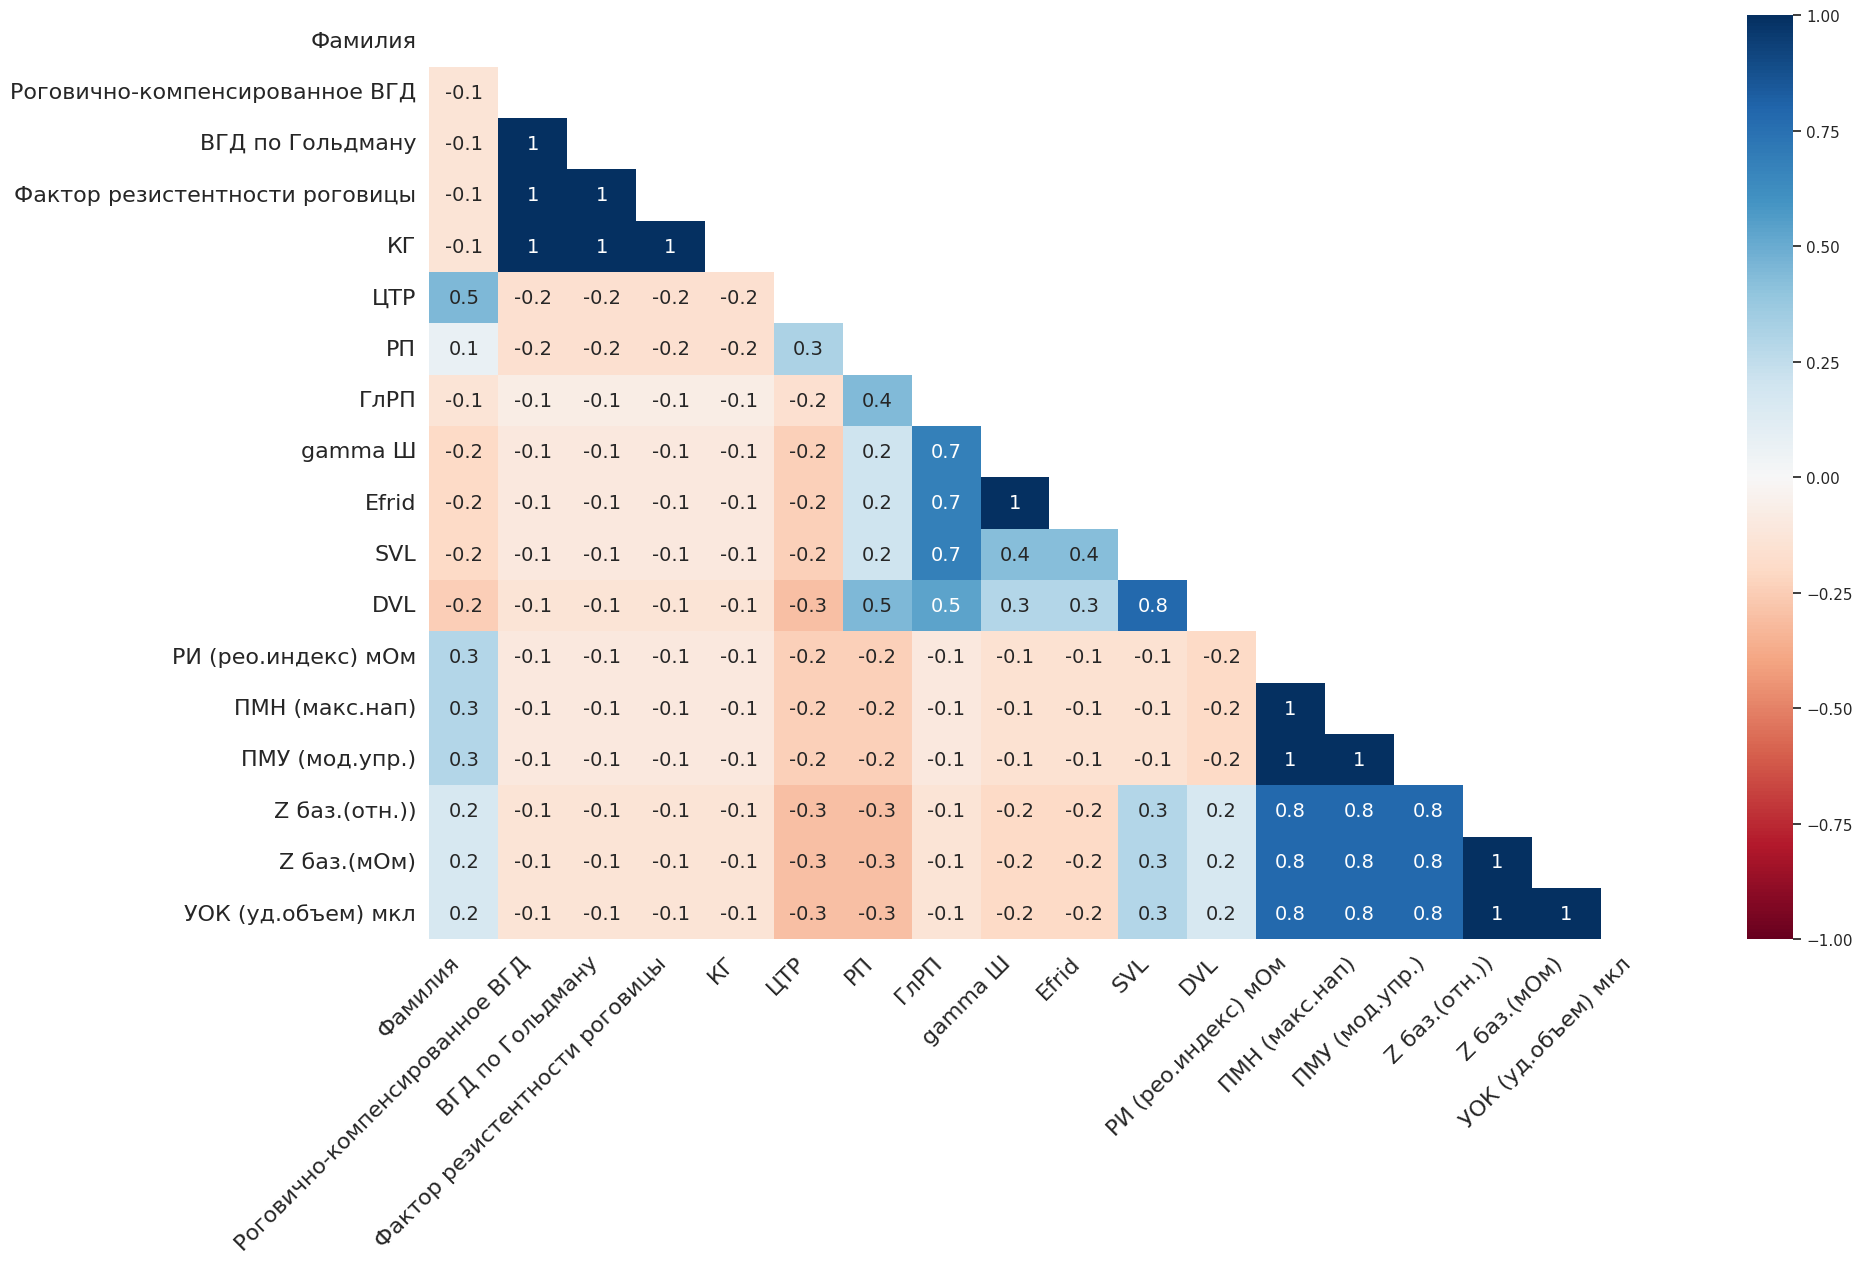

In [108]:
msno.heatmap(data_1_stage);

### Заполняем пропуски в категориальных признаках



---


Фамилия - категориальный признак. Заполним значением по умолчанию, например, "Иванов"

In [109]:
data_1_stage['Фамилия']=data_1_stage['Фамилия'].fillna('Иванов')
data_1_stage.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     1
ВГД по Гольдману                                   1
Фактор резистентности роговицы                     1
КГ                                                 1
ЦТР                                                4
РП                                                 4
ГлРП                                               1
gamma Ш                                            2
Efrid                                              2
SVL                                                2
DVL                                                3
РИ (рео.индекс) мОм                                2
ПМН (макс.нап)                                

### Заполняем пропуски в количественных признаках



---

Остальные пропущенные значения принадлежат количественным признакам.

Можно заменить медианой.

In [110]:
# скопируем датафрейм
median_imputer = data_1_stage.copy()

In [111]:
#Посмотрим на среднее арифметическое и медиану.
print('Роговично-компенсированное ВГД - ', median_imputer['Роговично-компенсированное ВГД'].mean().round(1), '  ', median_imputer['Роговично-компенсированное ВГД'].median())
print('ВГД по Гольдману - ', median_imputer['ВГД по Гольдману'].mean().round(1), '  ', median_imputer['ВГД по Гольдману'].median())
print('Фактор резистентности роговицы - ', median_imputer['Фактор резистентности роговицы'].mean().round(1), '  ', median_imputer['Фактор резистентности роговицы'].median())
print('КГ - ', median_imputer['КГ'].mean().round(1), '  ', median_imputer['КГ'].median())
print('ЦТР - ', median_imputer['ЦТР'].mean().round(1), '  ', median_imputer['ЦТР'].median())
print('РП - ', median_imputer['РП'].mean().round(1), '  ', median_imputer['РП'].median())
print('ГлРП - ', median_imputer['ГлРП'].mean().round(1), '  ', median_imputer['ГлРП'].median())
print('gamma Ш - ', median_imputer['gamma Ш'].mean().round(1), '  ', median_imputer['gamma Ш'].median())
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())



Роговично-компенсированное ВГД -  19.0    19.35
ВГД по Гольдману -  17.7    17.15
Фактор резистентности роговицы -  10.2    9.95
КГ -  9.4    9.3
ЦТР -  550.8    562.0
РП -  205.5    205.0
ГлРП -  432.6    437.5
gamma Ш -  1.5    1.8
Efrid -  0.0    0.0147
SVL -  50.2    50.5
DVL -  41.6    42.04
РИ (рео.индекс) мОм -  53.1    58.89
ПМН (макс.нап) -  0.2    0.23
ПМУ (мод.упр.) -  0.3    0.26
Z баз.(отн.)) -  922.3    956.0
Z баз.(мОм) -  36.9    38.24
УОК (уд.объем) мкл -  1.5    1.3537174676972055


In [112]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['Роговично-компенсированное ВГД'] = imp_median.fit_transform(median_imputer[['Роговично-компенсированное ВГД']])
median_imputer['ВГД по Гольдману'] = imp_median.fit_transform(median_imputer[['ВГД по Гольдману']])
median_imputer['Фактор резистентности роговицы'] = imp_median.fit_transform(median_imputer[['Фактор резистентности роговицы']])
median_imputer['КГ'] = imp_median.fit_transform(median_imputer[['КГ']])
median_imputer['ЦТР'] = imp_median.fit_transform(median_imputer[['ЦТР']])
median_imputer['РП'] = imp_median.fit_transform(median_imputer[['РП']])
median_imputer['ГлРП'] = imp_median.fit_transform(median_imputer[['ГлРП']])
median_imputer['gamma Ш'] = imp_median.fit_transform(median_imputer[['gamma Ш']])
median_imputer['Efrid'] = imp_median.fit_transform(median_imputer[['Efrid']])
median_imputer['SVL'] = imp_median.fit_transform(median_imputer[['SVL']])
median_imputer['DVL'] = imp_median.fit_transform(median_imputer[['DVL']])
median_imputer['РИ (рео.индекс) мОм'] = imp_median.fit_transform(median_imputer[['РИ (рео.индекс) мОм']])
median_imputer['ПМН (макс.нап)'] = imp_median.fit_transform(median_imputer[['ПМН (макс.нап)']])
median_imputer['ПМУ (мод.упр.)'] = imp_median.fit_transform(median_imputer[['ПМУ (мод.упр.)']])
median_imputer['Z баз.(отн.))'] = imp_median.fit_transform(median_imputer[['Z баз.(отн.))']])
median_imputer['Z баз.(мОм)'] = imp_median.fit_transform(median_imputer[['Z баз.(мОм)']])
median_imputer['УОК (уд.объем) мкл'] = imp_median.fit_transform(median_imputer[['УОК (уд.объем) мкл']])

# убедимся, что пропущенных значений не осталось
median_imputer['УОК (уд.объем) мкл'].isna().sum()

0

In [113]:
# посмотрим на метрики после заполнения медианой
print('Роговично-компенсированное ВГД - ', median_imputer['Роговично-компенсированное ВГД'].mean().round(1), '  ', median_imputer['Роговично-компенсированное ВГД'].median())
print('ВГД по Гольдману - ', median_imputer['ВГД по Гольдману'].mean().round(1), '  ', median_imputer['ВГД по Гольдману'].median())
print('Фактор резистентности роговицы - ', median_imputer['Фактор резистентности роговицы'].mean().round(1), '  ', median_imputer['Фактор резистентности роговицы'].median())
print('КГ - ', median_imputer['КГ'].mean().round(1), '  ', median_imputer['КГ'].median())
print('ЦТР - ', median_imputer['ЦТР'].mean().round(1), '  ', median_imputer['ЦТР'].median())
print('РП - ', median_imputer['РП'].mean().round(1), '  ', median_imputer['РП'].median())
print('ГлРП - ', median_imputer['ГлРП'].mean().round(1), '  ', median_imputer['ГлРП'].median())
print('gamma Ш - ', median_imputer['gamma Ш'].mean().round(1), '  ', median_imputer['gamma Ш'].median())
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())



Роговично-компенсированное ВГД -  19.0    19.35
ВГД по Гольдману -  17.7    17.15
Фактор резистентности роговицы -  10.2    9.95
КГ -  9.4    9.3
ЦТР -  553.8    562.0
РП -  205.3    205.0
ГлРП -  432.9    437.5
gamma Ш -  1.6    1.8
Efrid -  0.0    0.0147
SVL -  50.3    50.5
DVL -  41.7    42.04
РИ (рео.индекс) мОм -  53.9    58.89
ПМН (макс.нап) -  0.2    0.23
ПМУ (мод.упр.) -  0.3    0.26
Z баз.(отн.)) -  929.1    956.0
Z баз.(мОм) -  37.2    38.24
УОК (уд.объем) мкл -  1.5    1.3537174676972055


Проверяем, что заполнили все пропуски.

In [114]:
median_imputer.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     0
ВГД по Гольдману                                   0
Фактор резистентности роговицы                     0
КГ                                                 0
ЦТР                                                0
РП                                                 0
ГлРП                                               0
gamma Ш                                            0
Efrid                                              0
SVL                                                0
DVL                                                0
РИ (рео.индекс) мОм                                0
ПМН (макс.нап)                                

### Сравниваем взаимосвязь признаков до и после заполнения пропусков

In [115]:
corr_matrix_before=data_1_stage.iloc [:, 1:11].corr().round(3)

<Axes: >

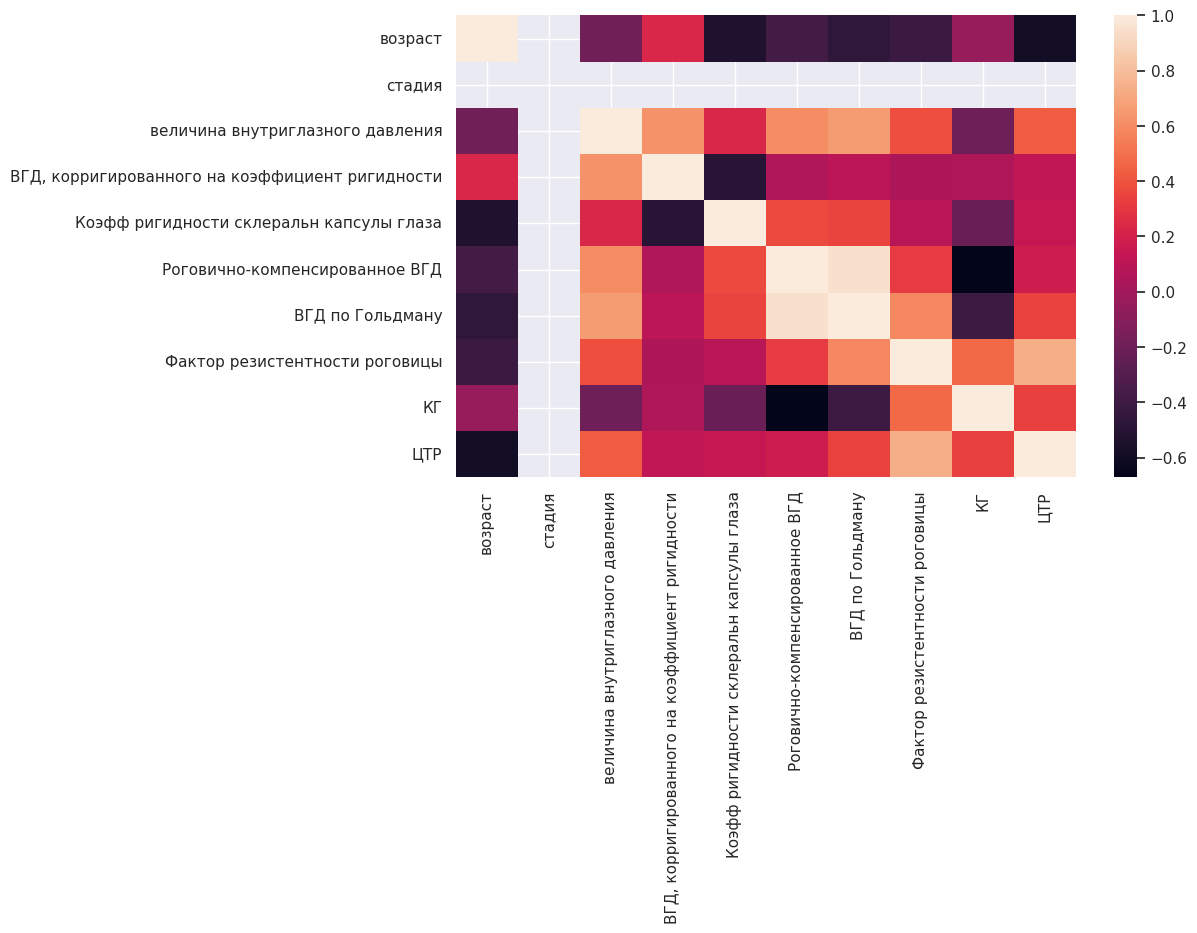

In [116]:
sns.heatmap(corr_matrix_before)

In [117]:
corr_matrix_after=median_imputer.iloc [:, 1:11].corr().round(3)

<Axes: >

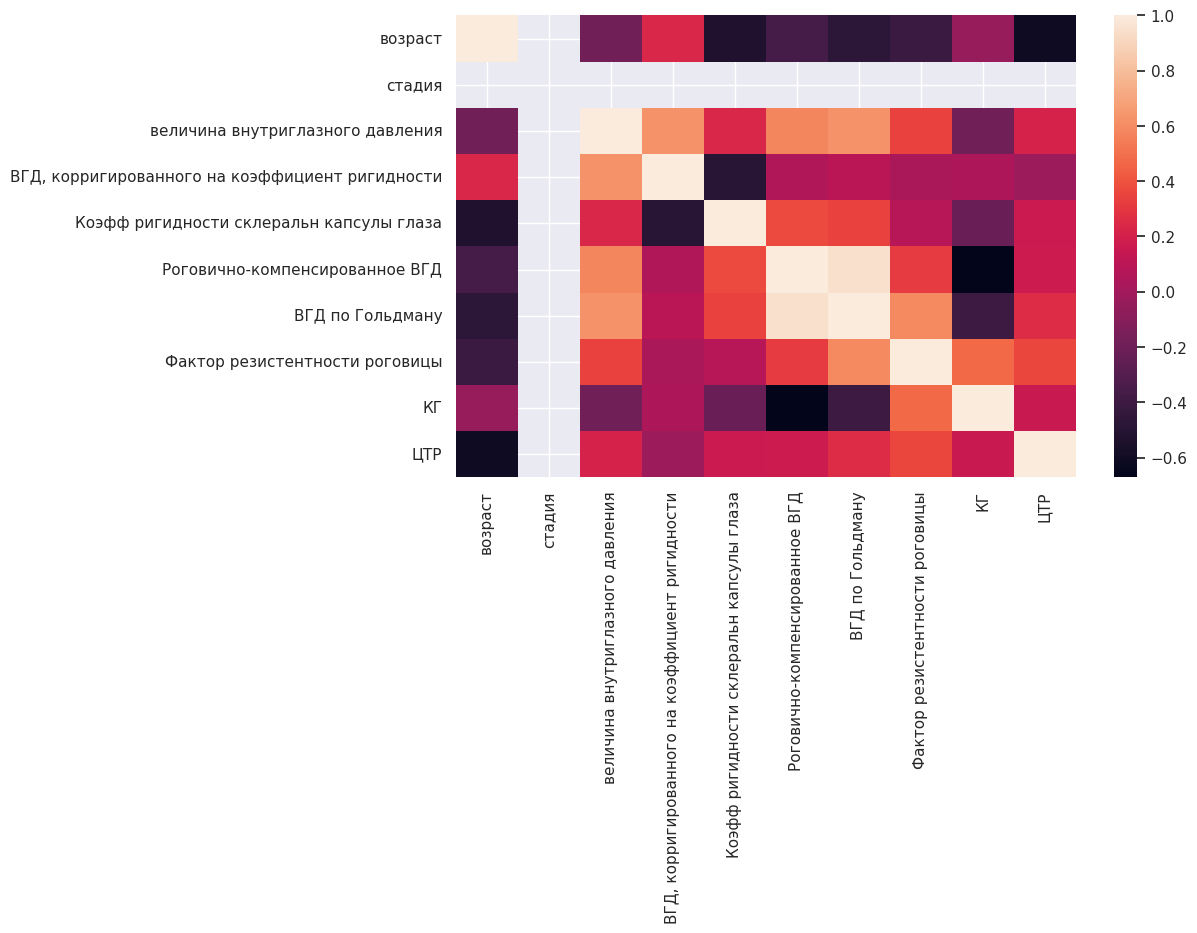

In [118]:
sns.heatmap(corr_matrix_after)

In [119]:
changes_in_corr=corr_matrix_before-corr_matrix_after

In [120]:
changes_in_corr

возраст  стадия  \
возраст                                            0.000     NaN   
стадия                                               NaN     NaN   
величина внутриглазного давления                   0.000     NaN   
ВГД, корригированного на коэффициент ригидности    0.000     NaN   
Коэфф ригидности склеральн капсулы глаза           0.000     NaN   
Роговично-компенсированное ВГД                    -0.001     NaN   
ВГД по Гольдману                                   0.001     NaN   
Фактор резистентности роговицы                     0.002     NaN   
КГ                                                 0.001     NaN   
ЦТР                                                0.020     NaN   

                                                 величина внутриглазного давления  \
возраст                                                                     0.000   
стадия                                                                        NaN   
величина внутриглазного давления                                            0.000   
ВГД, корригированного на коэффициент ригидности                             0.000   
Коэфф ригидности склеральн капсулы глаза                                    0.000   
Роговично-компенсированное ВГД                                              0.020   
ВГД по Гольдману                                                            0.041   
Фактор резистентности роговицы                                              0.034   
КГ                                                                         -0.005   
ЦТР                                                                         0.217   

                                                 ВГД, корригированного на коэффициент ригидности  \
возраст                                                                                    0.000   
стадия                                                                                       NaN   
величина внутриглазного давления                                                           0.000   
ВГД, корригированного на коэффициент ригидности                                            0.000   
Коэфф ригидности склеральн капсулы глаза                                                   0.000   
Роговично-компенсированное ВГД                                                            -0.003   
ВГД по Гольдману                                                                           0.007   
Фактор резистентности роговицы                                                             0.009   
КГ                                                                                         0.003   
ЦТР                                                                                        0.146   

                                                 Коэфф ригидности склеральн капсулы глаза  \
возраст                                                                             0.000   
стадия                                                                                NaN   
величина внутриглазного давления                                                    0.000   
ВГД, корригированного на коэффициент ригидности                                     0.000   
Коэфф ригидности склеральн капсулы глаза                                            0.000   
Роговично-компенсированное ВГД                                                      0.000   
ВГД по Гольдману                                                                    0.005   
Фактор резистентности роговицы                                                      0.005   
КГ                                                                                  0.000   
ЦТР                                                                                -0.019   

                                                 Роговично-компенсированное ВГД  \
возраст                                                                  -0.001   
стадия                                                                   

<Axes: >

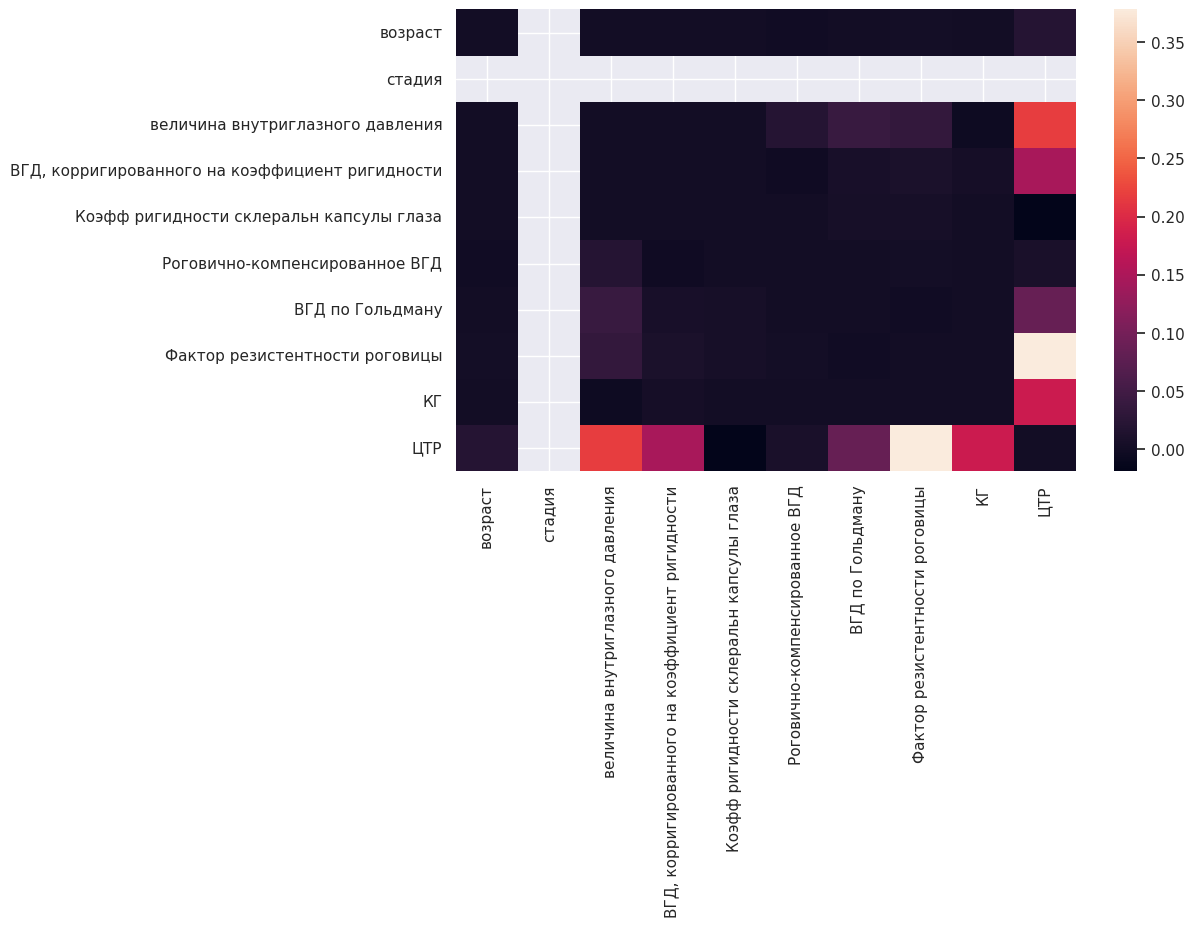

In [121]:
sns.heatmap(changes_in_corr)

In [122]:
data_1_stage=median_imputer

## Работа с пропущенными значениями в таблице с пациентами **2 стадии заболевания**

In [123]:
data_2_stage

Фамилия  возраст  стадия  величина внутриглазного давления  \
0       горнева       84       2                                13   
1           NaN       64       2                                19   
2       близнюк       70       2                                11   
3           NaN       68       2                                11   
4        митина       80       2                                17   
5       якубова       71       2                                15   
6    емельянова       77       2                                16   
7       Мациева       68       2                                17   
8        Попова       80       2                                14   
9           NaN       72       2                                18   
10     Зайченко       76       2                                12   
11          NaN       77       2                                15   
12  Шапошникова       82       2                                13   
13          NaN       82       2                                12   
14     Вакалова       80       2                                14   

    ВГД, корригированного на коэффициент ригидности  \
0                                                17   
1                                                24   
2                                                11   
3                                                12   
4                                                21   
5                                                20   
6                                                17   
7                                                12   
8                                                14   
9                                                25   
10                                               17   
11                                               16   
12                                               12   
13                                               13   
14                                               12   

    Коэфф ригидности склеральн капсулы глаза  Роговично-компенсированное ВГД  \
0                                     0.0132                            16.2   
1                                     0.0127                            15.7   
2                                     0.0214                            19.8   
3                                     0.0190                            17.1   
4                                     0.0146                            23.5   
5                                     0.0133                            26.5   
6                                     0.0199                            20.2   
7                                     0.0325                            22.6   
8                                     0.0204                            24.3   
9                                     0.0092                            20.7   
10                                    0.0132                            15.4   
11                                    0.0196                            17.7   
12                                    0.0218                            19.7   
13                                    0.0193                            16.2   
14                                    0.0240                            19.0   

    ВГД по Гольдману  Фактор резистентности роговицы    КГ  ...  gamma Ш  \
0               14.1                             8.8   9.0  ...     1.65   
1               15.7                            10.0  10.0  ...     1.65   
2               18.0                             9.9   8.9  ...     2.40   
3               14.0                             8.1   8.2  ...     0.70   
4               21.0                             9.9   7.9  ...     1.75   
5               25.7                            12.1   8.8  ...     1.70   
6               18.0                             9.6   8.6  ...     2.00   
7               19.4                             9.0   7.4  ...     2.30   
8               19.9                     

In [124]:
#посмотрим сколько пропущенных значений в данных
data_2_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Фамилия                                          10 non-null     object 
 1   возраст                                          15 non-null     int64  
 2   стадия                                           15 non-null     int64  
 3   величина внутриглазного давления                 15 non-null     int64  
 4   ВГД, корригированного на коэффициент ригидности  15 non-null     int64  
 5   Коэфф ригидности склеральн капсулы глаза         15 non-null     float64
 6   Роговично-компенсированное ВГД                   15 non-null     float64
 7   ВГД по Гольдману                                 15 non-null     float64
 8   Фактор резистентности роговицы                   15 non-null     float64
 9   КГ                                

In [125]:
data_2_stage.isnull().sum()

Фамилия                                            5
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     0
ВГД по Гольдману                                   0
Фактор резистентности роговицы                     0
КГ                                                 0
ЦТР                                                0
РП                                                 6
ГлРП                                               5
gamma Ш                                            6
Efrid                                              5
SVL                                                8
DVL                                                9
РИ (рео.индекс) мОм                                3
ПМН (макс.нап)                                

Рассчитаем процент пропусков

In [126]:
(data_2_stage.isna().sum() / len(data_2_stage)).round(4) * 100

Фамилия                                            33.33
возраст                                             0.00
стадия                                              0.00
величина внутриглазного давления                    0.00
ВГД, корригированного на коэффициент ригидности     0.00
Коэфф ригидности склеральн капсулы глаза            0.00
Роговично-компенсированное ВГД                      0.00
ВГД по Гольдману                                    0.00
Фактор резистентности роговицы                      0.00
КГ                                                  0.00
ЦТР                                                 0.00
РП                                                 40.00
ГлРП                                               33.33
gamma Ш                                            40.00
Efrid                                              33.33
SVL                                                53.33
DVL                                                60.00
РИ (рео.индекс) мОм            

Вывод: пропуски есть по 13 признакам из 23, процент пропущенных данных в основном около 20%. На основе этого становится понятно, что удалять данные с пропущенными значениями - неподходящий способ в данной ситуации.

<Axes: >

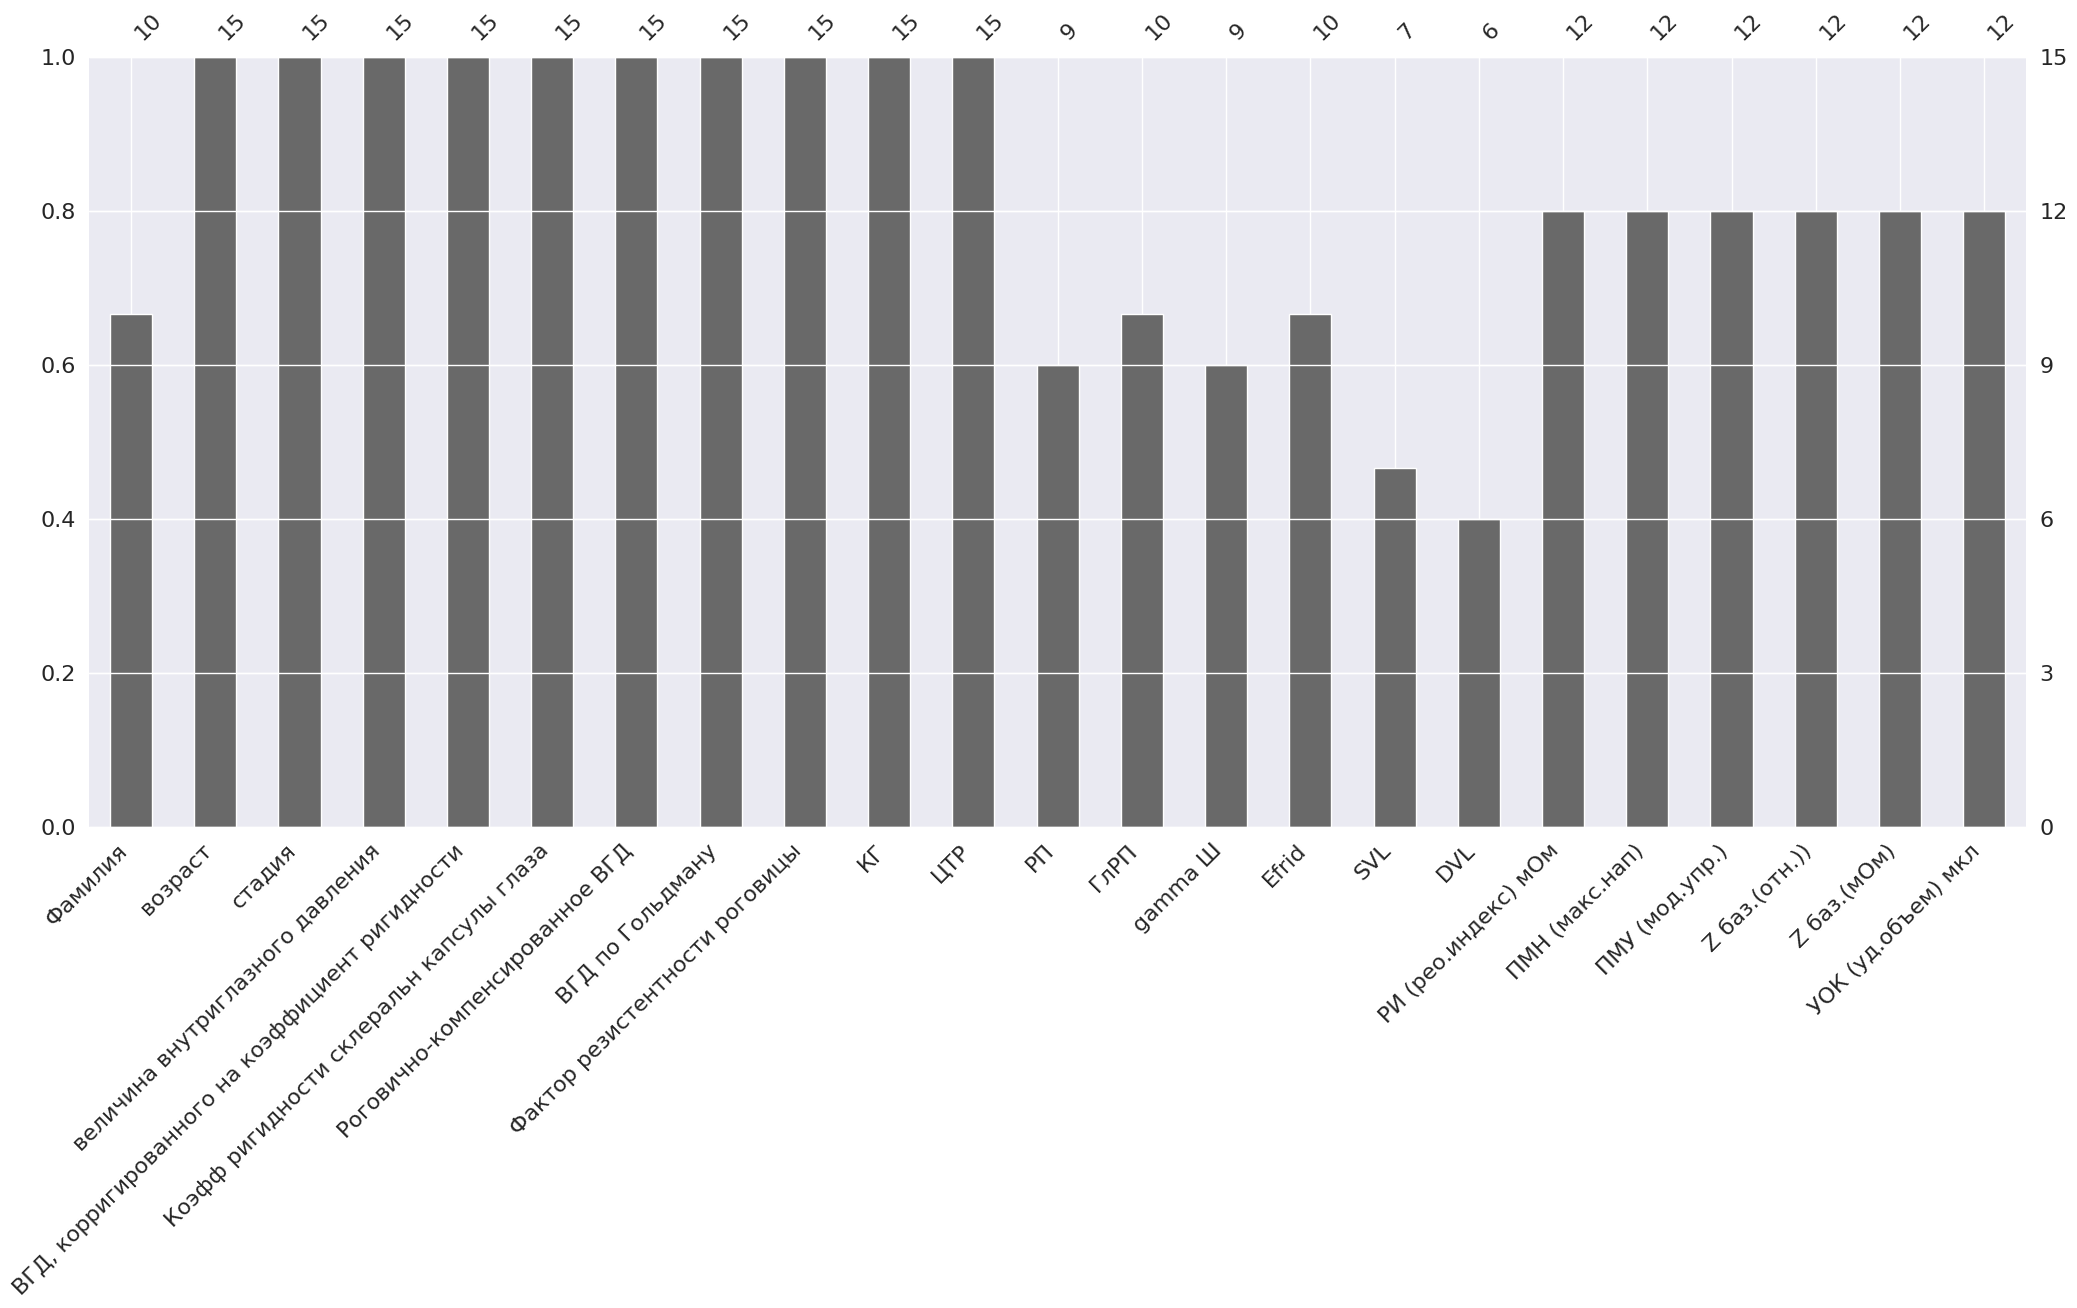

In [127]:
msno.bar(data_2_stage)

<Axes: >

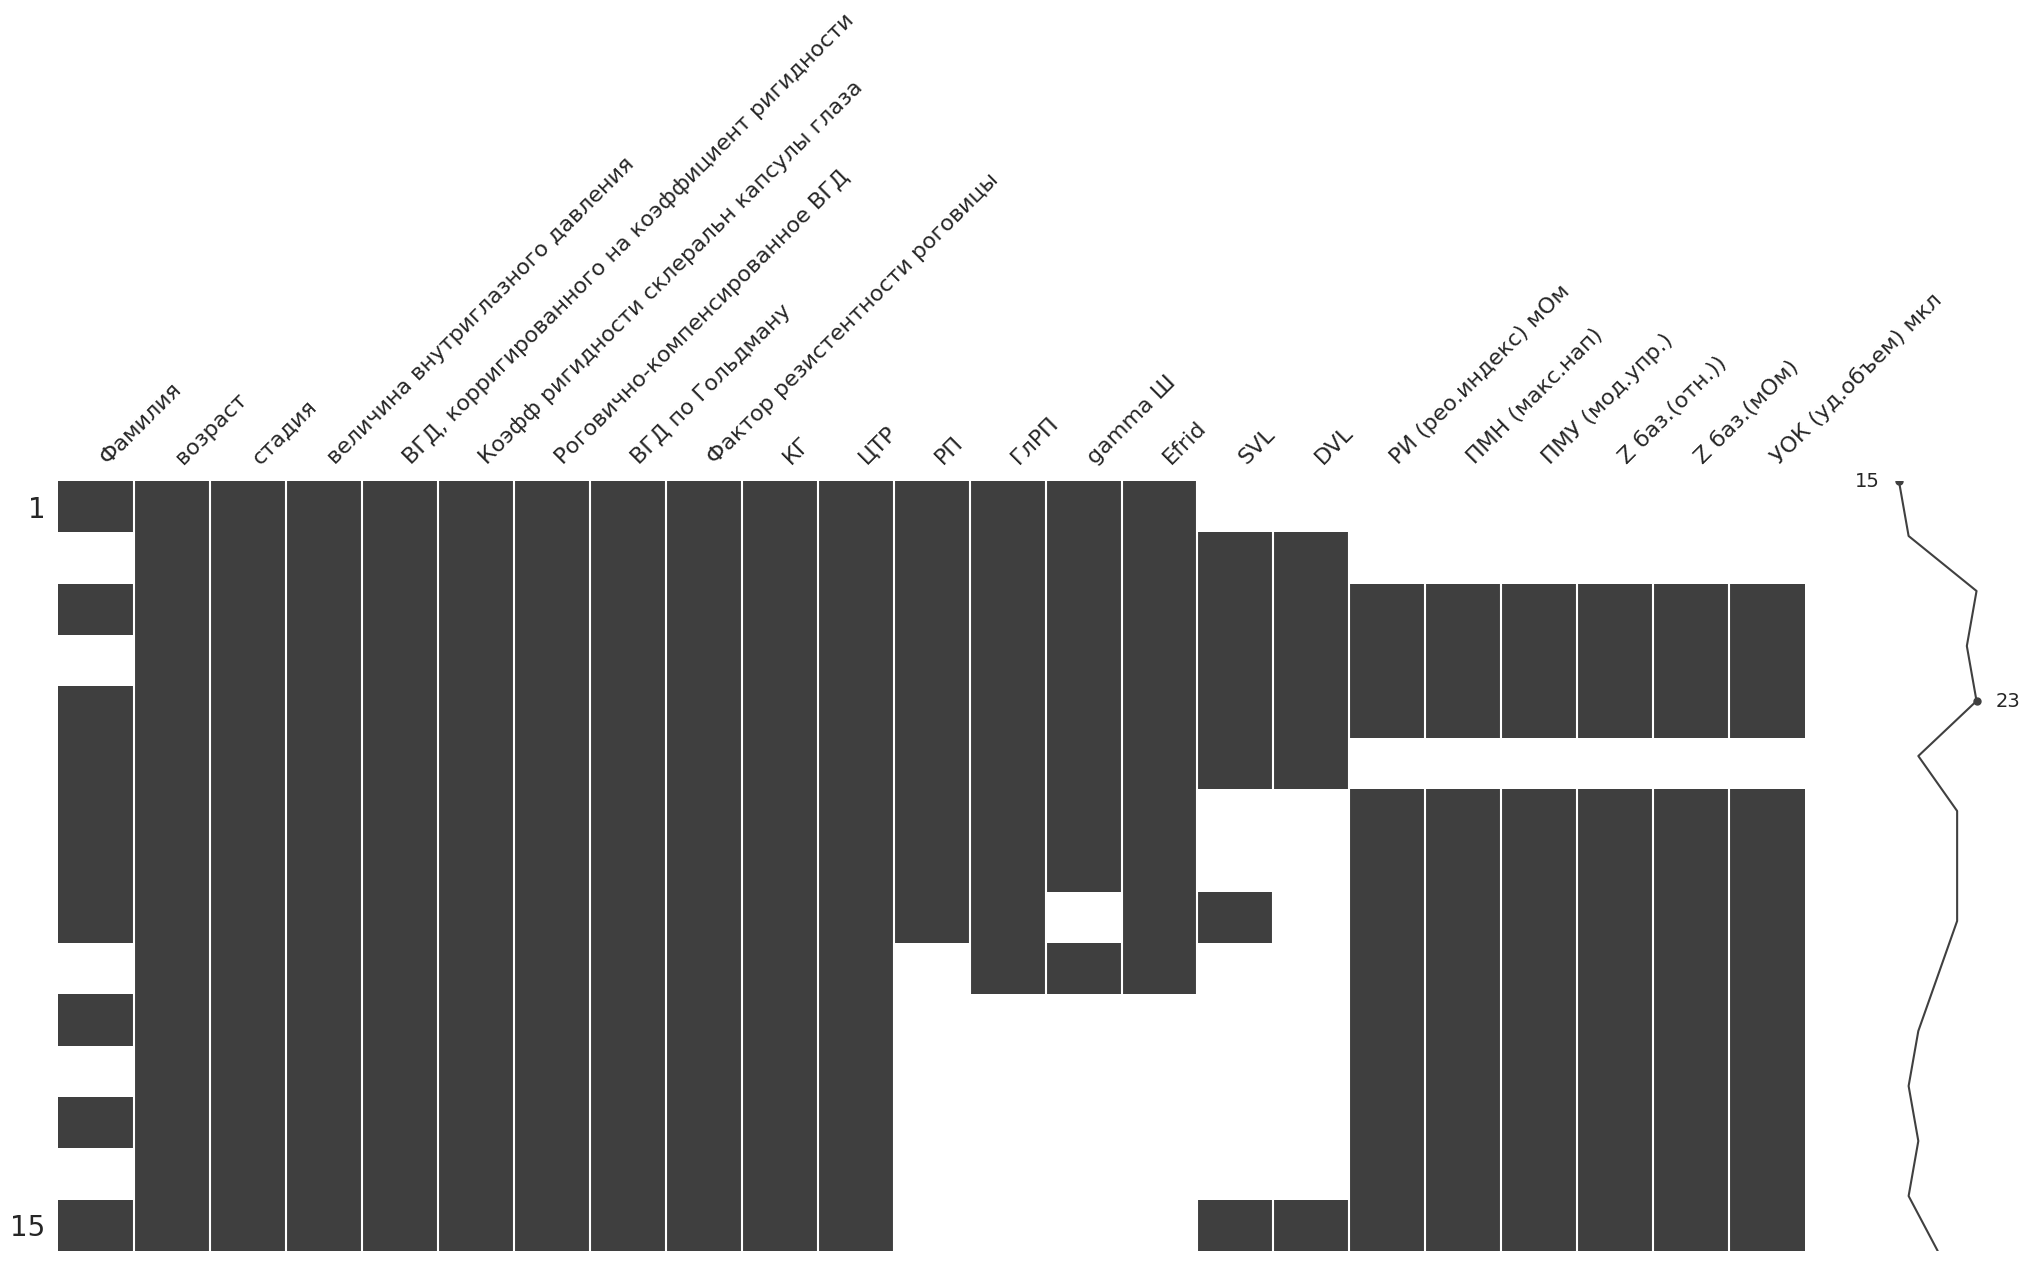

In [128]:
#матрица пропущенных значений
msno.matrix(data_2_stage)

Выяснили, что пропуски носят случайный характер. Приступаем к их заполнению.

Построим **матрицу корреляции пропущенных значений** (nullity correlation matrix).

In [129]:
tmp_df = data_2_stage.iloc[:, [i for i, n in enumerate(np.var(data_2_stage.isnull(), axis = 'rows')) if n > 0]]
tmp_df.isnull().corr()

Фамилия        РП      ГлРП       gamma Ш     Efrid  \
Фамилия              1.000000e+00  0.288675  0.100000 -5.608641e-17  0.100000   
РП                   2.886751e-01  1.000000  0.866025  7.222222e-01  0.866025   
ГлРП                 1.000000e-01  0.866025  1.000000  8.660254e-01  1.000000   
gamma Ш             -5.608641e-17  0.722222  0.866025  1.000000e+00  0.866025   
Efrid                1.000000e-01  0.866025  1.000000  8.660254e-01  1.000000   
SVL                  9.449112e-02  0.490990  0.377964  2.182179e-01  0.377964   
DVL                 -8.012345e-17  0.388889  0.288675  3.888889e-01  0.288675   
РИ (рео.индекс) мОм  7.850462e-17 -0.408248 -0.353553 -4.082483e-01 -0.353553   
ПМН (макс.нап)       7.850462e-17 -0.408248 -0.353553 -4.082483e-01 -0.353553   
ПМУ (мод.упр.)       7.850462e-17 -0.408248 -0.353553 -4.082483e-01 -0.353553   
Z баз.(отн.))        7.850462e-17 -0.408248 -0.353553 -4.082483e-01 -0.353553   
Z баз.(мОм)          7.850462e-17 -0.408248 -0.353553 -4.082483e-01 -0.353553   
УОК (уд.объем) мкл   7.850462e-17 -0.408248 -0.353553 -4.082483e-01 -0.353553   

                          SVL           DVL  РИ (рео.индекс) мОм  \
Фамилия              0.094491 -8.012345e-17         7.850462e-17   
РП                   0.490990  3.888889e-01        -4.082483e-01   
ГлРП                 0.377964  2.886751e-01        -3.535534e-01   
gamma Ш              0.218218  3.888889e-01        -4.082483e-01   
Efrid                0.377964  2.886751e-01        -3.535534e-01   
SVL                  1.000000  8.728716e-01        -2.004459e-01   
DVL                  0.872872  1.000000e+00        -2.721655e-01   
РИ (рео.индекс) мОм -0.200446 -2.721655e-01         1.000000e+00   
ПМН (макс.нап)      -0.200446 -2.721655e-01         1.000000e+00   
ПМУ (мод.упр.)      -0.200446 -2.721655e-01         1.000000e+00   
Z баз.(отн.))       -0.200446 -2.721655e-01         1.000000e+00   
Z баз.(мОм)         -0.200446 -2.721655e-01         1.000000e+00   
УОК (уд.объем) мкл  -0.200446 -2.721655e-01         1.000000e+00   

                     ПМН (макс.нап)  ПМУ (мод.упр.)  Z баз.(отн.))  \
Фамилия                7.850462e-17    7.850462e-17   7.850462e-17   
РП                    -4.082483e-01   -4.082483e-01  -4.082483e-01   
ГлРП                  -3.535534e-01   -3.535534e-01  -3.535534e-01   
gamma Ш               -4.082483e-01   -4.082483e-01  -4.082483e-01   
Efrid                 -3.535534e-01   -3.535534e-01  -3.535534e-01   
SVL                   -2.004459e-01   -2.004459e-01  -2.004459e-01   
DVL                   -2.721655e-01   -2.721655e-01  -2.721655e-01   
РИ (рео.индекс) мОм    1.000000e+00    1.000000e+00   1.000000e+00   
ПМН (макс.нап)         1.000000e+00    1.000000e+00   1.000000e+00   
ПМУ (мод.упр.)         1.000000e+00    1.000000e+00   1.000000e+00   
Z баз.(отн.))          1.000000e+00    1.000000e+00   1.000000e+00   
Z баз.(мОм)            1.000000e+00    1.000000e+00   1.000000e+00   
УОК (уд.объем) мкл     1.000000e+00    1.000000e+00   1.000000e+00   

                      Z баз.(мОм)  УОК (уд.объем) мкл  
Фамилия              7.850462e-17        7.850462e-17  
РП                  -4.082483e-01       -4.082483e-01  
ГлРП                -3.535534e-01       -3.535534e-01  
gamma Ш             -4.082483e-01       -4.082483e-01  
Efrid               -3.535534e-01       -3.535534e-01  
SVL                 -2.004459e-01       -2.004459e-01  
DVL                 -2.721655e-01       -2.721655e-01  
РИ (рео.индекс) мОм  1.000000e+00        1.000000e+00  
ПМН (макс.нап)       1.000000e+00        1.000000e+00  
ПМУ (мод.упр.)       1.000000e+00        1.000000e+00  
Z баз.(отн.))        1.000000e+00        1.000000e+00  
Z баз.(мОм)          1.000000e+00        1.000000e+00  
УОК (уд.объем) мкл   1.000000e+00        1.000000e+00

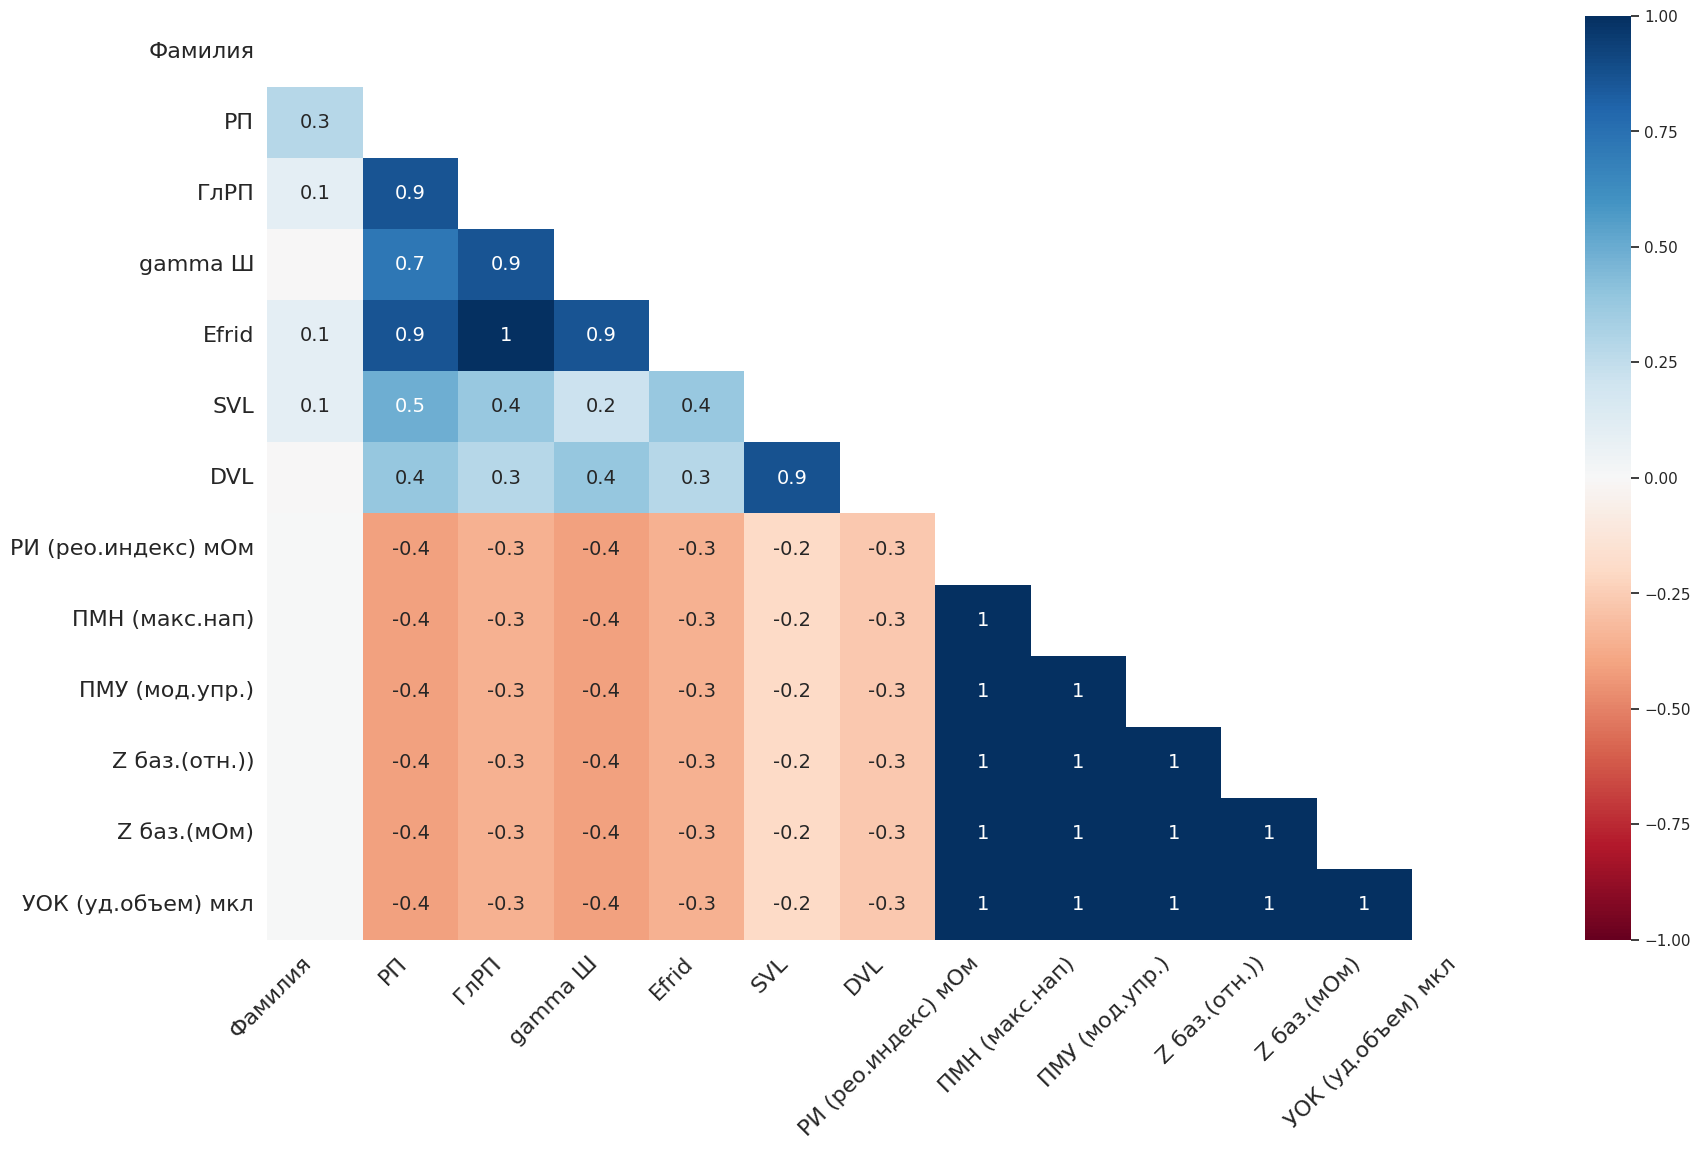

In [130]:
msno.heatmap(data_2_stage);

### Заполняем пропуски в категориальных признаках



---


Фамилия - категориальный признак. Заполним значением по умолчанию, например, "Иванов"

In [131]:
data_2_stage['Фамилия']=data_2_stage['Фамилия'].fillna('Иванов')
data_2_stage.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     0
ВГД по Гольдману                                   0
Фактор резистентности роговицы                     0
КГ                                                 0
ЦТР                                                0
РП                                                 6
ГлРП                                               5
gamma Ш                                            6
Efrid                                              5
SVL                                                8
DVL                                                9
РИ (рео.индекс) мОм                                3
ПМН (макс.нап)                                

### Заполняем пропуски в количественных признаках



---

Остальные пропущенные значения принадлежат количественным признакам.

Можно заменить медианой.

In [132]:
# скопируем датафрейм
median_imputer = data_2_stage.copy()

In [133]:
#Посмотрим на среднее арифметическое и медиану.
print('РП - ', median_imputer['РП'].mean().round(1), '  ', median_imputer['РП'].median())
print('ГлРП - ', median_imputer['ГлРП'].mean().round(1), '  ', median_imputer['ГлРП'].median())
print('gamma Ш - ', median_imputer['gamma Ш'].mean().round(1), '  ', median_imputer['gamma Ш'].median())
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())



РП -  201.9    195.0
ГлРП -  449.2    443.0
gamma Ш -  1.7    1.7
Efrid -  0.0    0.0168
SVL -  45.4    47.36
DVL -  37.3    36.519999999999996
РИ (рео.индекс) мОм -  42.4    38.285
ПМН (макс.нап) -  0.3    0.26
ПМУ (мод.упр.) -  0.3    0.275
Z баз.(отн.)) -  820.4    894.0
Z баз.(мОм) -  32.8    35.76
УОК (уд.объем) мкл -  1.4    1.017857176278794


In [134]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['РП'] = imp_median.fit_transform(median_imputer[['РП']])
median_imputer['ГлРП'] = imp_median.fit_transform(median_imputer[['ГлРП']])
median_imputer['gamma Ш'] = imp_median.fit_transform(median_imputer[['gamma Ш']])
median_imputer['Efrid'] = imp_median.fit_transform(median_imputer[['Efrid']])
median_imputer['SVL'] = imp_median.fit_transform(median_imputer[['SVL']])
median_imputer['DVL'] = imp_median.fit_transform(median_imputer[['DVL']])
median_imputer['РИ (рео.индекс) мОм'] = imp_median.fit_transform(median_imputer[['РИ (рео.индекс) мОм']])
median_imputer['ПМН (макс.нап)'] = imp_median.fit_transform(median_imputer[['ПМН (макс.нап)']])
median_imputer['ПМУ (мод.упр.)'] = imp_median.fit_transform(median_imputer[['ПМУ (мод.упр.)']])
median_imputer['Z баз.(отн.))'] = imp_median.fit_transform(median_imputer[['Z баз.(отн.))']])
median_imputer['Z баз.(мОм)'] = imp_median.fit_transform(median_imputer[['Z баз.(мОм)']])
median_imputer['УОК (уд.объем) мкл'] = imp_median.fit_transform(median_imputer[['УОК (уд.объем) мкл']])

# убедимся, что пропущенных значений не осталось
median_imputer['УОК (уд.объем) мкл'].isna().sum()

0

In [135]:
# посмотрим на метрики после заполнения медианой
print('РП - ', median_imputer['РП'].mean().round(1), '  ', median_imputer['РП'].median())
print('ГлРП - ', median_imputer['ГлРП'].mean().round(1), '  ', median_imputer['ГлРП'].median())
print('gamma Ш - ', median_imputer['gamma Ш'].mean().round(1), '  ', median_imputer['gamma Ш'].median())
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())



РП -  199.1    195.0
ГлРП -  447.1    443.0
gamma Ш -  1.7    1.7
Efrid -  0.0    0.0168
SVL -  46.4    47.36
DVL -  36.8    36.519999999999996
РИ (рео.индекс) мОм -  41.6    38.285
ПМН (макс.нап) -  0.3    0.26
ПМУ (мод.упр.) -  0.3    0.275
Z баз.(отн.)) -  835.1    894.0
Z баз.(мОм) -  33.4    35.76
УОК (уд.объем) мкл -  1.3    1.017857176278794


Проверяем, что заполнили все пропуски.

In [136]:
median_imputer.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     0
ВГД по Гольдману                                   0
Фактор резистентности роговицы                     0
КГ                                                 0
ЦТР                                                0
РП                                                 0
ГлРП                                               0
gamma Ш                                            0
Efrid                                              0
SVL                                                0
DVL                                                0
РИ (рео.индекс) мОм                                0
ПМН (макс.нап)                                

### Сравниваем взаимосвязь признаков до и после заполнения пропусков

In [137]:
corr_matrix_before=data_2_stage.iloc [:, 1:11].corr().round(3)

<Axes: >

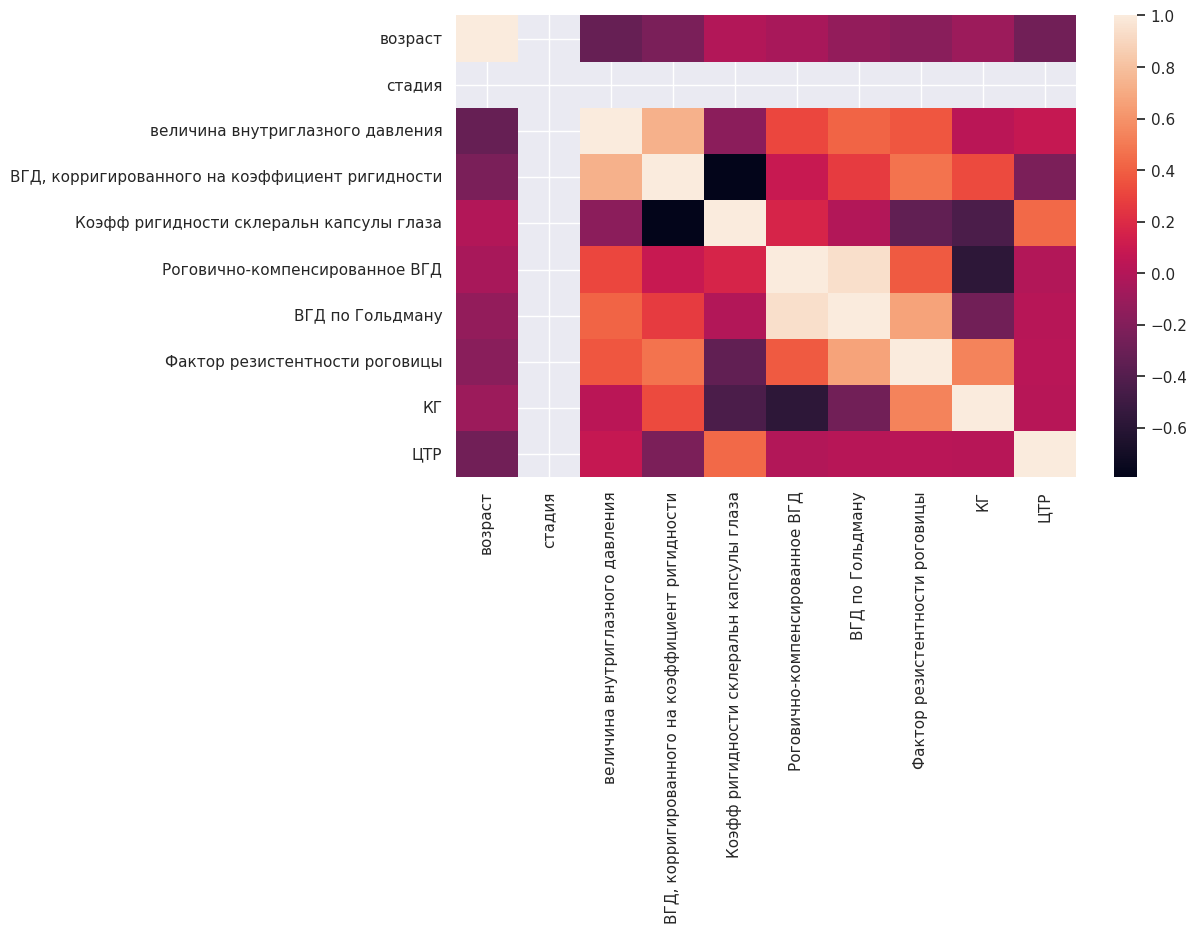

In [138]:
sns.heatmap(corr_matrix_before)

In [139]:
corr_matrix_after=median_imputer.iloc [:, 1:11].corr().round(3)

<Axes: >

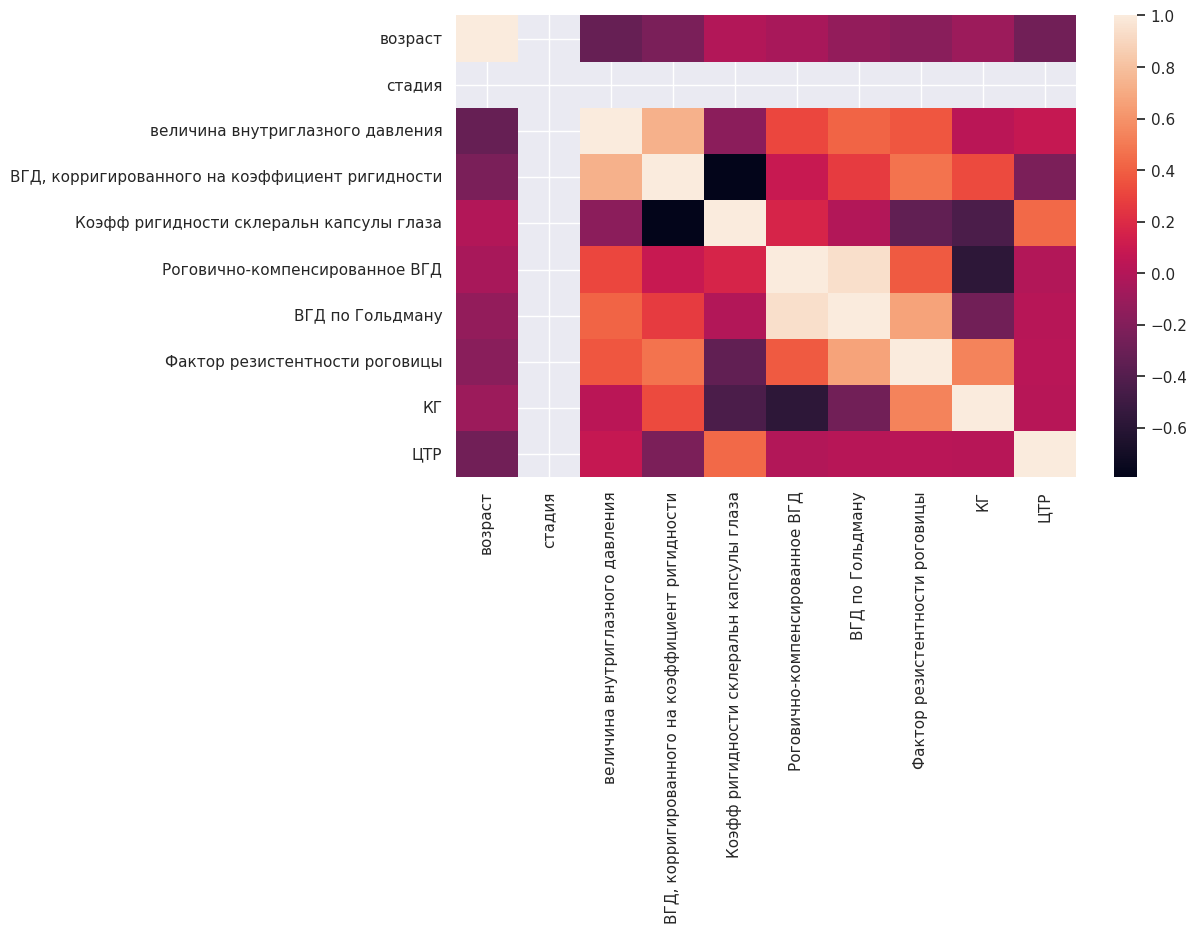

In [140]:
sns.heatmap(corr_matrix_after)

In [141]:
changes_in_corr=corr_matrix_before-corr_matrix_after

In [142]:
changes_in_corr

возраст  стадия  \
возраст                                              0.0     NaN   
стадия                                               NaN     NaN   
величина внутриглазного давления                     0.0     NaN   
ВГД, корригированного на коэффициент ригидности      0.0     NaN   
Коэфф ригидности склеральн капсулы глаза             0.0     NaN   
Роговично-компенсированное ВГД                       0.0     NaN   
ВГД по Гольдману                                     0.0     NaN   
Фактор резистентности роговицы                       0.0     NaN   
КГ                                                   0.0     NaN   
ЦТР                                                  0.0     NaN   

                                                 величина внутриглазного давления  \
возраст                                                                       0.0   
стадия                                                                        NaN   
величина внутриглазного давления                                              0.0   
ВГД, корригированного на коэффициент ригидности                               0.0   
Коэфф ригидности склеральн капсулы глаза                                      0.0   
Роговично-компенсированное ВГД                                                0.0   
ВГД по Гольдману                                                              0.0   
Фактор резистентности роговицы                                                0.0   
КГ                                                                            0.0   
ЦТР                                                                           0.0   

                                                 ВГД, корригированного на коэффициент ригидности  \
возраст                                                                                      0.0   
стадия                                                                                       NaN   
величина внутриглазного давления                                                             0.0   
ВГД, корригированного на коэффициент ригидности                                              0.0   
Коэфф ригидности склеральн капсулы глаза                                                     0.0   
Роговично-компенсированное ВГД                                                               0.0   
ВГД по Гольдману                                                                             0.0   
Фактор резистентности роговицы                                                               0.0   
КГ                                                                                           0.0   
ЦТР                                                                                          0.0   

                                                 Коэфф ригидности склеральн капсулы глаза  \
возраст                                                                               0.0   
стадия                                                                                NaN   
величина внутриглазного давления                                                      0.0   
ВГД, корригированного на коэффициент ригидности                                       0.0   
Коэфф ригидности склеральн капсулы глаза                                              0.0   
Роговично-компенсированное ВГД                                                        0.0   
ВГД по Гольдману                                                                      0.0   
Фактор резистентности роговицы                                                        0.0   
КГ                                                                                    0.0   
ЦТР                                                                                   0.0   

                                                 Роговично-компенсированное ВГД  \
возраст                                                                     0.0   
стадия                                                                   

<Axes: >

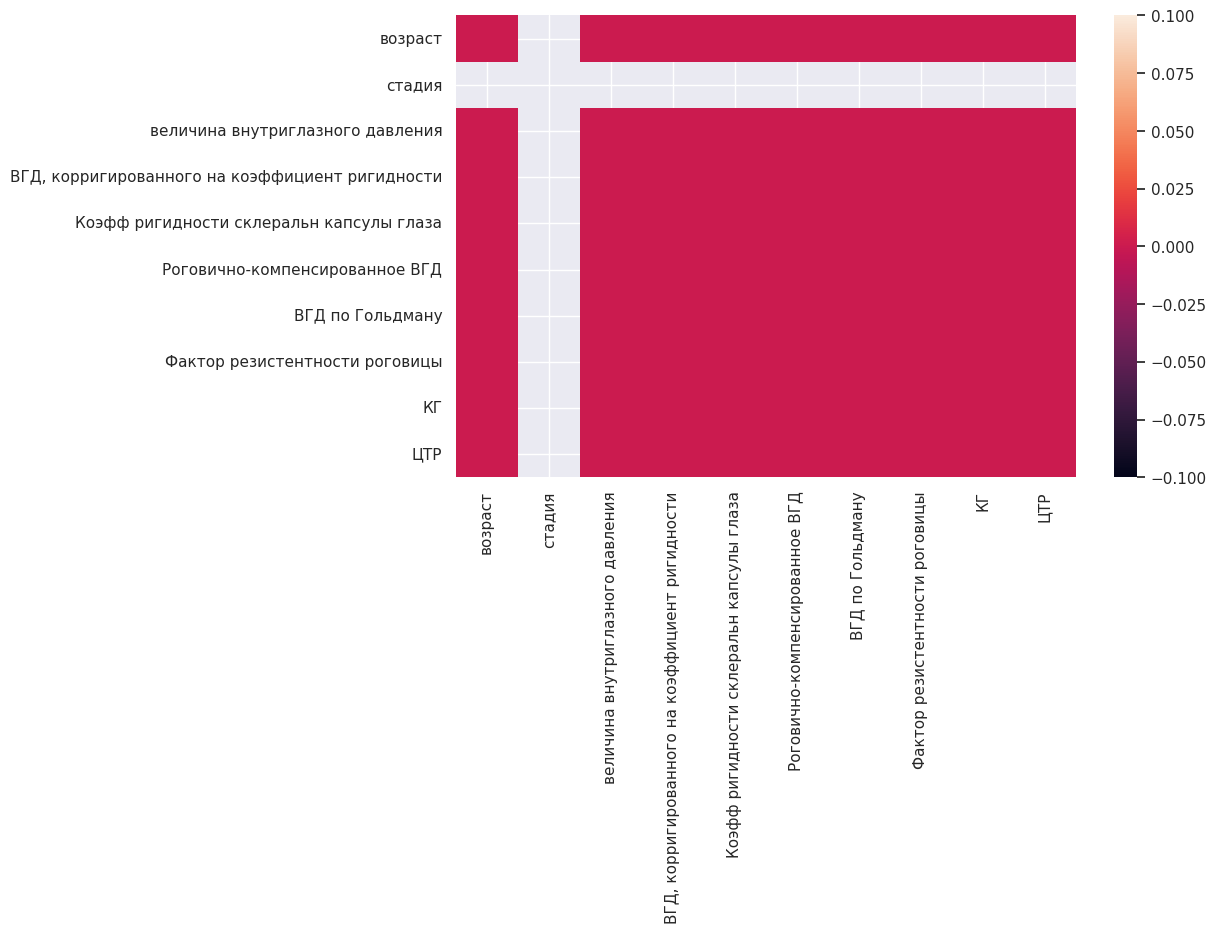

In [143]:
sns.heatmap(changes_in_corr)

In [144]:
data_2_stage=median_imputer

In [145]:
data_2_stage

Фамилия  возраст  стадия  величина внутриглазного давления  \
0       горнева       84       2                                13   
1        Иванов       64       2                                19   
2       близнюк       70       2                                11   
3        Иванов       68       2                                11   
4        митина       80       2                                17   
5       якубова       71       2                                15   
6    емельянова       77       2                                16   
7       Мациева       68       2                                17   
8        Попова       80       2                                14   
9        Иванов       72       2                                18   
10     Зайченко       76       2                                12   
11       Иванов       77       2                                15   
12  Шапошникова       82       2                                13   
13       Иванов       82       2                                12   
14     Вакалова       80       2                                14   

    ВГД, корригированного на коэффициент ригидности  \
0                                                17   
1                                                24   
2                                                11   
3                                                12   
4                                                21   
5                                                20   
6                                                17   
7                                                12   
8                                                14   
9                                                25   
10                                               17   
11                                               16   
12                                               12   
13                                               13   
14                                               12   

    Коэфф ригидности склеральн капсулы глаза  Роговично-компенсированное ВГД  \
0                                     0.0132                            16.2   
1                                     0.0127                            15.7   
2                                     0.0214                            19.8   
3                                     0.0190                            17.1   
4                                     0.0146                            23.5   
5                                     0.0133                            26.5   
6                                     0.0199                            20.2   
7                                     0.0325                            22.6   
8                                     0.0204                            24.3   
9                                     0.0092                            20.7   
10                                    0.0132                            15.4   
11                                    0.0196                            17.7   
12                                    0.0218                            19.7   
13                                    0.0193                            16.2   
14                                    0.0240                            19.0   

    ВГД по Гольдману  Фактор резистентности роговицы    КГ  ...  gamma Ш  \
0               14.1                             8.8   9.0  ...     1.65   
1               15.7                            10.0  10.0  ...     1.65   
2               18.0                             9.9   8.9  ...     2.40   
3               14.0                             8.1   8.2  ...     0.70   
4               21.0                             9.9   7.9  ...     1.75   
5               25.7                            12.1   8.8  ...     1.70   
6               18.0                             9.6   8.6  ...     2.00   
7               19.4                             9.0   7.4  ...     2.30   
8               19.9                     

## Работа с пропущенными значениями в таблице с пациентами **3 стадии заболевания**

In [146]:
data_3_stage

Фамилия  возраст  стадия  величина внутриглазного давления  \
0    клычникова       68       3                                13   
1      кадушкин       68       3                                15   
2       якубова       71       3                                22   
3       певзнер       74       3                                22   
4       Хохлова       64       3                                14   
5           NaN       64       3                                13   
6  Соловьева Е.       72       3                                16   
7      Зайченко       76       3                                17   
8      Вакалова       80       3                                16   
9      Колесова       67       3                                18   

   ВГД, корригированного на коэффициент ригидности  \
0                                                7   
1                                               11   
2                                               21   
3                                               23   
4                                               14   
5                                               10   
6                                               12   
7                                               16   
8                                               11   
9                                               17   

   Коэфф ригидности склеральн капсулы глаза  Роговично-компенсированное ВГД  \
0                                    0.0365                            24.9   
1                                    0.0306                            20.7   
2                                    0.0227                            26.0   
3                                    0.0205                            20.9   
4                                    0.0201                            19.3   
5                                    0.0315                            19.6   
6                                    0.0306                            20.0   
7                                    0.0246                            23.1   
8                                    0.0347                            21.0   
9                                    0.0227                            19.0   

   ВГД по Гольдману  Фактор резистентности роговицы   КГ  ...  gamma Ш  \
0              19.5                             7.3  5.3  ...     2.40   
1              16.5                             8.0  7.1  ...     3.55   
2              23.8                            10.6  7.7  ...     2.20   
3              18.9                             9.9  8.6  ...     1.95   
4              18.3                            10.5  9.6  ...      NaN   
5              18.6                            10.6  9.5  ...      NaN   
6              18.0                             8.7  7.6  ...      NaN   
7              17.1                             6.5  5.1  ...      NaN   
8              17.8                             8.7  7.6  ...      NaN   
9              20.5                             8.5  7.7  ...     2.20   

    Efrid    SVL    DVL  РИ (рео.индекс) мОм  ПМН (макс.нап)  ПМУ (мод.упр.)  \
0  0.0365  49.90  43.40                  NaN             NaN             NaN   
1  0.0306  49.31  39.83                15.10            0.04            0.08   
2  0.0227  45.52  43.11                25.43            0.27            0.26   
3  0.0205  42.12  26.86                15.48            0.11            0.13   
4     NaN    NaN    NaN                16.72            0.07            0.09   
5     NaN    NaN    NaN                38.82            0.08            0.09   
6     NaN    NaN    NaN                49.61            0.09            0.14   
7     NaN    NaN    NaN                57.32            0.75            0.66   
8     NaN  28.82  38.87                26.61            0.15            0.16   
9  0.0227  42.70  40.10                25.43            0.27            0.26   

   Z баз.(отн.))  Z баз.(мОм)  УОК (уд.объем) мкл  
0            NaN        

In [147]:
#посмотрим сколько пропущенных значений в данных
data_3_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Фамилия                                          9 non-null      object 
 1   возраст                                          10 non-null     int64  
 2   стадия                                           10 non-null     int64  
 3   величина внутриглазного давления                 10 non-null     int64  
 4   ВГД, корригированного на коэффициент ригидности  10 non-null     int64  
 5   Коэфф ригидности склеральн капсулы глаза         10 non-null     float64
 6   Роговично-компенсированное ВГД                   10 non-null     float64
 7   ВГД по Гольдману                                 10 non-null     float64
 8   Фактор резистентности роговицы                   10 non-null     float64
 9   КГ                                 

In [148]:
data_3_stage.isnull().sum()

Фамилия                                            1
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     0
ВГД по Гольдману                                   0
Фактор резистентности роговицы                     0
КГ                                                 0
ЦТР                                                1
РП                                                 3
ГлРП                                               3
gamma Ш                                            5
Efrid                                              5
SVL                                                4
DVL                                                4
РИ (рео.индекс) мОм                                1
ПМН (макс.нап)                                

Рассчитаем процент пропусков

In [149]:
(data_3_stage.isna().sum() / len(data_3_stage)).round(4) * 100

Фамилия                                            10.0
возраст                                             0.0
стадия                                              0.0
величина внутриглазного давления                    0.0
ВГД, корригированного на коэффициент ригидности     0.0
Коэфф ригидности склеральн капсулы глаза            0.0
Роговично-компенсированное ВГД                      0.0
ВГД по Гольдману                                    0.0
Фактор резистентности роговицы                      0.0
КГ                                                  0.0
ЦТР                                                10.0
РП                                                 30.0
ГлРП                                               30.0
gamma Ш                                            50.0
Efrid                                              50.0
SVL                                                40.0
DVL                                                40.0
РИ (рео.индекс) мОм                             

Вывод: пропуски есть по 14 признакам из 23, процент пропущенных данных в основном от 10% до 50%. На основе этого становится понятно, что удалять данные с пропущенными значениями - неподходящий способ в данной ситуации.

<Axes: >

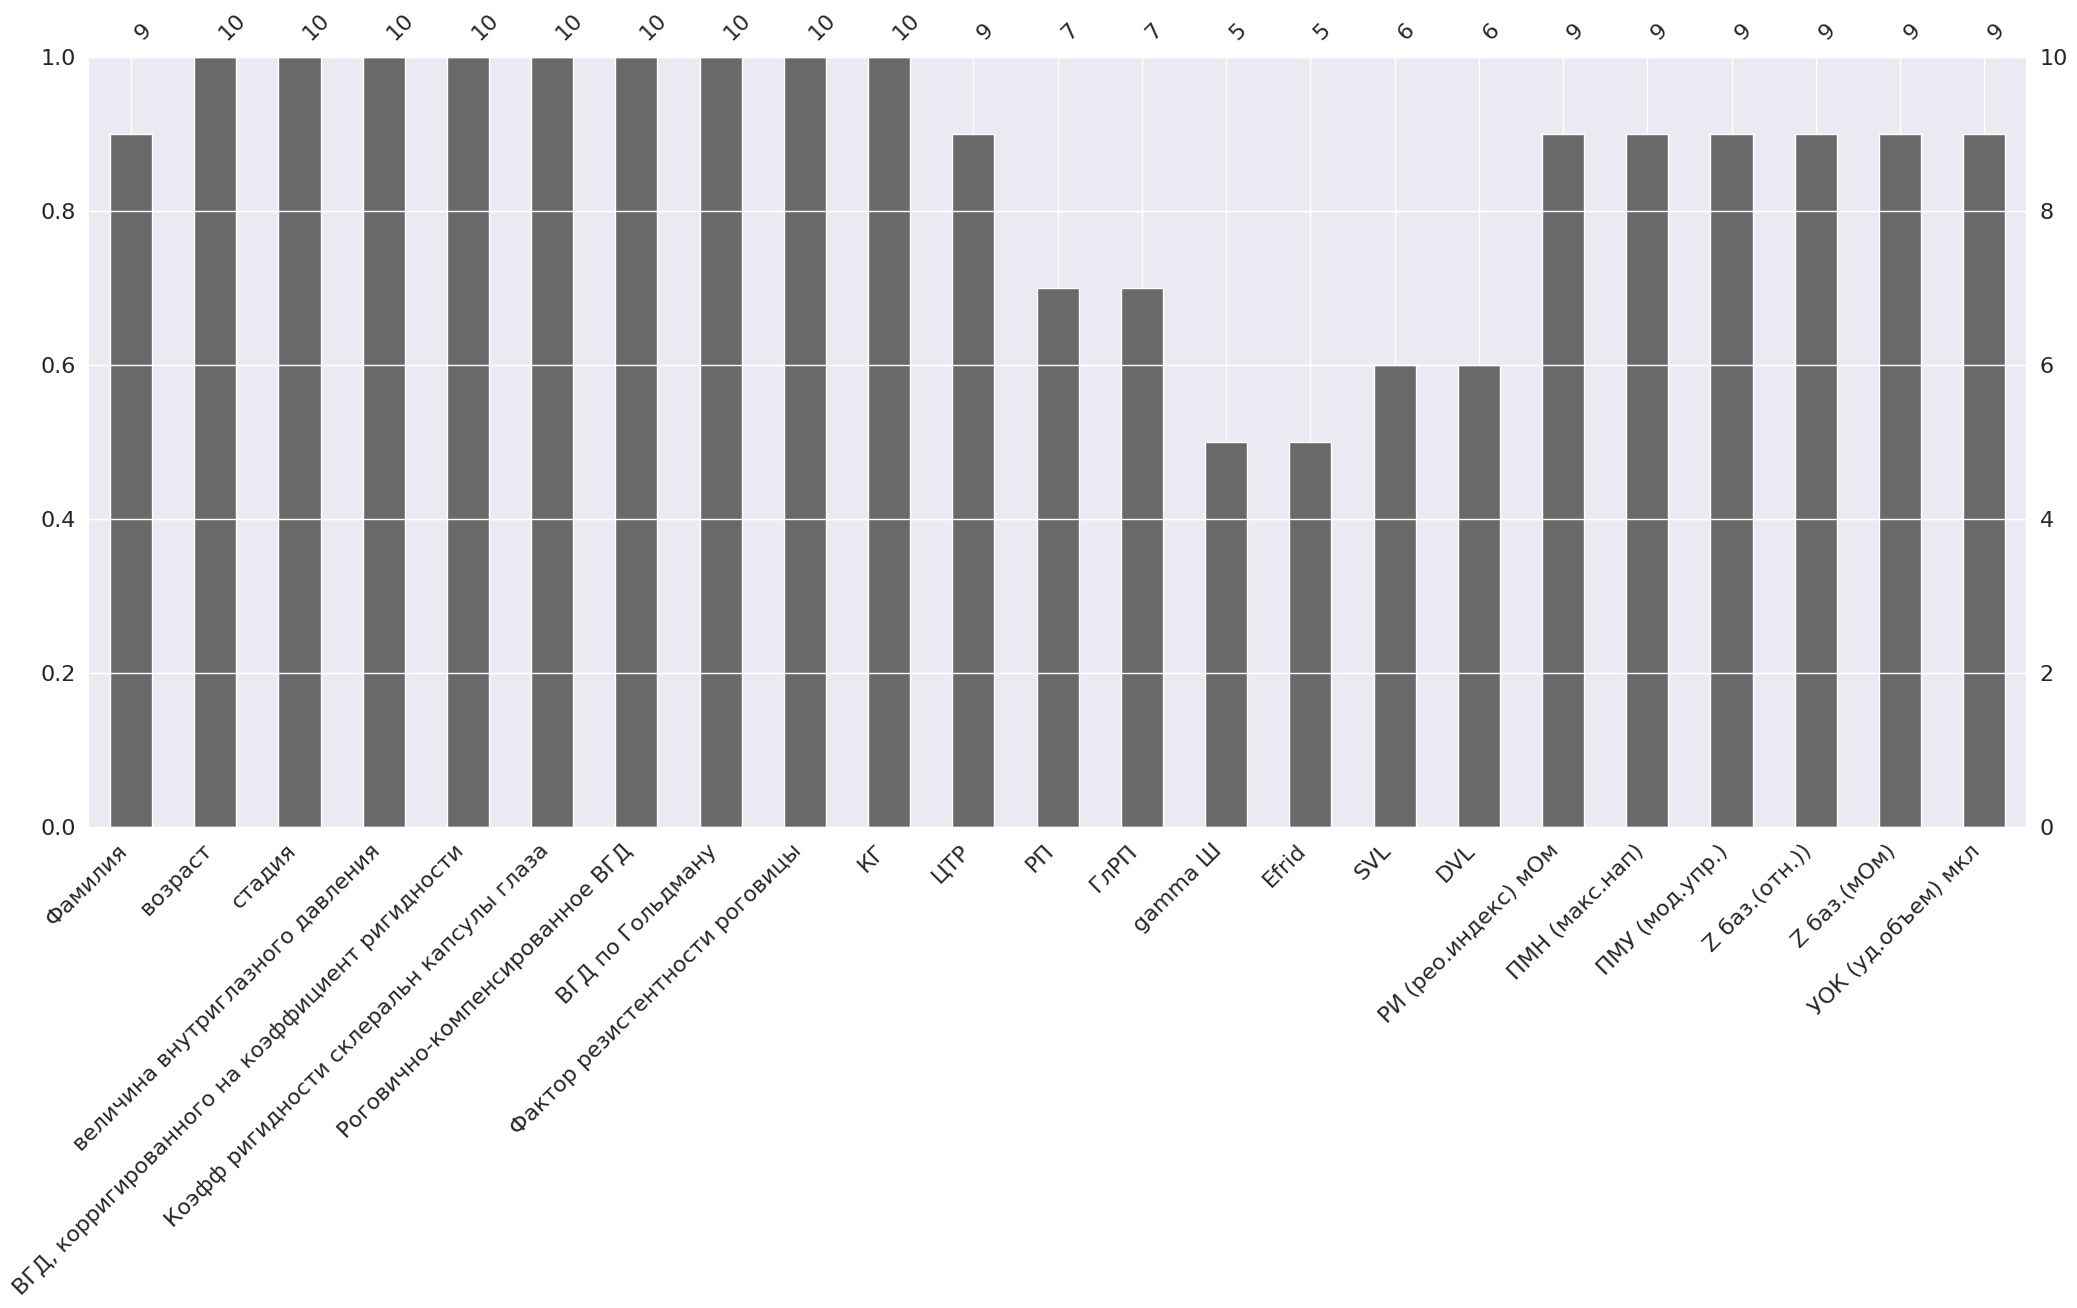

In [150]:
msno.bar(data_3_stage)

<Axes: >

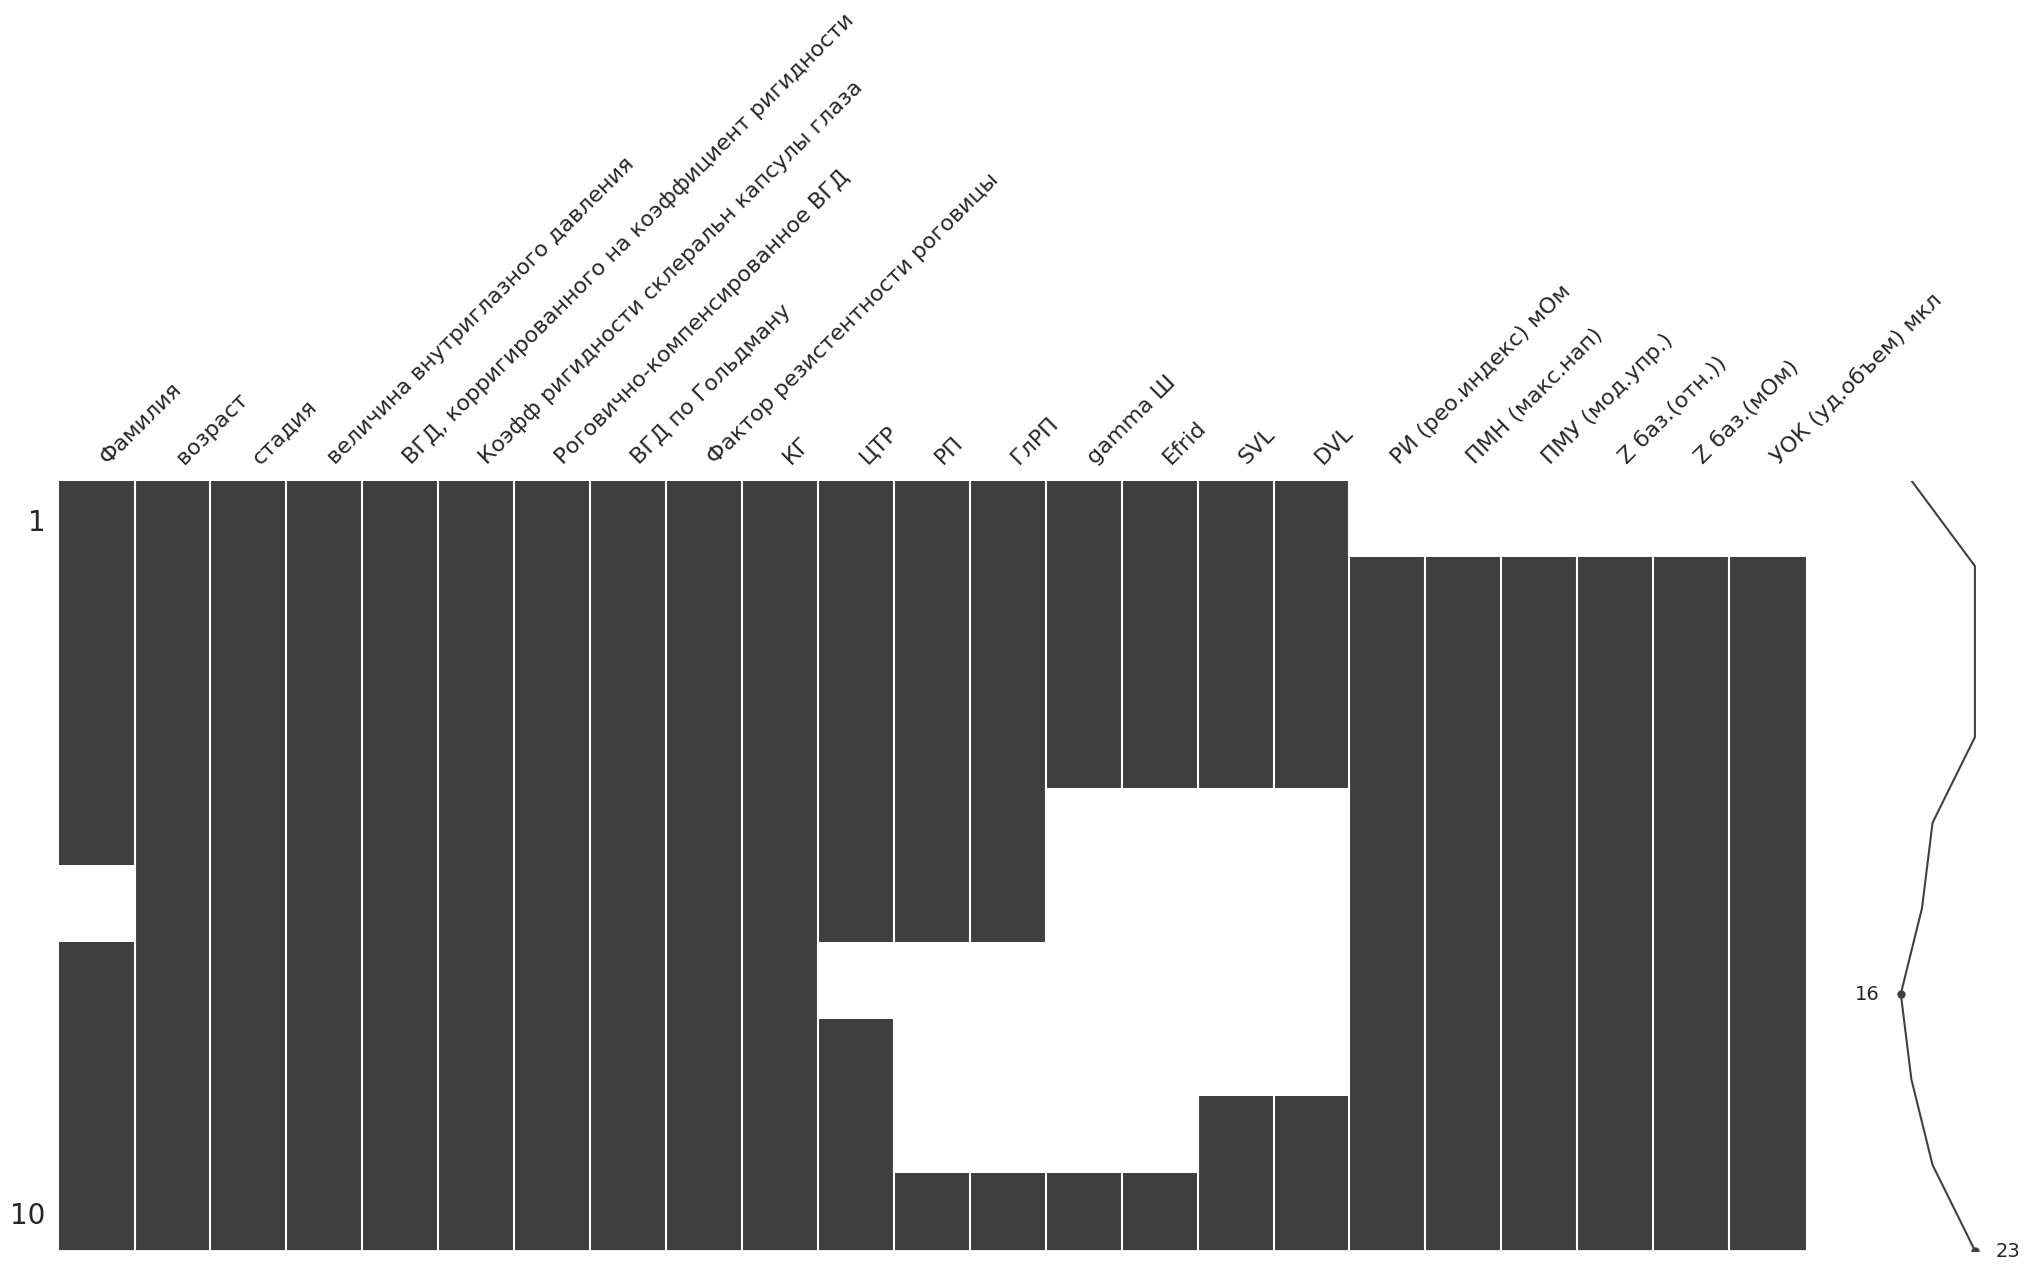

In [151]:
#матрица пропущенных значений
msno.matrix(data_3_stage)

Выяснили, что пропуски носят случайный характер. Приступаем к их заполнению.

Построим **матрицу корреляции пропущенных значений** (nullity correlation matrix).

In [152]:
tmp_df = data_3_stage.iloc[:, [i for i, n in enumerate(np.var(data_3_stage.isnull(), axis = 'rows')) if n > 0]]
tmp_df.isnull().corr()

Фамилия       ЦТР        РП      ГлРП   gamma Ш  \
Фамилия              1.000000 -0.111111 -0.218218 -0.218218  0.333333   
ЦТР                 -0.111111  1.000000  0.509175  0.509175  0.333333   
РП                  -0.218218  0.509175  1.000000  1.000000  0.654654   
ГлРП                -0.218218  0.509175  1.000000  1.000000  0.654654   
gamma Ш              0.333333  0.333333  0.654654  0.654654  1.000000   
Efrid                0.333333  0.333333  0.654654  0.654654  1.000000   
SVL                  0.408248  0.408248  0.356348  0.356348  0.816497   
DVL                  0.408248  0.408248  0.356348  0.356348  0.816497   
РИ (рео.индекс) мОм -0.111111 -0.111111 -0.218218 -0.218218 -0.333333   
ПМН (макс.нап)      -0.111111 -0.111111 -0.218218 -0.218218 -0.333333   
ПМУ (мод.упр.)      -0.111111 -0.111111 -0.218218 -0.218218 -0.333333   
Z баз.(отн.))       -0.111111 -0.111111 -0.218218 -0.218218 -0.333333   
Z баз.(мОм)         -0.111111 -0.111111 -0.218218 -0.218218 -0.333333   
УОК (уд.объем) мкл  -0.111111 -0.111111 -0.218218 -0.218218 -0.333333   

                        Efrid       SVL       DVL  РИ (рео.индекс) мОм  \
Фамилия              0.333333  0.408248  0.408248            -0.111111   
ЦТР                  0.333333  0.408248  0.408248            -0.111111   
РП                   0.654654  0.356348  0.356348            -0.218218   
ГлРП                 0.654654  0.356348  0.356348            -0.218218   
gamma Ш              1.000000  0.816497  0.816497            -0.333333   
Efrid                1.000000  0.816497  0.816497            -0.333333   
SVL                  0.816497  1.000000  1.000000            -0.272166   
DVL                  0.816497  1.000000  1.000000            -0.272166   
РИ (рео.индекс) мОм -0.333333 -0.272166 -0.272166             1.000000   
ПМН (макс.нап)      -0.333333 -0.272166 -0.272166             1.000000   
ПМУ (мод.упр.)      -0.333333 -0.272166 -0.272166             1.000000   
Z баз.(отн.))       -0.333333 -0.272166 -0.272166             1.000000   
Z баз.(мОм)         -0.333333 -0.272166 -0.272166             1.000000   
УОК (уд.объем) мкл  -0.333333 -0.272166 -0.272166             1.000000   

                     ПМН (макс.нап)  ПМУ (мод.упр.)  Z баз.(отн.))  \
Фамилия                   -0.111111       -0.111111      -0.111111   
ЦТР                       -0.111111       -0.111111      -0.111111   
РП                        -0.218218       -0.218218      -0.218218   
ГлРП                      -0.218218       -0.218218      -0.218218   
gamma Ш                   -0.333333       -0.333333      -0.333333   
Efrid                     -0.333333       -0.333333      -0.333333   
SVL                       -0.272166       -0.272166      -0.272166   
DVL                       -0.272166       -0.272166      -0.272166   
РИ (рео.индекс) мОм        1.000000        1.000000       1.000000   
ПМН (макс.нап)             1.000000        1.000000       1.000000   
ПМУ (мод.упр.)             1.000000        1.000000       1.000000   
Z баз.(отн.))              1.000000        1.000000       1.000000   
Z баз.(мОм)                1.000000        1.000000       1.000000   
УОК (уд.объем) мкл         1.000000        1.000000       1.000000   

                     Z баз.(мОм)  УОК (уд.объем) мкл  
Фамилия                -0.111111           -0.111111  
ЦТР                    -0.111111           -0.111111  
РП                     -0.218218           -0.218218  
ГлРП                   -0.218218           -0.218218  
gamma Ш                -0.333333           -0.333333  
Efrid                  -0.333333           -0.333333  
SVL                    -0.272166           -0.272166  
DVL                    -0.272166           -0.272166  
РИ (рео.индекс) мОм     1.000000            1.000000  
ПМН (макс.нап)          1.000000            1.000000  
ПМУ (мод.упр.)          1.000000            1.000000  
Z баз.(отн.))           1.000000            1.000000  
Z баз.(мОм)             1.000000            1.000

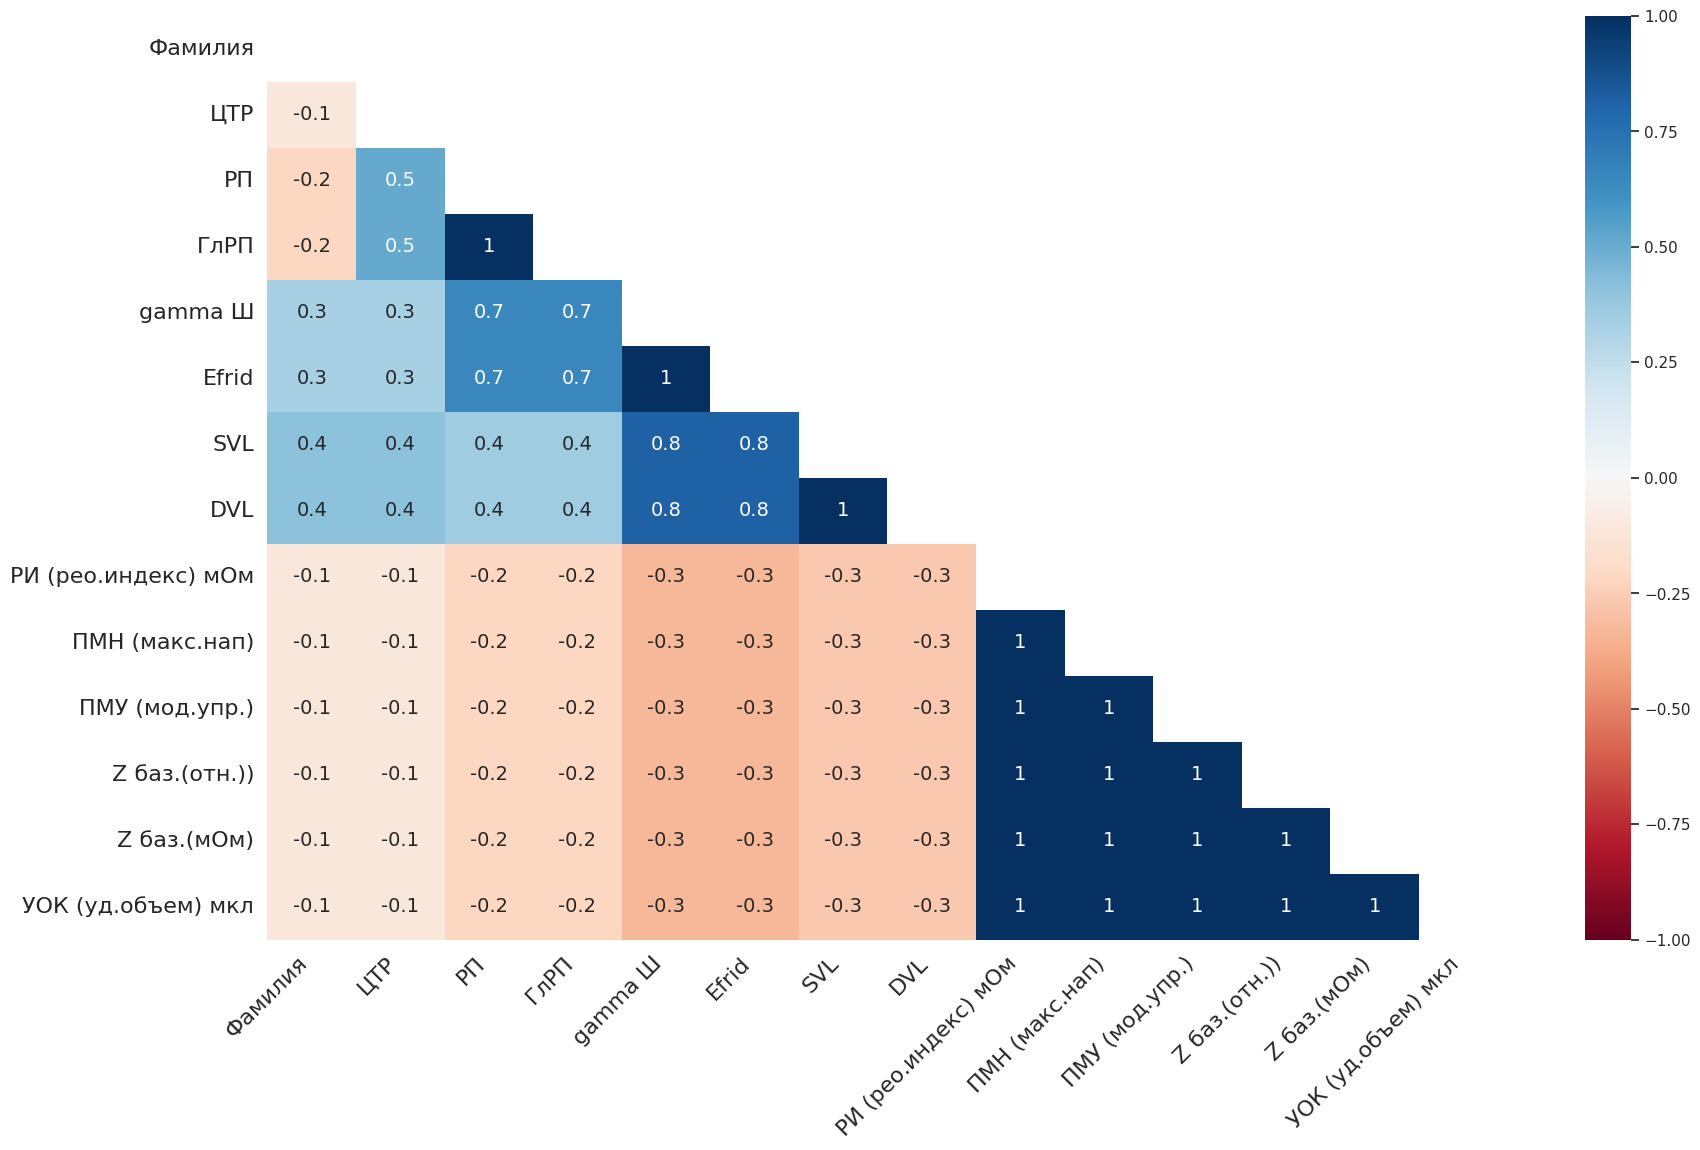

In [153]:
msno.heatmap(data_3_stage);

### Заполняем пропуски в категориальных признаках



---


Фамилия - категориальный признак. Заполним значением по умолчанию, например, "Иванов"

In [154]:
data_3_stage['Фамилия']=data_3_stage['Фамилия'].fillna('Иванов')
data_3_stage.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     0
ВГД по Гольдману                                   0
Фактор резистентности роговицы                     0
КГ                                                 0
ЦТР                                                1
РП                                                 3
ГлРП                                               3
gamma Ш                                            5
Efrid                                              5
SVL                                                4
DVL                                                4
РИ (рео.индекс) мОм                                1
ПМН (макс.нап)                                

### Заполняем пропуски в количественных признаках



---

Остальные пропущенные значения принадлежат количественным признакам.

Можно заменить медианой.

In [155]:
# скопируем датафрейм
median_imputer = data_3_stage.copy()

In [156]:
#Посмотрим на среднее арифметическое и медиану.
print('ЦТР - ', median_imputer['ЦТР'].mean().round(1), '  ', median_imputer['ЦТР'].median())
print('РП - ', median_imputer['РП'].mean().round(1), '  ', median_imputer['РП'].median())
print('ГлРП - ', median_imputer['ГлРП'].mean().round(1), '  ', median_imputer['ГлРП'].median())
print('gamma Ш - ', median_imputer['gamma Ш'].mean().round(1), '  ', median_imputer['gamma Ш'].median())
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())



ЦТР -  532.4    527.0
РП -  176.7    180.0
ГлРП -  534.0    520.0
gamma Ш -  2.5    2.2
Efrid -  0.0    0.0227
SVL -  43.1    44.11
DVL -  38.7    39.965
РИ (рео.индекс) мОм -  30.1    25.43
ПМН (макс.нап) -  0.2    0.11
ПМУ (мод.упр.) -  0.2    0.14
Z баз.(отн.)) -  765.7    822.0
Z баз.(мОм) -  30.6    32.88
УОК (уд.объем) мкл -  1.0    0.7157086929716401


In [157]:
# создадим объект класса SimpleImputer с параметром strategy = 'median'
imp_median = SimpleImputer(strategy = 'median')

# применим метод .fit_transform() для одновременного обучения модели и заполнения пропусков
median_imputer['ЦТР'] = imp_median.fit_transform(median_imputer[['ЦТР']])
median_imputer['РП'] = imp_median.fit_transform(median_imputer[['РП']])
median_imputer['ГлРП'] = imp_median.fit_transform(median_imputer[['ГлРП']])
median_imputer['gamma Ш'] = imp_median.fit_transform(median_imputer[['gamma Ш']])
median_imputer['Efrid'] = imp_median.fit_transform(median_imputer[['Efrid']])
median_imputer['SVL'] = imp_median.fit_transform(median_imputer[['SVL']])
median_imputer['DVL'] = imp_median.fit_transform(median_imputer[['DVL']])
median_imputer['РИ (рео.индекс) мОм'] = imp_median.fit_transform(median_imputer[['РИ (рео.индекс) мОм']])
median_imputer['ПМН (макс.нап)'] = imp_median.fit_transform(median_imputer[['ПМН (макс.нап)']])
median_imputer['ПМУ (мод.упр.)'] = imp_median.fit_transform(median_imputer[['ПМУ (мод.упр.)']])
median_imputer['Z баз.(отн.))'] = imp_median.fit_transform(median_imputer[['Z баз.(отн.))']])
median_imputer['Z баз.(мОм)'] = imp_median.fit_transform(median_imputer[['Z баз.(мОм)']])
median_imputer['УОК (уд.объем) мкл'] = imp_median.fit_transform(median_imputer[['УОК (уд.объем) мкл']])

# убедимся, что пропущенных значений не осталось
median_imputer['УОК (уд.объем) мкл'].isna().sum()

0

In [158]:
# посмотрим на метрики после заполнения медианой
print('ЦТР - ', median_imputer['ЦТР'].mean().round(1), '  ', median_imputer['ЦТР'].median())
print('РП - ', median_imputer['РП'].mean().round(1), '  ', median_imputer['РП'].median())
print('ГлРП - ', median_imputer['ГлРП'].mean().round(1), '  ', median_imputer['ГлРП'].median())
print('gamma Ш - ', median_imputer['gamma Ш'].mean().round(1), '  ', median_imputer['gamma Ш'].median())
print('Efrid - ', median_imputer['Efrid'].mean().round(1), '  ', median_imputer['Efrid'].median())
print('SVL - ', median_imputer['SVL'].mean().round(1), '  ', median_imputer['SVL'].median())
print('DVL - ', median_imputer['DVL'].mean().round(1), '  ', median_imputer['DVL'].median())
print('РИ (рео.индекс) мОм - ', median_imputer['РИ (рео.индекс) мОм'].mean().round(1), '  ', median_imputer['РИ (рео.индекс) мОм'].median())
print('ПМН (макс.нап) - ', median_imputer['ПМН (макс.нап)'].mean().round(1), '  ', median_imputer['ПМН (макс.нап)'].median())
print('ПМУ (мод.упр.) - ', median_imputer['ПМУ (мод.упр.)'].mean().round(1), '  ', median_imputer['ПМУ (мод.упр.)'].median())
print('Z баз.(отн.)) - ', median_imputer['Z баз.(отн.))'].mean().round(1), '  ', median_imputer['Z баз.(отн.))'].median())
print('Z баз.(мОм) - ', median_imputer['Z баз.(мОм)'].mean().round(1), '  ', median_imputer['Z баз.(мОм)'].median())
print('УОК (уд.объем) мкл - ', median_imputer['УОК (уд.объем) мкл'].mean().round(1), '  ', median_imputer['УОК (уд.объем) мкл'].median())



ЦТР -  531.9    527.0
РП -  177.7    180.0
ГлРП -  529.8    520.0
gamma Ш -  2.3    2.2
Efrid -  0.0    0.0227
SVL -  43.5    44.11
DVL -  39.2    39.965
РИ (рео.индекс) мОм -  29.6    25.43
ПМН (макс.нап) -  0.2    0.11
ПМУ (мод.упр.) -  0.2    0.14
Z баз.(отн.)) -  771.3    822.0
Z баз.(мОм) -  30.9    32.88
УОК (уд.объем) мкл -  1.0    0.7157086929716401


Проверяем, что заполнили все пропуски.

In [159]:
median_imputer.isnull().sum()

Фамилия                                            0
возраст                                            0
стадия                                             0
величина внутриглазного давления                   0
ВГД, корригированного на коэффициент ригидности    0
Коэфф ригидности склеральн капсулы глаза           0
Роговично-компенсированное ВГД                     0
ВГД по Гольдману                                   0
Фактор резистентности роговицы                     0
КГ                                                 0
ЦТР                                                0
РП                                                 0
ГлРП                                               0
gamma Ш                                            0
Efrid                                              0
SVL                                                0
DVL                                                0
РИ (рео.индекс) мОм                                0
ПМН (макс.нап)                                

### Сравниваем взаимосвязь признаков до и после заполнения пропусков

In [160]:
corr_matrix_before=data_3_stage.iloc [:, 1:11].corr().round(3)

<Axes: >

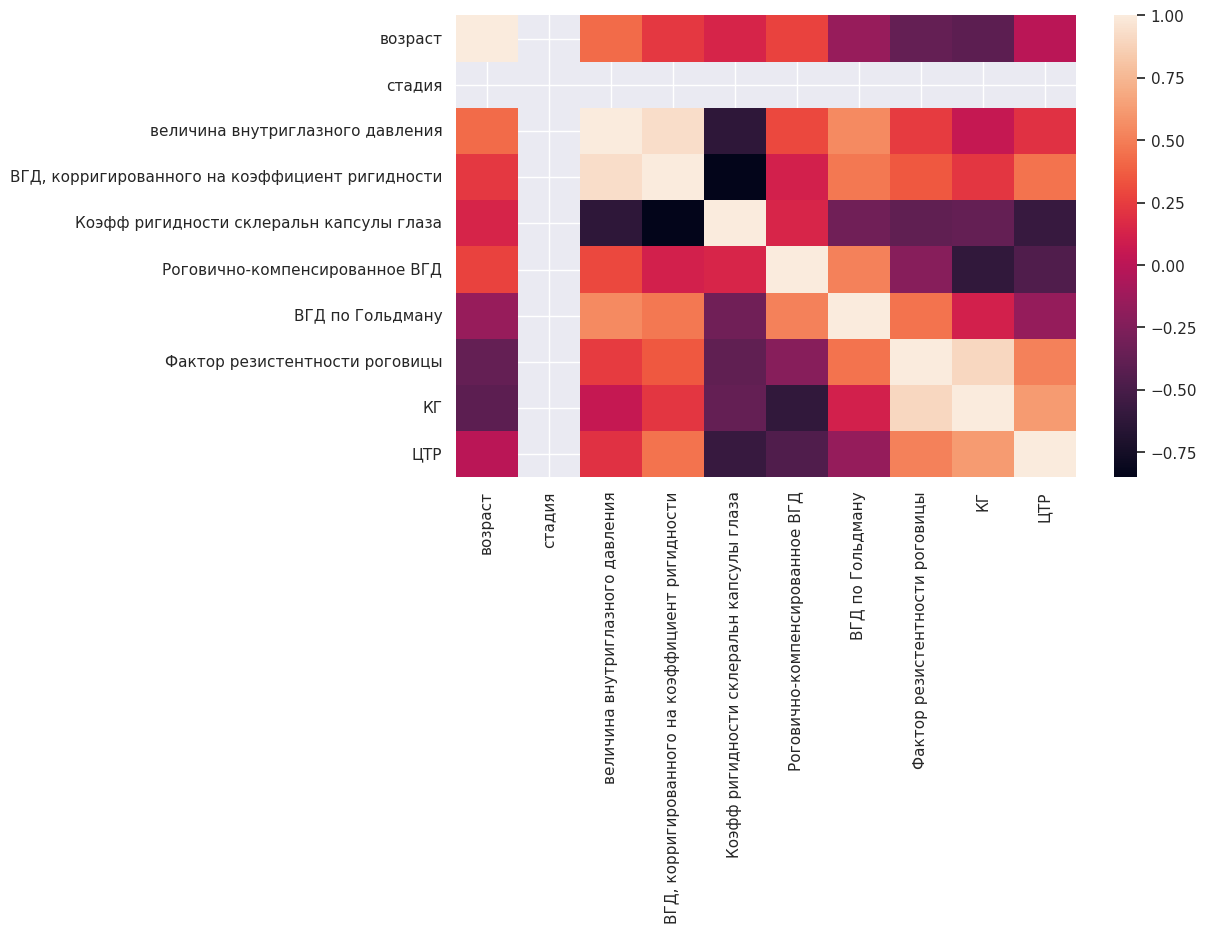

In [161]:
sns.heatmap(corr_matrix_before)

In [162]:
corr_matrix_after=median_imputer.iloc [:, 1:11].corr().round(3)

<Axes: >

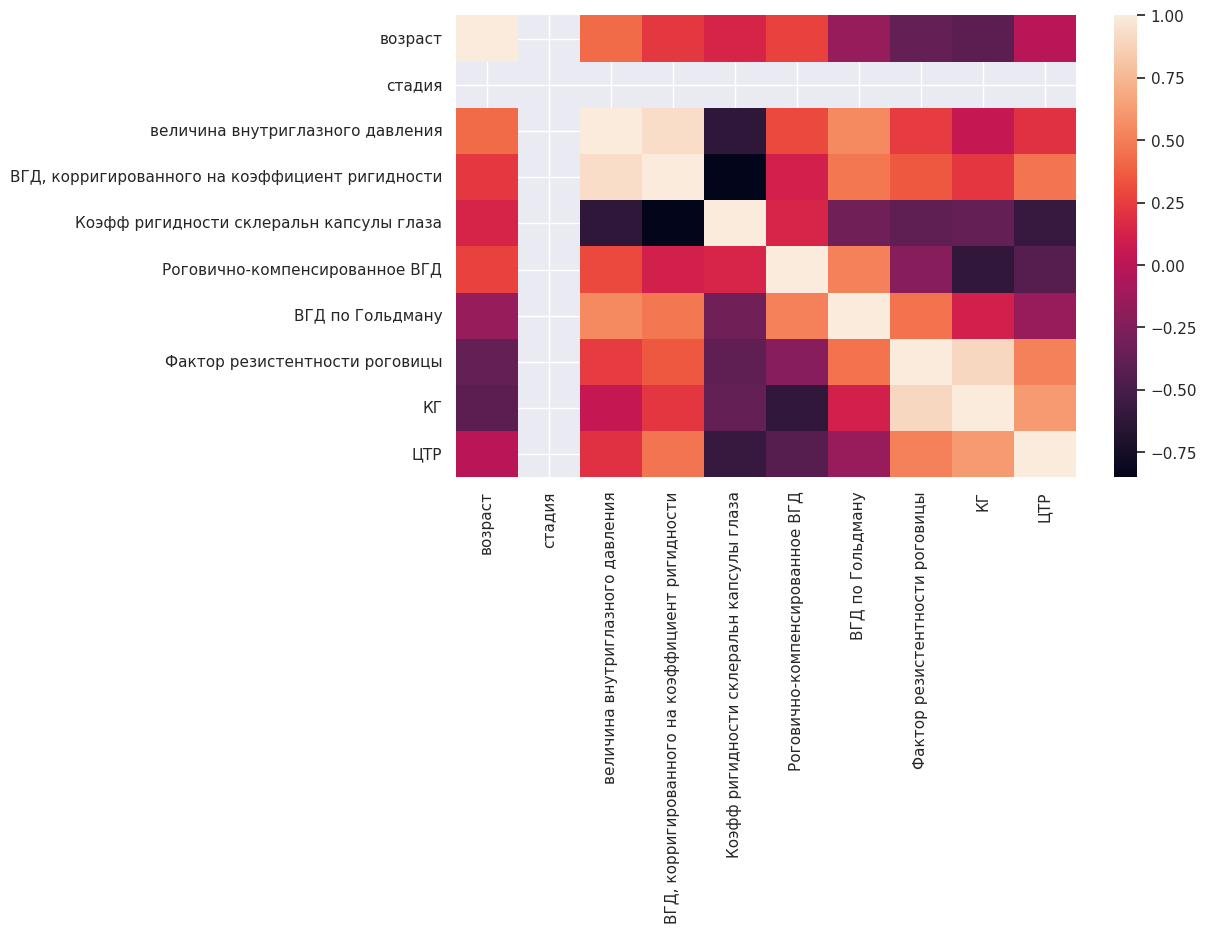

In [163]:
sns.heatmap(corr_matrix_after)

In [164]:
changes_in_corr=corr_matrix_before-corr_matrix_after

In [165]:
changes_in_corr

возраст  стадия  \
возраст                                            0.000     NaN   
стадия                                               NaN     NaN   
величина внутриглазного давления                   0.000     NaN   
ВГД, корригированного на коэффициент ригидности    0.000     NaN   
Коэфф ригидности склеральн капсулы глаза           0.000     NaN   
Роговично-компенсированное ВГД                     0.000     NaN   
ВГД по Гольдману                                   0.000     NaN   
Фактор резистентности роговицы                     0.000     NaN   
КГ                                                 0.000     NaN   
ЦТР                                                0.009     NaN   

                                                 величина внутриглазного давления  \
возраст                                                                     0.000   
стадия                                                                        NaN   
величина внутриглазного давления                                            0.000   
ВГД, корригированного на коэффициент ригидности                             0.000   
Коэфф ригидности склеральн капсулы глаза                                    0.000   
Роговично-компенсированное ВГД                                              0.000   
ВГД по Гольдману                                                            0.000   
Фактор резистентности роговицы                                              0.000   
КГ                                                                          0.000   
ЦТР                                                                        -0.004   

                                                 ВГД, корригированного на коэффициент ригидности  \
возраст                                                                                    0.000   
стадия                                                                                       NaN   
величина внутриглазного давления                                                           0.000   
ВГД, корригированного на коэффициент ригидности                                            0.000   
Коэфф ригидности склеральн капсулы глаза                                                   0.000   
Роговично-компенсированное ВГД                                                             0.000   
ВГД по Гольдману                                                                           0.000   
Фактор резистентности роговицы                                                             0.000   
КГ                                                                                         0.000   
ЦТР                                                                                       -0.006   

                                                 Коэфф ригидности склеральн капсулы глаза  \
возраст                                                                             0.000   
стадия                                                                                NaN   
величина внутриглазного давления                                                    0.000   
ВГД, корригированного на коэффициент ригидности                                     0.000   
Коэфф ригидности склеральн капсулы глаза                                            0.000   
Роговично-компенсированное ВГД                                                      0.000   
ВГД по Гольдману                                                                    0.000   
Фактор резистентности роговицы                                                      0.000   
КГ                                                                                  0.000   
ЦТР                                                                                 0.004   

                                                 Роговично-компенсированное ВГД  \
возраст                                                                    0.00   
стадия                                                                   

<Axes: >

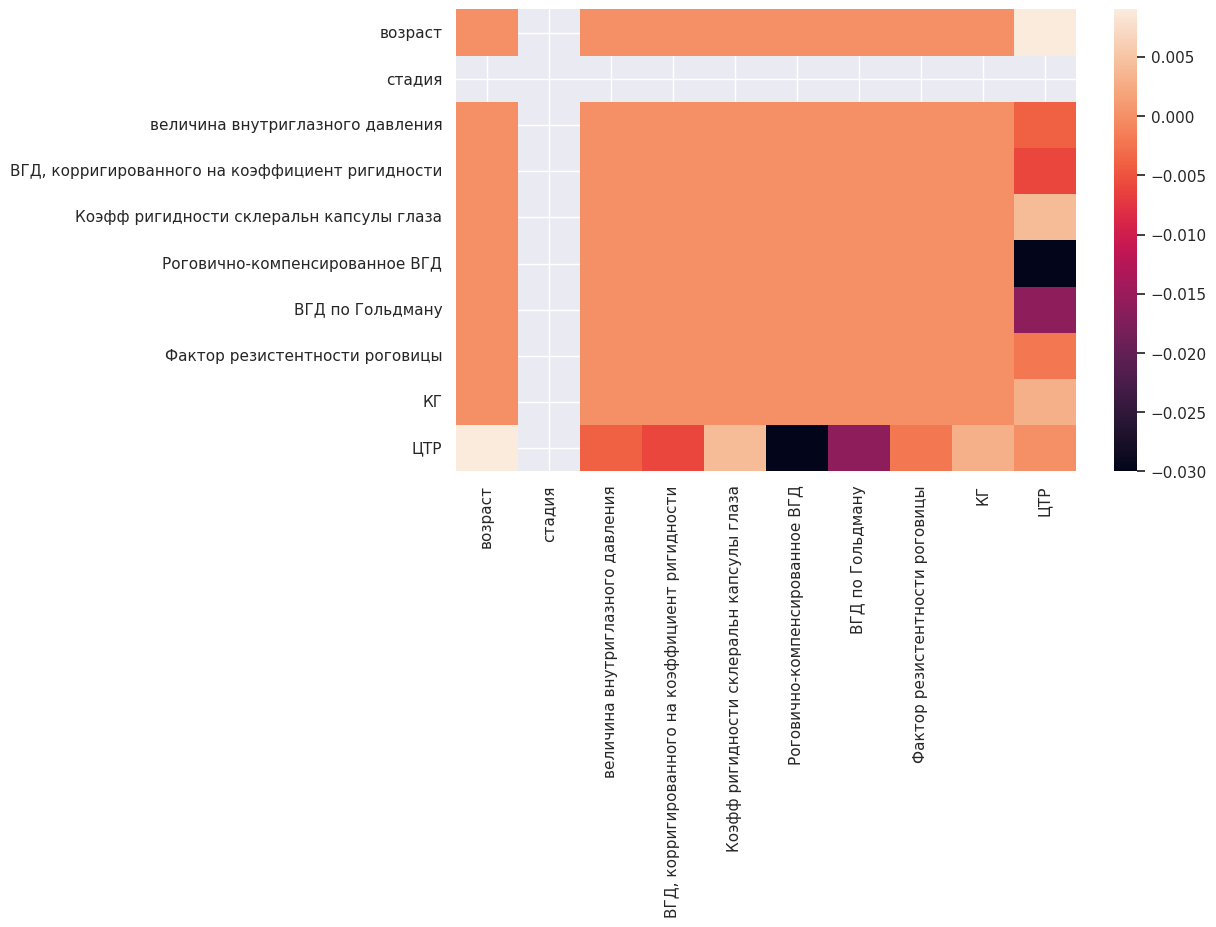

In [166]:
sns.heatmap(changes_in_corr)

In [167]:
data_3_stage=median_imputer